<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 6. PyTorch. Создание и обучение нейронных сетей </b></h2>


# Neural networks training using PyTorch

In this notebook we build and train simple neural network using PyTorch. Our goal is to show the basics of torch framework and achieve simple understandings of how problemsolving with neural networks looks like.

In [1]:
import torch

In [2]:
device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
device

device(type='cuda', index=0)

## Dataset Preparation

Here we learn some basic data preparation functions and classes from PyTorch as:

- `torch.utils.data.Dataset` and `torch.utils.data.DataLoader`
- dataset downloading api

First we would like to define our problem. Here we load the MNIST dataset (with PyTorch API)

MNIST:
- 28x28 images of `0`, `1`, .. `9`
- each pixel is grayscaled (float value in [0, 1))
- targets are int values in [0, 9] (10 classes)
- objects are ($x_i$, $y_i$), where $x_i$ shape is (1, 28, 28), $y_i$ is int value

For our purposes we will flatten the input ($x$), so our data during train will have shapes:

- `x_batch` shape `(batch_size, 784)`
- `y_batch` shape `(batch_size)`



In [3]:
from torchvision.datasets import MNIST
import torchvision.transforms as tfs

In [4]:
data_tfs = tfs.Compose([
  tfs.ToTensor(),
  tfs.Normalize((0.5,), (0.5,))
])

In [5]:
# install for train and test
root = './'
train = MNIST(root, train=True,  transform=data_tfs, download=True)
test  = MNIST(root, train=False, transform=data_tfs, download=True)

In [6]:
print(f'Data size:\n\t train {len(train)},\n\t test {len(test)}')
print(f'Data shape:\n\t features {train[0][0].shape},\n\t target {type(test[0][1])}')

Data size:
	 train 60000,
	 test 10000
Data shape:
	 features torch.Size([1, 28, 28]),
	 target <class 'torch.Tensor'>


New thing we don't need to make batch loader by ourselves. Let us use the torch implementation of it called `DataLoader` from `torch.utils.data`

In [7]:
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test, batch_size=batch_size, drop_last=True)

In [8]:
x_batch, y_batch = next(iter(train_loader))
x_batch.shape, y_batch.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

Finally we're prepared our data, so let's build some model to classify the images!

## Model and Train (of abnormal people)

We now how the torch computes the gradient functions during the computation of expression. Using `.backward()` method on expression **we pass the tree of gradient computing till the leafs** which are reliable for parameters of our model.

Thus, we use this knowledge to find the optimal weights of some model, which is represented by some expression.

Assume,
1. We want to learn linear model
2. For each class we use own weights to calculate logits
3. We use softmax on logits for probabilities of each class
4. Train on batches using sgd

In [9]:
features = 784
classes = 10

In [10]:
W = torch.FloatTensor(features, classes).uniform_(-1, 1) / features**0.5
W.requires_grad_()

tensor([[-0.0291,  0.0324,  0.0343,  ...,  0.0320, -0.0018, -0.0307],
        [-0.0100, -0.0162,  0.0326,  ...,  0.0116,  0.0189,  0.0011],
        [-0.0312,  0.0186,  0.0018,  ...,  0.0063, -0.0020, -0.0109],
        ...,
        [-0.0208, -0.0184,  0.0181,  ..., -0.0236,  0.0144,  0.0336],
        [ 0.0148,  0.0001,  0.0025,  ..., -0.0152, -0.0231, -0.0125],
        [ 0.0218, -0.0139,  0.0214,  ...,  0.0151,  0.0213, -0.0356]],
       requires_grad=True)

In [11]:
W.shape

torch.Size([784, 10])

SGD train loop

In [12]:
epochs = 3
lr=1e-2
history = []

In [13]:
import numpy as np
from torch.nn.functional import cross_entropy

In [14]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
        # load batches of data correctly
        x_batch = x_batch.reshape(x_batch.shape[0], -1)

        # compute loss (log loss a.k.a. cross entropy)
        logits = x_batch @ W
        probabilities = torch.exp(logits) / torch.exp(logits).sum(dim=1, keepdims=True)
    
        loss = -torch.log(probabilities[range(batch_size), y_batch]).mean()
        print(probabilities[range(batch_size), y_batch])
        print(y_batch)
        history.append(loss.item())

        # calc gradients
        loss.backward()

        # step of gradient descent
        grad = W.grad
        with torch.no_grad():
            W -= lr * grad
        W.grad.zero_()

    print(f'{i+1},\t loss: {history[-1]}')

tensor([0.2703, 0.0484, 0.0876, 0.1086, 0.0825, 0.1295, 0.0830, 0.0523, 0.0847,
        0.0900, 0.0643, 0.1282, 0.0579, 0.0607, 0.0838, 0.0467, 0.0564, 0.1277,
        0.0671, 0.0698, 0.0499, 0.0462, 0.0769, 0.1048, 0.1122, 0.0968, 0.1722,
        0.0736, 0.1392, 0.0510, 0.0356, 0.2014, 0.0733, 0.0646, 0.0332, 0.1455,
        0.0700, 0.0372, 0.0547, 0.0757, 0.0874, 0.0978, 0.0465, 0.0742, 0.0448,
        0.1072, 0.0824, 0.1565, 0.1360, 0.0605, 0.0431, 0.0619, 0.0849, 0.1674,
        0.0909, 0.0856, 0.0788, 0.0795, 0.0792, 0.1012, 0.0852, 0.1596, 0.0810,
        0.0366, 0.0749, 0.1212, 0.0592, 0.0897, 0.0613, 0.0404, 0.0927, 0.0615,
        0.0789, 0.0659, 0.0365, 0.0437, 0.0902, 0.1086, 0.0929, 0.0337, 0.0768,
        0.0497, 0.1019, 0.0649, 0.1137, 0.1140, 0.0229, 0.0759, 0.0740, 0.0701,
        0.0698, 0.0741, 0.0917, 0.0886, 0.1289, 0.0494, 0.0453, 0.0911, 0.0419,
        0.0769, 0.2157, 0.0913, 0.0845, 0.0600, 0.0704, 0.0922, 0.0930, 0.0646,
        0.0908, 0.0755, 0.0679, 0.0543, 

tensor([0, 7, 7, 1, 7, 7, 3, 6, 4, 9, 5, 4, 4, 2, 7, 9, 0, 9, 8, 4, 4, 9, 1, 2,
        4, 9, 3, 0, 4, 1, 6, 2, 6, 3, 7, 4, 2, 6, 6, 7, 1, 8, 9, 0, 4, 1, 4, 2,
        1, 3, 6, 4, 6, 7, 5, 8, 7, 0, 5, 1, 4, 2, 8, 4, 7, 7, 3, 8, 4, 9, 5, 8,
        6, 7, 3, 4, 6, 7, 1, 7, 4, 3, 3, 9, 8, 8, 1, 8, 6, 3, 1, 1, 3, 5, 2, 8,
        4, 2, 9, 7, 1, 4, 8, 2, 9, 6, 4, 1, 3, 4, 2, 5, 2, 5, 6, 8, 0, 6, 2, 4,
        9, 4, 9, 4, 5, 1, 5, 8])
tensor([0.1776, 0.1328, 0.1101, 0.0534, 0.1033, 0.0549, 0.1514, 0.1896, 0.1385,
        0.1400, 0.0885, 0.1463, 0.1271, 0.1879, 0.1086, 0.1169, 0.1308, 0.2305,
        0.0888, 0.1249, 0.1972, 0.0956, 0.2419, 0.2387, 0.1803, 0.1353, 0.2345,
        0.1184, 0.1356, 0.1578, 0.1516, 0.0497, 0.1383, 0.0533, 0.1830, 0.1421,
        0.1058, 0.1445, 0.1661, 0.0648, 0.1400, 0.2187, 0.1857, 0.1896, 0.0664,
        0.0501, 0.1828, 0.1963, 0.0705, 0.1700, 0.0725, 0.2433, 0.2463, 0.1397,
        0.0952, 0.1515, 0.0733, 0.2035, 0.1277, 0.1457, 0.0954, 0.0965, 0.1173,
       

tensor([4, 1, 6, 3, 3, 4, 5, 3, 2, 4, 5, 7, 1, 2, 4, 0, 0, 5, 8, 0, 6, 1, 1, 9,
        3, 2, 1, 3, 4, 2, 4, 3, 4, 5, 8, 5, 6, 7, 6, 8, 9, 4, 0, 9, 4, 9, 4, 7,
        4, 1, 6, 1, 3, 7, 3, 8, 3, 3, 2, 4, 4, 8, 7, 6, 4, 3, 6, 8, 7, 0, 7, 9,
        5, 6, 5, 2, 3, 0, 4, 1, 4, 0, 5, 6, 1, 2, 6, 3, 4, 8, 5, 9, 5, 0, 2, 7,
        5, 2, 9, 3, 4, 4, 0, 5, 2, 5, 5, 2, 9, 8, 3, 5, 2, 4, 4, 6, 7, 6, 4, 6,
        6, 7, 0, 9, 6, 1, 8, 8])
tensor([0.1602, 0.1578, 0.1725, 0.2465, 0.0920, 0.1332, 0.1370, 0.3081, 0.1153,
        0.1636, 0.2935, 0.2193, 0.1538, 0.3342, 0.2099, 0.2538, 0.1514, 0.1550,
        0.1531, 0.2448, 0.1303, 0.3700, 0.2560, 0.3315, 0.1880, 0.1028, 0.1219,
        0.1260, 0.1576, 0.3965, 0.2812, 0.3344, 0.2396, 0.1910, 0.2129, 0.1359,
        0.2015, 0.1726, 0.1260, 0.1043, 0.1683, 0.2395, 0.0901, 0.2111, 0.2210,
        0.1585, 0.2009, 0.1018, 0.1536, 0.4096, 0.1546, 0.2151, 0.2211, 0.2098,
        0.1645, 0.1570, 0.2870, 0.1852, 0.2370, 0.0808, 0.1041, 0.2511, 0.1997,
       

tensor([2, 3, 9, 4, 5, 5, 7, 6, 2, 7, 7, 8, 1, 0, 7, 3, 5, 4, 4, 5, 3, 6, 4, 7,
        2, 8, 1, 9, 7, 6, 1, 0, 9, 3, 1, 4, 7, 1, 9, 4, 4, 0, 2, 8, 2, 6, 7, 0,
        0, 7, 7, 8, 7, 7, 8, 7, 9, 9, 3, 0, 4, 4, 0, 9, 3, 9, 5, 7, 6, 0, 7, 5,
        1, 8, 2, 5, 7, 9, 4, 8, 4, 8, 7, 7, 9, 5, 0, 6, 6, 5, 4, 3, 9, 8, 6, 1,
        9, 6, 7, 8, 2, 5, 9, 9, 2, 2, 1, 2, 2, 0, 9, 9, 4, 2, 3, 4, 9, 7, 3, 3,
        3, 1, 9, 3, 7, 6, 5, 6])
tensor([0.5677, 0.4212, 0.1830, 0.2858, 0.1196, 0.3721, 0.2822, 0.3320, 0.2091,
        0.4476, 0.2213, 0.2366, 0.1571, 0.3034, 0.3805, 0.4009, 0.2649, 0.3777,
        0.1702, 0.2744, 0.2343, 0.4480, 0.1531, 0.1452, 0.1769, 0.1576, 0.1509,
        0.1255, 0.0795, 0.2954, 0.0787, 0.1711, 0.3129, 0.1173, 0.1823, 0.1569,
        0.1501, 0.2034, 0.2061, 0.0658, 0.2883, 0.2719, 0.1735, 0.1902, 0.3351,
        0.3542, 0.1231, 0.3415, 0.4727, 0.5039, 0.0898, 0.3600, 0.2982, 0.1783,
        0.1173, 0.2911, 0.1915, 0.1264, 0.2034, 0.2694, 0.2547, 0.2417, 0.2572,
       

tensor([4, 1, 7, 7, 4, 9, 2, 6, 6, 3, 3, 3, 3, 1, 3, 0, 4, 2, 7, 6, 9, 0, 3, 5,
        1, 6, 3, 6, 4, 8, 7, 7, 3, 3, 8, 5, 9, 8, 3, 3, 4, 0, 7, 1, 6, 2, 0, 3,
        8, 7, 4, 8, 3, 9, 2, 0, 7, 3, 8, 4, 0, 7, 1, 8, 0, 0, 5, 1, 4, 2, 1, 3,
        7, 4, 7, 5, 1, 6, 5, 7, 5, 8, 9, 9, 8, 5, 0, 1, 5, 9, 6, 9, 0, 7, 4, 1,
        9, 0, 2, 9, 8, 0, 7, 5, 3, 9, 7, 7, 7, 1, 7, 3, 4, 6, 7, 3, 0, 2, 3, 0,
        0, 9, 4, 0, 8, 6, 9, 1])
tensor([0.3124, 0.3091, 0.3387, 0.2158, 0.4672, 0.2474, 0.4152, 0.2568, 0.1216,
        0.3911, 0.1443, 0.3321, 0.1919, 0.2619, 0.3246, 0.4085, 0.1401, 0.2339,
        0.0940, 0.3548, 0.3981, 0.1610, 0.3763, 0.2636, 0.1471, 0.1880, 0.1581,
        0.1435, 0.2747, 0.2129, 0.1249, 0.2537, 0.1348, 0.3935, 0.1639, 0.5010,
        0.1109, 0.4566, 0.4015, 0.2605, 0.2340, 0.3799, 0.3982, 0.3305, 0.4122,
        0.0524, 0.3166, 0.2205, 0.4533, 0.3054, 0.0639, 0.3696, 0.2746, 0.4838,
        0.2686, 0.3964, 0.1942, 0.3407, 0.2352, 0.1109, 0.4733, 0.0609, 0.1750,
       

tensor([8, 0, 2, 7, 3, 7, 5, 5, 1, 8, 2, 2, 6, 9, 1, 8, 7, 4, 0, 6, 0, 7, 3, 1,
        0, 6, 6, 0, 9, 3, 4, 6, 7, 8, 9, 7, 3, 0, 0, 4, 0, 2, 6, 7, 5, 4, 6, 4,
        8, 2, 0, 8, 7, 1, 7, 5, 1, 1, 2, 2, 7, 5, 6, 6, 7, 4, 2, 3, 9, 0, 2, 0,
        9, 0, 4, 3, 4, 7, 7, 0, 3, 6, 0, 4, 3, 8, 6, 8, 1, 3, 8, 9, 0, 9, 0, 8,
        0, 2, 8, 7, 8, 7, 9, 1, 7, 0, 3, 1, 4, 2, 3, 3, 8, 4, 9, 5, 6, 6, 4, 7,
        0, 8, 3, 9, 8, 0, 6, 1])
tensor([0.2267, 0.5714, 0.2525, 0.6217, 0.5085, 0.1998, 0.1409, 0.2290, 0.0774,
        0.6499, 0.2285, 0.5403, 0.3919, 0.5076, 0.1278, 0.3026, 0.3940, 0.5203,
        0.1783, 0.5669, 0.1011, 0.5033, 0.7577, 0.5344, 0.1470, 0.3429, 0.0899,
        0.1539, 0.2071, 0.6771, 0.3480, 0.6515, 0.1243, 0.2586, 0.2418, 0.2402,
        0.3490, 0.6051, 0.0629, 0.2844, 0.3498, 0.1887, 0.4427, 0.4535, 0.2881,
        0.4136, 0.2531, 0.1462, 0.1702, 0.3102, 0.1465, 0.4730, 0.6192, 0.3514,
        0.1955, 0.4682, 0.3063, 0.7008, 0.3163, 0.3555, 0.2546, 0.6223, 0.1841,
       

tensor([2, 9, 0, 7, 3, 9, 6, 5, 8, 8, 4, 9, 9, 6, 8, 6, 4, 2, 9, 8, 9, 1, 9, 7,
        2, 5, 3, 5, 2, 7, 9, 3, 7, 5, 6, 0, 5, 1, 3, 1, 4, 3, 1, 8, 5, 4, 2, 9,
        1, 4, 6, 5, 8, 1, 5, 8, 5, 6, 7, 8, 2, 9, 1, 0, 1, 1, 4, 2, 2, 3, 8, 4,
        3, 5, 4, 6, 4, 7, 2, 8, 7, 9, 1, 0, 0, 1, 3, 2, 1, 3, 9, 4, 6, 5, 9, 6,
        8, 7, 8, 8, 1, 0, 6, 1, 7, 2, 7, 3, 2, 4, 1, 5, 4, 6, 4, 7, 4, 8, 1, 9,
        5, 6, 6, 6, 4, 3, 2, 4])
tensor([0.1852, 0.3562, 0.2348, 0.4018, 0.2006, 0.6591, 0.2630, 0.0873, 0.4934,
        0.6791, 0.3797, 0.4164, 0.1235, 0.2573, 0.5836, 0.2092, 0.1740, 0.2015,
        0.1314, 0.3173, 0.2514, 0.5758, 0.2792, 0.3407, 0.5158, 0.3736, 0.1248,
        0.4208, 0.2107, 0.2539, 0.6285, 0.6636, 0.2529, 0.1135, 0.3185, 0.2008,
        0.2815, 0.5089, 0.2122, 0.4612, 0.3213, 0.4988, 0.3128, 0.1941, 0.3821,
        0.5324, 0.6468, 0.2339, 0.1075, 0.2249, 0.2191, 0.4729, 0.2216, 0.4592,
        0.4146, 0.1770, 0.4501, 0.4071, 0.5768, 0.1853, 0.3759, 0.3519, 0.2656,
       

tensor([8, 1, 2, 9, 5, 7, 7, 1, 1, 2, 4, 6, 9, 0, 8, 0, 8, 1, 4, 2, 1, 3, 8, 4,
        3, 5, 9, 6, 2, 7, 9, 8, 9, 9, 6, 0, 4, 1, 6, 2, 9, 3, 7, 4, 6, 7, 3, 8,
        5, 9, 8, 0, 6, 1, 1, 2, 6, 3, 7, 4, 8, 7, 6, 8, 5, 9, 1, 5, 7, 1, 5, 9,
        1, 9, 2, 0, 5, 9, 5, 0, 4, 5, 3, 9, 9, 1, 0, 7, 9, 2, 9, 2, 5, 3, 2, 3,
        9, 2, 2, 0, 6, 9, 5, 0, 0, 6, 9, 1, 5, 7, 7, 5, 4, 0, 4, 3, 7, 4, 0, 7,
        3, 6, 8, 6, 2, 3, 6, 3])
tensor([0.2910, 0.2123, 0.4034, 0.1359, 0.2504, 0.2977, 0.1787, 0.4404, 0.0394,
        0.2679, 0.5518, 0.2586, 0.0877, 0.2376, 0.3924, 0.1112, 0.2778, 0.1189,
        0.3885, 0.5110, 0.2581, 0.5390, 0.4162, 0.2035, 0.1164, 0.2532, 0.1913,
        0.1828, 0.5397, 0.2722, 0.2660, 0.2806, 0.4071, 0.1078, 0.4558, 0.2421,
        0.5521, 0.3141, 0.7008, 0.1842, 0.4299, 0.1464, 0.7315, 0.2437, 0.4353,
        0.2088, 0.2335, 0.2826, 0.3020, 0.4313, 0.1449, 0.1587, 0.5792, 0.2661,
        0.0719, 0.1779, 0.3644, 0.3515, 0.0849, 0.4245, 0.3332, 0.1463, 0.6208,
       

tensor([3, 0, 1, 3, 7, 8, 7, 9, 3, 2, 2, 1, 2, 7, 6, 4, 4, 5, 8, 2, 2, 8, 7, 4,
        9, 7, 1, 1, 9, 8, 1, 0, 6, 6, 2, 3, 3, 2, 3, 9, 7, 0, 8, 4, 3, 7, 9, 4,
        4, 3, 8, 4, 9, 5, 3, 0, 7, 0, 0, 2, 5, 0, 3, 1, 7, 2, 1, 3, 5, 4, 0, 5,
        3, 6, 4, 7, 7, 8, 4, 9, 0, 0, 0, 1, 9, 2, 4, 3, 7, 4, 6, 7, 0, 8, 7, 9,
        0, 0, 6, 1, 2, 2, 0, 3, 1, 7, 4, 8, 8, 9, 7, 8, 0, 6, 8, 5, 9, 0, 8, 6,
        6, 8, 6, 9, 9, 4, 9, 1])
tensor([0.1159, 0.1276, 0.3694, 0.8245, 0.2390, 0.3038, 0.4456, 0.2320, 0.3728,
        0.2139, 0.5530, 0.4469, 0.6398, 0.4471, 0.1904, 0.7764, 0.3605, 0.0918,
        0.3820, 0.0439, 0.2924, 0.2577, 0.3554, 0.5420, 0.3397, 0.5623, 0.2823,
        0.1286, 0.6060, 0.3290, 0.4366, 0.2860, 0.5354, 0.3872, 0.6517, 0.4438,
        0.3617, 0.4511, 0.3200, 0.7397, 0.7582, 0.5481, 0.5395, 0.2823, 0.7556,
        0.4740, 0.1880, 0.5783, 0.6184, 0.8659, 0.2110, 0.4706, 0.2543, 0.6692,
        0.2390, 0.4591, 0.2068, 0.3470, 0.2361, 0.6767, 0.3023, 0.3411, 0.2107,
       

tensor([5, 8, 9, 9, 4, 8, 1, 7, 5, 4, 1, 3, 7, 9, 8, 8, 2, 8, 4, 3, 8, 1, 5, 5,
        5, 8, 4, 2, 9, 7, 2, 4, 5, 2, 1, 6, 3, 5, 7, 2, 5, 4, 3, 5, 4, 6, 9, 4,
        4, 1, 9, 7, 2, 5, 2, 1, 3, 3, 0, 3, 1, 6, 0, 9, 8, 6, 4, 3, 3, 3, 5, 1,
        7, 6, 3, 5, 3, 6, 0, 1, 3, 9, 7, 3, 9, 7, 1, 4, 7, 7, 7, 0, 4, 9, 6, 0,
        0, 0, 4, 3, 7, 7, 6, 9, 9, 2, 5, 0, 0, 1, 7, 0, 0, 1, 0, 0, 6, 4, 5, 0,
        5, 4, 3, 7, 6, 9, 7, 2])
tensor([0.0566, 0.8826, 0.5551, 0.4876, 0.3482, 0.4637, 0.7464, 0.5384, 0.6121,
        0.2707, 0.5897, 0.2606, 0.4711, 0.8300, 0.6660, 0.2730, 0.4442, 0.5882,
        0.1400, 0.4093, 0.5824, 0.4373, 0.6391, 0.4055, 0.3180, 0.6224, 0.4388,
        0.2983, 0.6565, 0.3089, 0.6023, 0.2853, 0.1238, 0.3396, 0.7062, 0.2723,
        0.2926, 0.6251, 0.7342, 0.7816, 0.4589, 0.2363, 0.2245, 0.2892, 0.2411,
        0.4711, 0.1436, 0.3831, 0.6339, 0.4180, 0.6581, 0.8194, 0.9152, 0.5279,
        0.1240, 0.6278, 0.1028, 0.6556, 0.8287, 0.2240, 0.3574, 0.2569, 0.1915,
       

tensor([2, 3, 5, 4, 0, 5, 9, 6, 1, 7, 1, 8, 0, 9, 9, 6, 0, 5, 5, 9, 7, 3, 3, 4,
        7, 3, 7, 8, 4, 5, 8, 1, 5, 5, 3, 2, 1, 3, 2, 0, 7, 1, 9, 2, 5, 1, 9, 3,
        1, 2, 6, 6, 1, 5, 8, 3, 3, 0, 8, 7, 9, 2, 3, 7, 5, 4, 5, 6, 2, 4, 9, 0,
        6, 5, 6, 9, 8, 9, 8, 8, 1, 9, 3, 5, 6, 3, 3, 1, 0, 7, 1, 4, 4, 7, 4, 6,
        2, 5, 3, 4, 1, 0, 3, 0, 2, 6, 7, 6, 2, 2, 9, 0, 9, 6, 8, 3, 6, 7, 8, 7,
        0, 4, 8, 4, 5, 3, 4, 9])
tensor([0.8767, 0.6141, 0.2648, 0.3922, 0.6800, 0.4921, 0.3505, 0.3428, 0.2953,
        0.9117, 0.2349, 0.5074, 0.6217, 0.3094, 0.2390, 0.6730, 0.2478, 0.2594,
        0.1238, 0.4786, 0.5786, 0.2101, 0.2294, 0.7135, 0.7583, 0.4577, 0.2598,
        0.9611, 0.1392, 0.6569, 0.3571, 0.7103, 0.6559, 0.5379, 0.5072, 0.8286,
        0.7804, 0.3844, 0.7595, 0.5740, 0.2991, 0.7790, 0.4089, 0.3904, 0.3455,
        0.7981, 0.6838, 0.3906, 0.3247, 0.7576, 0.4328, 0.7465, 0.4840, 0.4331,
        0.5852, 0.6050, 0.5851, 0.3866, 0.5123, 0.6278, 0.4536, 0.4121, 0.3836,
       

tensor([3, 5, 2, 1, 5, 5, 8, 7, 7, 6, 5, 0, 1, 1, 8, 7, 4, 0, 5, 6, 1, 8, 4, 9,
        9, 5, 1, 4, 2, 7, 0, 9, 4, 8, 7, 6, 0, 0, 7, 8, 1, 1, 4, 7, 2, 7, 2, 1,
        1, 3, 9, 2, 8, 1, 2, 4, 6, 2, 8, 0, 9, 0, 3, 7, 5, 8, 2, 4, 4, 6, 0, 4,
        9, 9, 6, 3, 4, 8, 5, 4, 5, 7, 9, 2, 3, 5, 8, 6, 3, 3, 8, 6, 5, 9, 5, 6,
        7, 3, 6, 2, 5, 2, 4, 4, 4, 6, 7, 9, 5, 0, 1, 2, 1, 5, 8, 5, 1, 1, 7, 3,
        4, 3, 0, 9, 7, 7, 1, 2])
tensor([0.6722, 0.8127, 0.5572, 0.3568, 0.4226, 0.5918, 0.9188, 0.3996, 0.6549,
        0.6070, 0.8465, 0.4943, 0.4279, 0.7529, 0.1456, 0.6659, 0.1718, 0.6438,
        0.3597, 0.3885, 0.6898, 0.7783, 0.2264, 0.7945, 0.4219, 0.1801, 0.3104,
        0.7690, 0.5900, 0.1556, 0.1035, 0.5630, 0.6338, 0.7463, 0.1888, 0.4866,
        0.7787, 0.3656, 0.6153, 0.4277, 0.2207, 0.7585, 0.6806, 0.7116, 0.3266,
        0.0384, 0.6573, 0.5600, 0.1262, 0.0737, 0.0217, 0.8496, 0.2078, 0.8286,
        0.7246, 0.6732, 0.1127, 0.5832, 0.1352, 0.7138, 0.2234, 0.5632, 0.4721,
       

tensor([3, 9, 4, 8, 7, 0, 2, 6, 2, 9, 2, 4, 7, 9, 3, 9, 9, 6, 1, 2, 1, 3, 4, 7,
        9, 1, 9, 9, 8, 2, 3, 2, 6, 5, 6, 3, 6, 7, 7, 8, 0, 0, 4, 1, 4, 2, 6, 3,
        7, 4, 8, 5, 6, 6, 5, 7, 4, 8, 2, 9, 5, 0, 7, 1, 6, 2, 8, 3, 5, 4, 1, 5,
        5, 6, 3, 7, 7, 8, 8, 9, 9, 0, 3, 1, 0, 2, 5, 3, 0, 4, 3, 5, 1, 6, 1, 7,
        1, 8, 2, 9, 0, 2, 6, 5, 6, 1, 8, 6, 7, 4, 7, 3, 6, 9, 4, 9, 1, 0, 8, 9,
        3, 7, 4, 1, 5, 6, 0, 4])
tensor([0.5610, 0.5612, 0.1371, 0.7956, 0.2394, 0.3847, 0.8693, 0.1275, 0.5157,
        0.5961, 0.8227, 0.4002, 0.7494, 0.4957, 0.3037, 0.0593, 0.1987, 0.3490,
        0.2968, 0.2985, 0.3719, 0.3820, 0.1785, 0.5942, 0.8835, 0.1613, 0.5696,
        0.6797, 0.1508, 0.8856, 0.4794, 0.9452, 0.6996, 0.3192, 0.6870, 0.7677,
        0.3912, 0.2657, 0.5874, 0.8162, 0.3454, 0.0288, 0.1064, 0.2544, 0.1796,
        0.4488, 0.7089, 0.7018, 0.0802, 0.3273, 0.1368, 0.4788, 0.6388, 0.6708,
        0.3818, 0.7778, 0.1933, 0.6391, 0.4630, 0.0654, 0.6092, 0.9114, 0.8500,
       

tensor([8, 4, 3, 4, 6, 3, 4, 8, 3, 1, 0, 4, 2, 1, 0, 2, 9, 5, 4, 0, 5, 9, 9, 4,
        0, 9, 5, 0, 6, 7, 1, 4, 9, 4, 1, 1, 8, 8, 3, 7, 9, 6, 7, 0, 2, 8, 2, 1,
        3, 8, 2, 2, 0, 6, 6, 2, 3, 0, 8, 9, 4, 1, 5, 2, 1, 5, 2, 4, 2, 5, 1, 6,
        7, 7, 1, 7, 3, 5, 8, 3, 4, 0, 2, 2, 3, 2, 9, 2, 0, 7, 9, 3, 5, 5, 7, 2,
        6, 1, 5, 4, 7, 4, 1, 3, 0, 0, 6, 0, 4, 8, 2, 5, 2, 4, 8, 7, 1, 9, 1, 8,
        3, 7, 8, 9, 4, 6, 7, 3])
tensor([0.1624, 0.7042, 0.6371, 0.8619, 0.4246, 0.5525, 0.7157, 0.7227, 0.3932,
        0.6052, 0.6373, 0.6882, 0.3600, 0.8061, 0.7810, 0.9746, 0.6007, 0.6417,
        0.2821, 0.8196, 0.1863, 0.9734, 0.4752, 0.4326, 0.4205, 0.8175, 0.4784,
        0.8417, 0.2654, 0.7883, 0.4104, 0.8903, 0.8652, 0.8291, 0.2792, 0.3606,
        0.6038, 0.8528, 0.2754, 0.5805, 0.1049, 0.6927, 0.8358, 0.8031, 0.3568,
        0.5604, 0.3611, 0.3313, 0.3698, 0.7746, 0.5163, 0.3164, 0.1883, 0.6710,
        0.1016, 0.8077, 0.8688, 0.8561, 0.1362, 0.6776, 0.5171, 0.5820, 0.5686,
       

tensor([4, 6, 7, 1, 2, 7, 7, 5, 7, 7, 4, 2, 6, 7, 1, 9, 6, 5, 6, 8, 1, 0, 8, 1,
        4, 2, 6, 3, 4, 4, 7, 5, 3, 8, 8, 9, 5, 0, 5, 1, 6, 2, 6, 3, 3, 4, 8, 5,
        8, 6, 7, 7, 0, 8, 2, 9, 8, 0, 4, 1, 4, 2, 4, 3, 1, 4, 6, 5, 6, 6, 9, 7,
        8, 8, 6, 9, 0, 8, 5, 6, 5, 5, 3, 0, 6, 6, 8, 8, 9, 9, 1, 4, 7, 1, 3, 9,
        5, 5, 8, 3, 3, 0, 2, 4, 9, 8, 1, 9, 4, 1, 2, 4, 3, 0, 8, 5, 6, 5, 7, 2,
        0, 5, 5, 4, 9, 0, 7, 7])
tensor([0.4209, 0.6235, 0.3918, 0.3596, 0.7841, 0.2616, 0.1909, 0.6249, 0.3881,
        0.7455, 0.6519, 0.3348, 0.5558, 0.1054, 0.7613, 0.2020, 0.5873, 0.1267,
        0.8284, 0.4642, 0.1294, 0.6929, 0.3859, 0.2185, 0.3272, 0.2703, 0.2404,
        0.3834, 0.1682, 0.1564, 0.7480, 0.2057, 0.3564, 0.2656, 0.2955, 0.4282,
        0.2802, 0.4422, 0.8346, 0.1543, 0.0712, 0.2631, 0.2711, 0.5322, 0.2248,
        0.1260, 0.5500, 0.1134, 0.7143, 0.1435, 0.8011, 0.2931, 0.6346, 0.6548,
        0.1977, 0.7711, 0.1936, 0.4757, 0.2657, 0.2490, 0.3426, 0.4856, 0.3180,
       

tensor([0.9266, 0.2775, 0.3180, 0.0732, 0.1096, 0.5975, 0.2079, 0.2665, 0.3529,
        0.7696, 0.6613, 0.1536, 0.7931, 0.4411, 0.4621, 0.5489, 0.7016, 0.8488,
        0.7748, 0.5789, 0.8093, 0.4863, 0.0956, 0.1430, 0.3618, 0.0247, 0.9013,
        0.1373, 0.3659, 0.0418, 0.2064, 0.4672, 0.6943, 0.8661, 0.2473, 0.2046,
        0.5123, 0.1022, 0.7406, 0.3352, 0.5791, 0.1926, 0.8305, 0.3692, 0.7507,
        0.4359, 0.4977, 0.3053, 0.3377, 0.1002, 0.6498, 0.4715, 0.7043, 0.5694,
        0.4003, 0.6166, 0.4742, 0.4675, 0.5317, 0.1180, 0.4553, 0.2433, 0.7613,
        0.3018, 0.8857, 0.5662, 0.2564, 0.7466, 0.2769, 0.3455, 0.9428, 0.0676,
        0.8030, 0.3931, 0.7003, 0.4716, 0.1329, 0.5586, 0.3051, 0.5926, 0.6169,
        0.9667, 0.6235, 0.3987, 0.8011, 0.2871, 0.5414, 0.6934, 0.1028, 0.6409,
        0.3290, 0.2134, 0.1154, 0.2725, 0.7477, 0.6223, 0.3139, 0.4055, 0.0595,
        0.1769, 0.5833, 0.5685, 0.6623, 0.6925, 0.1367, 0.2544, 0.7706, 0.5489,
        0.2905, 0.2746, 0.2273, 0.0769, 

tensor([6, 6, 9, 7, 2, 8, 3, 9, 9, 0, 9, 1, 5, 2, 6, 3, 5, 8, 6, 0, 6, 1, 8, 2,
        6, 3, 2, 7, 6, 8, 8, 9, 7, 9, 4, 0, 9, 1, 9, 4, 9, 7, 2, 3, 2, 2, 9, 9,
        9, 0, 4, 5, 8, 6, 6, 7, 8, 3, 8, 9, 8, 9, 6, 3, 5, 8, 5, 1, 7, 2, 1, 9,
        7, 6, 7, 7, 5, 5, 9, 6, 7, 3, 4, 4, 7, 9, 9, 1, 4, 2, 2, 9, 8, 3, 5, 4,
        8, 4, 0, 3, 0, 1, 8, 7, 1, 3, 4, 4, 1, 9, 9, 6, 8, 9, 7, 8, 9, 1, 4, 1,
        0, 6, 6, 6, 3, 8, 6, 2])
tensor([0.4489, 0.1691, 0.8396, 0.3749, 0.6211, 0.2486, 0.2167, 0.8777, 0.7915,
        0.9193, 0.7452, 0.7574, 0.3061, 0.0960, 0.3314, 0.5965, 0.2219, 0.2845,
        0.8310, 0.7225, 0.6234, 0.7934, 0.1951, 0.4545, 0.3373, 0.8702, 0.0813,
        0.8534, 0.6200, 0.1285, 0.1502, 0.5899, 0.7763, 0.7084, 0.6448, 0.1400,
        0.7835, 0.6261, 0.4723, 0.8844, 0.7653, 0.3629, 0.7977, 0.3479, 0.0654,
        0.5662, 0.4869, 0.8028, 0.6554, 0.8272, 0.7458, 0.4312, 0.1424, 0.7580,
        0.8287, 0.1233, 0.2678, 0.2834, 0.1126, 0.6622, 0.3618, 0.5187, 0.5842,
       

tensor([9, 9, 5, 7, 6, 0, 7, 9, 7, 4, 1, 8, 8, 2, 1, 7, 8, 7, 3, 5, 1, 7, 6, 1,
        7, 9, 8, 5, 3, 2, 4, 4, 9, 8, 9, 9, 0, 6, 7, 9, 3, 7, 1, 6, 2, 4, 0, 1,
        2, 2, 4, 6, 4, 1, 1, 1, 9, 7, 4, 2, 6, 3, 1, 6, 1, 4, 9, 8, 9, 9, 4, 6,
        3, 4, 7, 6, 4, 5, 4, 0, 1, 2, 6, 1, 6, 0, 8, 5, 2, 0, 7, 1, 2, 1, 5, 7,
        1, 8, 5, 4, 2, 3, 8, 2, 4, 7, 4, 9, 1, 3, 9, 9, 3, 0, 3, 1, 3, 2, 6, 3,
        2, 4, 5, 5, 4, 7, 7, 8])
tensor([0.4838, 0.5459, 0.8291, 0.9170, 0.1228, 0.8097, 0.4535, 0.8467, 0.8675,
        0.7923, 0.7740, 0.6502, 0.7688, 0.8001, 0.2346, 0.7055, 0.3996, 0.2870,
        0.8463, 0.5590, 0.4694, 0.6089, 0.8581, 0.7232, 0.6852, 0.6205, 0.8981,
        0.8150, 0.2680, 0.4171, 0.3452, 0.3597, 0.6905, 0.3618, 0.7857, 0.5740,
        0.4916, 0.3923, 0.0233, 0.6517, 0.7766, 0.1286, 0.6852, 0.5976, 0.8493,
        0.5557, 0.6019, 0.9105, 0.7724, 0.6632, 0.3520, 0.3737, 0.2609, 0.9662,
        0.7834, 0.7771, 0.5550, 0.9476, 0.4142, 0.5020, 0.6066, 0.3720, 0.5144,
       

tensor([7, 2, 7, 7, 9, 6, 5, 4, 7, 7, 3, 3, 9, 5, 1, 4, 0, 1, 7, 8, 0, 0, 6, 5,
        3, 2, 9, 7, 7, 2, 4, 3, 6, 6, 2, 2, 1, 1, 4, 7, 8, 7, 0, 9, 9, 9, 3, 1,
        2, 2, 4, 4, 0, 6, 1, 7, 8, 7, 9, 5, 7, 4, 0, 5, 1, 0, 5, 9, 8, 9, 1, 8,
        4, 0, 8, 2, 0, 0, 7, 3, 0, 5, 4, 1, 2, 8, 8, 6, 6, 4, 1, 6, 6, 0, 7, 6,
        1, 4, 0, 3, 9, 9, 1, 3, 3, 0, 2, 0, 3, 5, 0, 2, 9, 5, 2, 8, 5, 8, 5, 9,
        0, 4, 5, 3, 1, 4, 1, 2])
tensor([0.4414, 0.6800, 0.5125, 0.4153, 0.6759, 0.4142, 0.7854, 0.0890, 0.3635,
        0.7283, 0.5393, 0.9139, 0.5384, 0.8145, 0.8172, 0.5926, 0.3258, 0.7973,
        0.1057, 0.8175, 0.6138, 0.8405, 0.2793, 0.7417, 0.2247, 0.8504, 0.3128,
        0.9023, 0.2185, 0.6414, 0.6386, 0.8893, 0.3791, 0.9131, 0.7829, 0.9329,
        0.5898, 0.5991, 0.6943, 0.8676, 0.2595, 0.5958, 0.3254, 0.5411, 0.5179,
        0.6092, 0.3463, 0.7407, 0.6533, 0.7150, 0.4478, 0.6907, 0.4324, 0.4116,
        0.1801, 0.3170, 0.7133, 0.4193, 0.4853, 0.5032, 0.7961, 0.3026, 0.7474,
       

tensor([1, 0, 6, 9, 9, 5, 0, 4, 3, 3, 7, 0, 5, 8, 2, 4, 6, 0, 6, 7, 8, 7, 0, 1,
        9, 6, 5, 9, 5, 1, 4, 2, 5, 9, 7, 3, 7, 6, 5, 2, 4, 3, 0, 4, 0, 6, 8, 8,
        3, 5, 1, 7, 8, 2, 2, 3, 8, 8, 9, 1, 2, 2, 7, 9, 7, 5, 5, 8, 1, 8, 5, 7,
        4, 1, 2, 7, 5, 1, 1, 1, 7, 0, 9, 3, 1, 4, 9, 2, 4, 6, 1, 4, 0, 7, 8, 4,
        1, 2, 1, 7, 8, 4, 1, 2, 3, 9, 4, 9, 6, 2, 2, 8, 3, 6, 4, 1, 9, 0, 9, 6,
        0, 8, 7, 5, 5, 5, 1, 0])
tensor([0.8437, 0.3473, 0.4456, 0.8056, 0.0622, 0.6279, 0.2579, 0.4912, 0.5960,
        0.7626, 0.5358, 0.3373, 0.9049, 0.3063, 0.3544, 0.5985, 0.3126, 0.7593,
        0.9245, 0.5468, 0.1299, 0.8390, 0.3552, 0.5228, 0.2534, 0.8107, 0.9428,
        0.8282, 0.5572, 0.3085, 0.4705, 0.3485, 0.8466, 0.5378, 0.2183, 0.6803,
        0.6846, 0.7867, 0.8167, 0.3607, 0.5925, 0.4877, 0.3234, 0.8853, 0.5829,
        0.8533, 0.9569, 0.9084, 0.6781, 0.6640, 0.6908, 0.8233, 0.4147, 0.6998,
        0.1218, 0.5566, 0.5723, 0.6635, 0.9458, 0.6899, 0.8295, 0.2102, 0.3043,
       

tensor([2, 2, 5, 4, 7, 9, 6, 4, 7, 3, 1, 6, 6, 5, 2, 3, 6, 2, 1, 5, 2, 5, 2, 9,
        5, 4, 3, 1, 9, 7, 4, 2, 2, 6, 3, 5, 0, 0, 6, 1, 9, 2, 5, 3, 6, 4, 3, 5,
        9, 6, 2, 7, 2, 8, 8, 9, 8, 0, 7, 1, 1, 2, 1, 3, 3, 4, 5, 5, 1, 6, 7, 7,
        0, 8, 0, 9, 1, 0, 1, 1, 9, 2, 6, 3, 4, 4, 0, 5, 3, 6, 0, 7, 6, 8, 7, 9,
        1, 8, 1, 9, 3, 5, 1, 7, 4, 0, 3, 3, 6, 1, 3, 6, 8, 8, 8, 4, 9, 1, 8, 7,
        3, 6, 5, 5, 3, 6, 8, 4])
tensor([0.7846, 0.8599, 0.8443, 0.8392, 0.1248, 0.5768, 0.2823, 0.8660, 0.1863,
        0.8987, 0.3153, 0.3706, 0.9754, 0.8322, 0.0275, 0.5198, 0.2803, 0.7003,
        0.1422, 0.5987, 0.8233, 0.9709, 0.8797, 0.8503, 0.7358, 0.6396, 0.7573,
        0.6950, 0.6109, 0.9065, 0.1421, 0.6665, 0.8723, 0.8885, 0.8348, 0.4955,
        0.7621, 0.6080, 0.2220, 0.7491, 0.5275, 0.6504, 0.5506, 0.6678, 0.2785,
        0.5981, 0.7875, 0.6284, 0.8588, 0.7636, 0.3869, 0.8686, 0.4968, 0.8114,
        0.0622, 0.8795, 0.9126, 0.7631, 0.8448, 0.8012, 0.5156, 0.5103, 0.2557,
       

tensor([0.5834, 0.5714, 0.7350, 0.2618, 0.3913, 0.3364, 0.4622, 0.2537, 0.7349,
        0.6159, 0.4225, 0.2464, 0.2895, 0.6437, 0.5921, 0.6454, 0.6737, 0.4076,
        0.7943, 0.2118, 0.8811, 0.4255, 0.2047, 0.2192, 0.8802, 0.3353, 0.8312,
        0.6522, 0.3564, 0.3724, 0.5815, 0.3880, 0.6873, 0.2313, 0.2993, 0.6406,
        0.3830, 0.5408, 0.0633, 0.3589, 0.6713, 0.5979, 0.4658, 0.6023, 0.8249,
        0.5202, 0.8124, 0.4886, 0.7610, 0.2690, 0.4679, 0.4713, 0.7392, 0.4464,
        0.3452, 0.1734, 0.1207, 0.5026, 0.9224, 0.6151, 0.1037, 0.2069, 0.6671,
        0.6260, 0.8726, 0.8007, 0.1221, 0.3136, 0.0168, 0.6815, 0.8740, 0.5046,
        0.7099, 0.4124, 0.7992, 0.3298, 0.8892, 0.8177, 0.9005, 0.6296, 0.9615,
        0.9503, 0.7492, 0.8776, 0.8437, 0.0285, 0.6822, 0.7831, 0.2562, 0.4785,
        0.4577, 0.4095, 0.7929, 0.6825, 0.7923, 0.7354, 0.4839, 0.3945, 0.7245,
        0.2931, 0.2250, 0.9310, 0.2679, 0.8798, 0.8373, 0.5185, 0.3939, 0.7418,
        0.9323, 0.4980, 0.9484, 0.5654, 

tensor([6, 5, 9, 2, 0, 7, 4, 4, 1, 2, 7, 6, 8, 1, 1, 5, 8, 2, 6, 4, 4, 5, 8, 5,
        7, 8, 2, 6, 4, 4, 6, 4, 5, 4, 3, 1, 1, 8, 3, 7, 4, 5, 0, 5, 9, 1, 1, 8,
        2, 9, 3, 1, 7, 3, 2, 6, 9, 3, 5, 3, 6, 2, 7, 2, 8, 6, 9, 5, 6, 5, 1, 3,
        1, 3, 3, 8, 6, 1, 7, 6, 7, 5, 0, 6, 5, 8, 1, 1, 6, 9, 6, 7, 7, 6, 9, 8,
        5, 3, 9, 7, 2, 4, 4, 7, 4, 0, 4, 9, 4, 0, 9, 0, 1, 3, 8, 7, 6, 9, 4, 3,
        8, 0, 1, 1, 7, 0, 3, 1])
tensor([0.7108, 0.9627, 0.9504, 0.6275, 0.5535, 0.9824, 0.7469, 0.7413, 0.8524,
        0.9140, 0.5423, 0.6907, 0.6479, 0.9536, 0.9294, 0.6841, 0.4070, 0.9313,
        0.2551, 0.7979, 0.1180, 0.6989, 0.5949, 0.7109, 0.4915, 0.2308, 0.3775,
        0.8977, 0.5051, 0.1588, 0.5361, 0.5134, 0.4183, 0.3364, 0.6610, 0.9452,
        0.1205, 0.3238, 0.9055, 0.9738, 0.1021, 0.7942, 0.6889, 0.5206, 0.7601,
        0.6969, 0.8517, 0.6975, 0.7886, 0.5937, 0.5113, 0.2932, 0.9024, 0.4800,
        0.0271, 0.9266, 0.8915, 0.4717, 0.9584, 0.7881, 0.8797, 0.8280, 0.4560,
       

tensor([4, 9, 9, 4, 3, 9, 2, 9, 7, 6, 5, 2, 3, 3, 2, 7, 1, 1, 9, 9, 0, 2, 6, 2,
        1, 5, 3, 3, 6, 7, 1, 8, 6, 0, 2, 1, 7, 2, 9, 3, 5, 4, 8, 5, 7, 6, 2, 7,
        8, 8, 6, 9, 4, 0, 9, 1, 3, 2, 5, 3, 5, 4, 7, 5, 8, 6, 4, 7, 7, 8, 4, 9,
        3, 0, 6, 1, 0, 2, 9, 3, 4, 4, 4, 5, 0, 6, 3, 1, 7, 3, 4, 5, 3, 9, 6, 4,
        1, 1, 2, 7, 4, 1, 3, 4, 4, 8, 4, 3, 9, 8, 4, 2, 6, 9, 1, 3, 0, 8, 5, 8,
        8, 9, 7, 7, 4, 5, 5, 9])
tensor([0.8341, 0.8341, 0.8305, 0.3541, 0.6029, 0.8351, 0.5683, 0.8844, 0.6475,
        0.8113, 0.5167, 0.8774, 0.3636, 0.7944, 0.5842, 0.2962, 0.6724, 0.2484,
        0.7120, 0.8177, 0.7191, 0.7791, 0.3828, 0.9752, 0.7959, 0.9818, 0.8987,
        0.0901, 0.8912, 0.8535, 0.6497, 0.5777, 0.8852, 0.1151, 0.8107, 0.8018,
        0.3242, 0.7927, 0.8415, 0.6531, 0.0232, 0.0882, 0.3078, 0.1507, 0.7650,
        0.5566, 0.8505, 0.8666, 0.8191, 0.7645, 0.2232, 0.8568, 0.8100, 0.3745,
        0.5775, 0.7141, 0.7341, 0.7755, 0.8671, 0.6223, 0.8185, 0.8496, 0.2311,
       

tensor([2, 2, 6, 3, 0, 4, 3, 7, 5, 8, 6, 9, 4, 0, 6, 1, 6, 2, 3, 3, 6, 4, 7, 5,
        1, 6, 4, 7, 3, 8, 1, 9, 8, 7, 2, 7, 1, 7, 7, 3, 7, 1, 7, 8, 8, 7, 9, 6,
        2, 0, 2, 2, 7, 6, 6, 8, 5, 3, 8, 2, 2, 8, 2, 1, 0, 1, 4, 7, 2, 2, 5, 0,
        7, 7, 4, 1, 3, 6, 0, 0, 9, 4, 4, 6, 3, 4, 3, 4, 4, 5, 5, 8, 4, 0, 4, 6,
        4, 2, 8, 3, 4, 1, 5, 3, 5, 6, 4, 8, 1, 4, 5, 0, 7, 7, 1, 5, 6, 8, 0, 8,
        3, 3, 3, 7, 9, 8, 0, 9])
tensor([0.2166, 0.9606, 0.8307, 0.9204, 0.1642, 0.9404, 0.9159, 0.6216, 0.5494,
        0.9542, 0.7046, 0.8502, 0.7370, 0.6479, 0.8253, 0.7980, 0.0636, 0.4351,
        0.3169, 0.8208, 0.1840, 0.4321, 0.3693, 0.4771, 0.7176, 0.8519, 0.6970,
        0.9351, 0.7812, 0.9241, 0.0916, 0.4367, 0.5985, 0.7131, 0.5659, 0.6156,
        0.5395, 0.8868, 0.8601, 0.8078, 0.4058, 0.9477, 0.6683, 0.0780, 0.5107,
        0.7747, 0.1220, 0.3875, 0.8458, 0.9120, 0.5124, 0.3594, 0.8779, 0.5352,
        0.4488, 0.6108, 0.9025, 0.0842, 0.8848, 0.8065, 0.7462, 0.4216, 0.8195,
       

tensor([5, 5, 6, 8, 9, 0, 1, 6, 2, 2, 8, 3, 6, 1, 6, 3, 4, 6, 3, 5, 4, 1, 5, 8,
        8, 4, 8, 0, 3, 7, 1, 5, 1, 8, 2, 8, 3, 3, 5, 7, 1, 8, 3, 9, 3, 2, 7, 6,
        6, 2, 7, 5, 2, 3, 4, 1, 6, 7, 2, 3, 4, 9, 1, 1, 0, 9, 0, 9, 6, 6, 1, 0,
        0, 9, 6, 3, 1, 7, 1, 0, 4, 4, 3, 5, 5, 0, 5, 9, 8, 2, 1, 8, 5, 1, 5, 4,
        3, 3, 0, 5, 9, 2, 9, 9, 7, 4, 7, 0, 9, 2, 3, 9, 2, 1, 9, 6, 5, 5, 0, 8,
        7, 9, 7, 4, 5, 2, 1, 5])
tensor([0.2679, 0.8885, 0.8013, 0.8752, 0.3246, 0.8470, 0.5269, 0.9401, 0.7974,
        0.4254, 0.7565, 0.4971, 0.1886, 0.7813, 0.5644, 0.8341, 0.8941, 0.7837,
        0.4669, 0.4882, 0.4743, 0.7976, 0.9511, 0.8070, 0.6896, 0.2035, 0.0266,
        0.2828, 0.7655, 0.2636, 0.8153, 0.6330, 0.8251, 0.7404, 0.3093, 0.6219,
        0.5082, 0.6115, 0.5616, 0.7350, 0.9032, 0.2247, 0.6477, 0.7483, 0.7421,
        0.7994, 0.5204, 0.8971, 0.3458, 0.7062, 0.3394, 0.7612, 0.6069, 0.1163,
        0.2145, 0.8058, 0.3073, 0.4916, 0.9911, 0.8983, 0.0222, 0.8703, 0.6407,
       

tensor([1, 0, 2, 5, 3, 4, 1, 3, 7, 0, 8, 8, 0, 6, 2, 7, 3, 0, 5, 7, 6, 7, 7, 1,
        3, 6, 2, 9, 9, 2, 7, 3, 7, 6, 0, 2, 3, 3, 9, 6, 5, 8, 2, 5, 4, 2, 1, 3,
        7, 8, 2, 1, 2, 2, 6, 9, 2, 5, 7, 8, 4, 8, 6, 7, 0, 1, 1, 7, 6, 1, 0, 1,
        6, 0, 8, 3, 3, 4, 3, 2, 5, 6, 4, 7, 7, 4, 4, 2, 5, 7, 9, 4, 5, 2, 9, 9,
        2, 2, 9, 7, 8, 9, 3, 2, 6, 8, 1, 6, 6, 1, 0, 0, 3, 6, 1, 8, 2, 5, 7, 5,
        1, 0, 2, 5, 9, 3, 1, 5])
tensor([0.5022, 0.4300, 0.5719, 0.7029, 0.8442, 0.8742, 0.6536, 0.2353, 0.8097,
        0.4503, 0.6596, 0.8864, 0.8091, 0.5782, 0.7854, 0.6425, 0.7438, 0.7694,
        0.1589, 0.9044, 0.8185, 0.9471, 0.4336, 0.3299, 0.5553, 0.8713, 0.4866,
        0.2585, 0.2830, 0.4423, 0.6328, 0.5503, 0.4663, 0.7296, 0.5223, 0.4070,
        0.8610, 0.5486, 0.7191, 0.9302, 0.4734, 0.8997, 0.6414, 0.1160, 0.5289,
        0.4414, 0.7501, 0.6419, 0.1386, 0.7838, 0.6656, 0.8811, 0.4831, 0.2185,
        0.8337, 0.8694, 0.2597, 0.8316, 0.9037, 0.4121, 0.1818, 0.4544, 0.9554,
       

tensor([9, 2, 4, 1, 1, 2, 2, 0, 0, 8, 7, 3, 1, 8, 6, 3, 4, 0, 8, 8, 9, 7, 4, 4,
        4, 9, 7, 5, 3, 0, 1, 9, 6, 7, 1, 0, 2, 0, 6, 4, 0, 9, 9, 1, 5, 6, 1, 2,
        2, 7, 8, 6, 5, 8, 8, 3, 3, 5, 9, 2, 8, 1, 1, 8, 8, 6, 9, 1, 5, 0, 0, 3,
        5, 1, 7, 4, 8, 0, 2, 1, 9, 2, 2, 3, 5, 4, 3, 5, 5, 6, 1, 7, 3, 8, 6, 9,
        5, 0, 6, 1, 2, 2, 8, 3, 3, 4, 1, 5, 9, 6, 4, 7, 6, 8, 0, 0, 2, 1, 3, 2,
        0, 3, 5, 1, 0, 5, 0, 6])
tensor([0.4881, 0.8879, 0.2178, 0.8493, 0.0418, 0.8943, 0.3090, 0.5092, 0.6808,
        0.9079, 0.7525, 0.9427, 0.7602, 0.8969, 0.5410, 0.7651, 0.8789, 0.8684,
        0.7909, 0.9340, 0.6141, 0.9326, 0.2654, 0.8853, 0.9259, 0.4476, 0.7241,
        0.9006, 0.5536, 0.7753, 0.6669, 0.9299, 0.3301, 0.8605, 0.7266, 0.9889,
        0.6662, 0.6166, 0.1227, 0.3569, 0.9772, 0.9796, 0.2903, 0.9354, 0.4335,
        0.9007, 0.9105, 0.5619, 0.5020, 0.4556, 0.5545, 0.9277, 0.3281, 0.3650,
        0.4373, 0.3102, 0.5234, 0.6172, 0.1803, 0.6033, 0.7122, 0.4418, 0.6502,
       

tensor([2, 3, 2, 1, 5, 6, 9, 8, 1, 4, 9, 1, 7, 7, 7, 6, 9, 5, 6, 6, 9, 7, 2, 8,
        0, 1, 7, 4, 4, 0, 8, 5, 5, 0, 9, 1, 5, 9, 6, 2, 3, 3, 5, 2, 3, 3, 4, 5,
        8, 5, 6, 7, 0, 8, 3, 4, 0, 9, 6, 9, 4, 7, 0, 1, 7, 1, 0, 9, 6, 8, 7, 3,
        5, 4, 0, 8, 0, 6, 9, 3, 6, 8, 0, 0, 1, 9, 3, 6, 9, 2, 8, 1, 5, 0, 9, 1,
        2, 0, 5, 6, 7, 2, 0, 3, 1, 8, 4, 9, 0, 0, 8, 7, 6, 2, 9, 3, 1, 4, 1, 8,
        7, 5, 1, 4, 7, 6, 0, 6])
tensor([0.1766, 0.9633, 0.7559, 0.9438, 0.1800, 0.7046, 0.5829, 0.8538, 0.8903,
        0.9548, 0.8324, 0.9032, 0.7562, 0.5251, 0.7620, 0.9519, 0.9034, 0.6686,
        0.4322, 0.8382, 0.9665, 0.8978, 0.2482, 0.9640, 0.2013, 0.8004, 0.5850,
        0.7432, 0.9288, 0.9836, 0.1069, 0.9945, 0.5021, 0.6485, 0.6996, 0.7286,
        0.0866, 0.9897, 0.4477, 0.7905, 0.9133, 0.1787, 0.9342, 0.1892, 0.5491,
        0.7715, 0.6281, 0.5781, 0.8554, 0.1174, 0.8450, 0.6570, 0.7320, 0.2578,
        0.7857, 0.8113, 0.8061, 0.8410, 0.9631, 0.9262, 0.6534, 0.2903, 0.8856,
       

tensor([9, 1, 1, 2, 0, 3, 1, 4, 5, 5, 1, 8, 0, 9, 0, 0, 7, 1, 3, 2, 2, 3, 6, 4,
        6, 5, 4, 8, 8, 9, 1, 8, 0, 3, 8, 4, 1, 7, 0, 8, 8, 6, 7, 3, 6, 4, 3, 0,
        3, 9, 3, 7, 7, 1, 5, 9, 7, 3, 4, 8, 8, 4, 1, 7, 4, 3, 1, 0, 4, 9, 5, 6,
        5, 1, 3, 4, 3, 5, 7, 4, 5, 6, 7, 2, 1, 0, 7, 6, 9, 2, 4, 1, 0, 1, 7, 1,
        3, 1, 3, 7, 9, 2, 7, 4, 6, 7, 6, 5, 4, 2, 8, 9, 0, 4, 8, 5, 8, 8, 4, 4,
        9, 2, 8, 0, 6, 5, 9, 1])
tensor([0.6362, 0.9166, 0.5293, 0.5166, 0.8175, 0.5562, 0.2620, 0.8417, 0.2534,
        0.9083, 0.6270, 0.5669, 0.9315, 0.8011, 0.9580, 0.2302, 0.9848, 0.8157,
        0.5153, 0.7849, 0.1537, 0.3156, 0.4369, 0.4381, 0.6095, 0.7549, 0.5539,
        0.8233, 0.8650, 0.8264, 0.4466, 0.7724, 0.9068, 0.8006, 0.9126, 0.2894,
        0.8373, 0.9707, 0.1225, 0.8758, 0.9461, 0.9163, 0.3365, 0.8686, 0.6434,
        0.9190, 0.9611, 0.1245, 0.9692, 0.7842, 0.0625, 0.7728, 0.9860, 0.8807,
        0.3844, 0.8110, 0.8627, 0.5317, 0.7871, 0.6816, 0.6602, 0.3075, 0.6861,
       

tensor([6, 2, 0, 4, 8, 1, 1, 7, 2, 2, 5, 0, 9, 1, 4, 2, 8, 3, 1, 4, 5, 5, 3, 6,
        9, 7, 2, 8, 8, 9, 9, 0, 1, 1, 5, 2, 6, 3, 6, 7, 0, 8, 3, 9, 2, 0, 1, 1,
        1, 2, 1, 3, 7, 4, 1, 5, 0, 6, 5, 7, 8, 8, 6, 9, 1, 0, 8, 9, 7, 5, 5, 6,
        2, 4, 8, 1, 8, 9, 0, 3, 9, 8, 0, 4, 5, 4, 1, 7, 9, 0, 4, 1, 4, 9, 9, 2,
        5, 8, 7, 7, 1, 8, 8, 5, 9, 9, 2, 6, 4, 0, 6, 6, 5, 3, 5, 3, 1, 3, 0, 9,
        5, 9, 2, 8, 0, 1, 9, 4])
tensor([0.5683, 0.8136, 0.7407, 0.8784, 0.8226, 0.8268, 0.3038, 0.7244, 0.7092,
        0.8125, 0.2223, 0.1340, 0.4266, 0.5526, 0.3217, 0.8794, 0.9030, 0.8655,
        0.5326, 0.3329, 0.3371, 0.0367, 0.5110, 0.5569, 0.7894, 0.3775, 0.5189,
        0.5480, 0.9163, 0.9011, 0.2165, 0.5799, 0.7336, 0.5521, 0.6594, 0.1020,
        0.0943, 0.5459, 0.9631, 0.2404, 0.4826, 0.4779, 0.3186, 0.7797, 0.6020,
        0.8581, 0.8615, 0.5307, 0.2029, 0.2547, 0.9897, 0.6980, 0.7094, 0.0190,
        0.8704, 0.0224, 0.7208, 0.7112, 0.2188, 0.5720, 0.8762, 0.2817, 0.5322,
       

tensor([9, 6, 5, 8, 9, 8, 4, 2, 2, 6, 7, 3, 0, 2, 8, 9, 4, 0, 0, 3, 3, 5, 4, 8,
        2, 3, 7, 5, 3, 8, 4, 5, 2, 7, 5, 7, 2, 0, 7, 1, 1, 2, 0, 3, 8, 4, 6, 5,
        9, 6, 1, 7, 4, 8, 4, 9, 6, 0, 3, 1, 9, 2, 2, 3, 6, 4, 5, 5, 5, 6, 1, 7,
        4, 8, 3, 9, 1, 0, 1, 1, 0, 2, 1, 3, 4, 4, 9, 5, 5, 6, 7, 7, 5, 8, 9, 9,
        8, 1, 5, 8, 9, 6, 1, 7, 9, 2, 5, 7, 7, 1, 9, 1, 9, 4, 6, 3, 5, 7, 9, 8,
        3, 9, 1, 3, 9, 6, 2, 0])
tensor([0.8744, 0.7677, 0.6500, 0.1636, 0.9536, 0.7911, 0.5527, 0.2691, 0.8963,
        0.2443, 0.6397, 0.8996, 0.0863, 0.3548, 0.8855, 0.9464, 0.6423, 0.9320,
        0.5926, 0.7406, 0.3656, 0.1152, 0.8288, 0.7620, 0.7493, 0.2699, 0.5775,
        0.2592, 0.3478, 0.1752, 0.9550, 0.1832, 0.1839, 0.2233, 0.8908, 0.0991,
        0.9744, 0.2252, 0.4272, 0.9821, 0.6533, 0.3138, 0.1380, 0.2790, 0.8407,
        0.5190, 0.2513, 0.8530, 0.9646, 0.7454, 0.6830, 0.9424, 0.6442, 0.7565,
        0.2533, 0.5859, 0.2759, 0.9731, 0.4649, 0.4470, 0.1519, 0.1818, 0.7760,
       

tensor([7, 2, 4, 3, 7, 4, 9, 7, 5, 8, 2, 9, 0, 0, 5, 1, 2, 2, 1, 3, 9, 4, 0, 5,
        7, 6, 4, 7, 9, 8, 1, 9, 4, 9, 6, 7, 3, 4, 6, 1, 4, 5, 4, 8, 5, 8, 1, 0,
        6, 9, 0, 3, 1, 2, 2, 7, 9, 8, 8, 1, 5, 6, 2, 1, 3, 0, 4, 4, 7, 5, 0, 3,
        5, 9, 1, 4, 7, 3, 9, 4, 9, 2, 7, 0, 2, 5, 9, 0, 1, 1, 1, 3, 9, 2, 1, 9,
        5, 1, 0, 6, 9, 0, 8, 1, 7, 1, 8, 8, 8, 0, 0, 4, 0, 7, 1, 7, 1, 6, 1, 3,
        3, 6, 9, 0, 5, 7, 7, 3])
tensor([0.3218, 0.1762, 0.7515, 0.5942, 0.2810, 0.5804, 0.7422, 0.4945, 0.8992,
        0.8663, 0.8540, 0.5768, 0.7442, 0.3379, 0.0625, 0.8469, 0.6732, 0.0645,
        0.5079, 0.7652, 0.9368, 0.3016, 0.4822, 0.9213, 0.7127, 0.7971, 0.4177,
        0.7972, 0.9676, 0.1107, 0.3404, 0.5960, 0.9272, 0.8002, 0.9584, 0.0818,
        0.7317, 0.7855, 0.6162, 0.3183, 0.6438, 0.7053, 0.8533, 0.4530, 0.3420,
        0.6461, 0.1568, 0.9513, 0.9123, 0.6455, 0.9058, 0.9381, 0.5883, 0.4551,
        0.8397, 0.4368, 0.0425, 0.7972, 0.5559, 0.9229, 0.8126, 0.1119, 0.9657,
       

tensor([2, 6, 7, 7, 2, 8, 5, 9, 0, 2, 2, 2, 2, 7, 7, 6, 5, 4, 2, 0, 8, 5, 7, 8,
        6, 0, 9, 7, 8, 3, 2, 5, 4, 4, 6, 1, 4, 8, 1, 0, 7, 5, 5, 2, 9, 7, 5, 2,
        0, 3, 9, 1, 2, 7, 0, 7, 6, 9, 6, 9, 6, 1, 2, 2, 9, 4, 4, 6, 8, 7, 0, 7,
        9, 5, 7, 4, 0, 5, 8, 0, 1, 1, 0, 1, 7, 9, 7, 0, 6, 2, 6, 0, 8, 3, 3, 5,
        7, 6, 4, 1, 2, 8, 8, 6, 3, 4, 0, 6, 8, 0, 1, 6, 9, 4, 6, 3, 3, 9, 4, 3,
        3, 0, 8, 0, 3, 5, 2, 2])
tensor([0.9348, 0.4862, 0.9363, 0.4372, 0.9121, 0.3899, 0.9266, 0.1408, 0.8537,
        0.5993, 0.7531, 0.8417, 0.7598, 0.9118, 0.2111, 0.7224, 0.7418, 0.2190,
        0.6733, 0.6492, 0.9903, 0.6470, 0.8080, 0.1002, 0.5493, 0.8674, 0.9886,
        0.6023, 0.8923, 0.8073, 0.7620, 0.3279, 0.5806, 0.9280, 0.4105, 0.8918,
        0.7144, 0.2760, 0.7289, 0.9625, 0.5413, 0.8665, 0.4178, 0.6912, 0.6937,
        0.5892, 0.6383, 0.7139, 0.0558, 0.9312, 0.2905, 0.6579, 0.9196, 0.9124,
        0.5773, 0.2492, 0.1987, 0.8781, 0.4542, 0.9385, 0.9265, 0.7267, 0.7909,
       

tensor([4, 4, 1, 1, 6, 8, 4, 8, 1, 9, 7, 1, 1, 2, 9, 2, 1, 6, 5, 9, 8, 9, 2, 6,
        5, 5, 3, 5, 0, 3, 6, 3, 6, 8, 5, 8, 0, 1, 3, 9, 4, 7, 4, 6, 5, 8, 2, 3,
        0, 7, 0, 4, 7, 7, 2, 0, 3, 9, 1, 3, 2, 7, 0, 9, 7, 3, 5, 0, 2, 2, 1, 0,
        4, 1, 3, 0, 0, 1, 4, 0, 6, 4, 9, 0, 7, 1, 2, 0, 9, 4, 5, 7, 9, 9, 2, 2,
        0, 0, 6, 6, 6, 2, 4, 6, 3, 2, 2, 2, 3, 9, 9, 9, 7, 0, 1, 1, 0, 2, 5, 3,
        8, 4, 8, 5, 0, 6, 1, 7])
tensor([0.9685, 0.7595, 0.9339, 0.5992, 0.7352, 0.9363, 0.5995, 0.8905, 0.8031,
        0.3626, 0.9333, 0.8446, 0.5815, 0.5987, 0.1355, 0.2533, 0.2506, 0.6609,
        0.4971, 0.2667, 0.4692, 0.6658, 0.1354, 0.6128, 0.5389, 0.9251, 0.6244,
        0.8197, 0.3711, 0.7154, 0.9842, 0.7982, 0.4830, 0.8388, 0.9543, 0.2443,
        0.7739, 0.9221, 0.3381, 0.5166, 0.7223, 0.6074, 0.3304, 0.7011, 0.9303,
        0.9504, 0.7643, 0.7256, 0.5916, 0.8975, 0.8703, 0.5943, 0.3596, 0.9142,
        0.3662, 0.4690, 0.8495, 0.5315, 0.4030, 0.8004, 0.4412, 0.8325, 0.6649,
       

tensor([5, 0, 1, 5, 3, 0, 4, 6, 1, 8, 6, 8, 7, 0, 5, 8, 8, 2, 8, 3, 5, 9, 7, 4,
        7, 3, 7, 7, 0, 1, 6, 7, 2, 6, 8, 9, 6, 4, 5, 2, 8, 9, 1, 9, 0, 2, 9, 0,
        6, 8, 1, 5, 0, 0, 4, 4, 6, 9, 1, 4, 7, 0, 6, 7, 5, 1, 3, 3, 5, 2, 7, 9,
        9, 0, 6, 1, 5, 2, 1, 3, 8, 4, 7, 5, 8, 6, 1, 7, 0, 8, 6, 9, 8, 0, 9, 1,
        9, 2, 8, 3, 4, 4, 6, 5, 7, 6, 0, 7, 2, 8, 2, 9, 0, 0, 5, 1, 3, 2, 8, 3,
        7, 6, 2, 7, 9, 8, 3, 9])
tensor([0.9035, 0.9341, 0.1405, 0.5707, 0.2220, 0.9752, 0.7696, 0.9560, 0.5123,
        0.9369, 0.6323, 0.8947, 0.9190, 0.8371, 0.0792, 0.9291, 0.5609, 0.9793,
        0.9797, 0.4823, 0.5406, 0.2035, 0.0854, 0.9778, 0.5315, 0.6706, 0.5872,
        0.7359, 0.2261, 0.9723, 0.3719, 0.8631, 0.6365, 0.7879, 0.9477, 0.7209,
        0.2983, 0.9532, 0.4343, 0.9172, 0.7691, 0.6383, 0.3113, 0.3398, 0.0713,
        0.6134, 0.8368, 0.6393, 0.5769, 0.7917, 0.9303, 0.7798, 0.6138, 0.8308,
        0.8208, 0.9741, 0.6525, 0.9181, 0.6484, 0.7227, 0.6666, 0.9468, 0.5540,
       

tensor([2, 1, 7, 2, 9, 3, 2, 4, 8, 7, 7, 8, 9, 9, 8, 7, 8, 2, 8, 9, 0, 9, 1, 8,
        7, 4, 3, 0, 6, 3, 0, 5, 3, 4, 4, 3, 3, 3, 2, 4, 4, 6, 1, 6, 6, 5, 2, 5,
        8, 1, 8, 7, 2, 8, 0, 4, 1, 5, 7, 7, 5, 3, 0, 5, 9, 2, 4, 3, 1, 6, 5, 6,
        2, 7, 7, 7, 5, 0, 2, 1, 4, 0, 5, 1, 0, 6, 4, 3, 3, 1, 5, 4, 5, 7, 0, 3,
        0, 8, 4, 6, 3, 2, 1, 2, 5, 5, 9, 9, 8, 1, 8, 7, 6, 9, 5, 7, 7, 9, 7, 9,
        2, 1, 1, 0, 4, 8, 3, 9])
tensor([0.8622, 0.4061, 0.8317, 0.8936, 0.7836, 0.5991, 0.5297, 0.9126, 0.5528,
        0.7830, 0.3944, 0.8047, 0.7149, 0.8048, 0.7534, 0.9693, 0.9301, 0.9745,
        0.2198, 0.2302, 0.1388, 0.7756, 0.1799, 0.5791, 0.2585, 0.9382, 0.6114,
        0.3980, 0.6985, 0.9523, 0.7718, 0.4815, 0.7137, 0.0198, 0.7404, 0.9058,
        0.7132, 0.9132, 0.0683, 0.8865, 0.9073, 0.8312, 0.7696, 0.5770, 0.5649,
        0.5902, 0.1081, 0.7770, 0.7195, 0.4151, 0.8592, 0.9135, 0.4571, 0.8650,
        0.7862, 0.8913, 0.6229, 0.5974, 0.7993, 0.4643, 0.9405, 0.5443, 0.5640,
       

tensor([2, 2, 4, 1, 7, 4, 2, 8, 5, 2, 7, 9, 6, 3, 5, 8, 2, 5, 0, 4, 3, 8, 1, 8,
        0, 9, 7, 3, 4, 9, 7, 2, 0, 5, 5, 7, 6, 4, 4, 1, 1, 2, 2, 3, 1, 9, 5, 1,
        8, 6, 4, 0, 7, 1, 7, 2, 1, 8, 8, 5, 8, 1, 2, 1, 5, 8, 0, 5, 4, 6, 6, 4,
        6, 7, 8, 3, 1, 6, 2, 8, 5, 0, 8, 3, 1, 7, 8, 4, 4, 0, 0, 6, 6, 9, 8, 2,
        9, 6, 3, 5, 2, 6, 2, 9, 5, 0, 7, 4, 3, 0, 3, 6, 5, 1, 4, 9, 3, 2, 5, 0,
        3, 9, 4, 5, 7, 1, 9, 3])
tensor([0.5306, 0.9435, 0.4783, 0.8687, 0.8535, 0.7812, 0.9189, 0.6478, 0.0635,
        0.9886, 0.2900, 0.4928, 0.7998, 0.9734, 0.9528, 0.9630, 0.8961, 0.9912,
        0.7665, 0.7411, 0.2804, 0.9683, 0.6520, 0.9808, 0.2772, 0.9606, 0.5720,
        0.9161, 0.4344, 0.8826, 0.9775, 0.9041, 0.7561, 0.9314, 0.9074, 0.6997,
        0.5245, 0.9396, 0.7086, 0.9028, 0.6617, 0.9507, 0.8013, 0.7836, 0.4634,
        0.8889, 0.4751, 0.9442, 0.8002, 0.9527, 0.9936, 0.8767, 0.9279, 0.8927,
        0.5889, 0.9095, 0.9461, 0.1408, 0.3459, 0.7800, 0.6196, 0.7220, 0.6121,
       

tensor([5, 4, 2, 0, 4, 7, 3, 6, 9, 0, 1, 1, 3, 7, 9, 0, 6, 6, 7, 8, 1, 9, 1, 5,
        8, 4, 9, 7, 3, 6, 1, 0, 2, 8, 9, 1, 4, 7, 1, 7, 0, 1, 0, 3, 3, 2, 0, 3,
        0, 1, 5, 0, 2, 0, 2, 7, 8, 8, 4, 4, 7, 9, 6, 3, 8, 8, 0, 4, 8, 7, 1, 2,
        7, 5, 8, 6, 3, 3, 4, 6, 1, 9, 0, 4, 2, 6, 4, 9, 1, 0, 0, 2, 3, 5, 8, 5,
        3, 1, 0, 3, 6, 3, 5, 9, 1, 7, 2, 8, 4, 7, 2, 2, 7, 2, 8, 5, 9, 7, 8, 9,
        3, 2, 2, 1, 9, 3, 6, 0])
tensor([0.8887, 0.8857, 0.3697, 0.9393, 0.4692, 0.9023, 0.3011, 0.1198, 0.9607,
        0.0444, 0.4508, 0.6391, 0.3485, 0.9185, 0.7552, 0.4452, 0.3288, 0.7182,
        0.5488, 0.9367, 0.9695, 0.9221, 0.3824, 0.8332, 0.5542, 0.7689, 0.4378,
        0.2480, 0.6576, 0.6906, 0.7908, 0.9096, 0.9760, 0.8783, 0.9605, 0.6620,
        0.2606, 0.8752, 0.7059, 0.9166, 0.4600, 0.8899, 0.1613, 0.8199, 0.9232,
        0.8208, 0.3724, 0.7782, 0.8353, 0.4244, 0.9299, 0.7105, 0.9218, 0.9489,
        0.4735, 0.8036, 0.8869, 0.8370, 0.0467, 0.2006, 0.4397, 0.5723, 0.7301,
       

tensor([2, 0, 4, 4, 3, 7, 7, 9, 5, 2, 4, 0, 0, 6, 4, 2, 1, 6, 0, 2, 8, 2, 9, 9,
        8, 9, 3, 0, 1, 1, 6, 2, 1, 3, 3, 4, 5, 5, 2, 6, 7, 7, 6, 8, 9, 0, 1, 1,
        1, 2, 8, 3, 1, 4, 2, 5, 0, 6, 9, 7, 3, 8, 6, 0, 1, 1, 3, 2, 2, 3, 5, 4,
        3, 5, 7, 6, 1, 1, 4, 7, 4, 4, 3, 0, 7, 6, 1, 4, 5, 1, 0, 4, 1, 3, 3, 6,
        8, 2, 5, 3, 3, 4, 4, 8, 2, 7, 9, 8, 3, 6, 8, 9, 1, 8, 4, 3, 2, 2, 4, 2,
        6, 8, 1, 4, 2, 8, 0, 5])
tensor([0.5742, 0.8266, 0.8055, 0.6473, 0.3967, 0.9394, 0.0996, 0.9462, 0.1388,
        0.4900, 0.7987, 0.9195, 0.2817, 0.8966, 0.8385, 0.6607, 0.0316, 0.5495,
        0.6249, 0.7911, 0.9500, 0.6046, 0.8425, 0.9083, 0.6661, 0.9888, 0.8955,
        0.9228, 0.9422, 0.8934, 0.7322, 0.8583, 0.7531, 0.3258, 0.6499, 0.5831,
        0.9873, 0.5327, 0.7960, 0.9287, 0.2673, 0.4339, 0.5317, 0.1022, 0.8001,
        0.5875, 0.5396, 0.7287, 0.6402, 0.9262, 0.3228, 0.9089, 0.1131, 0.6038,
        0.6922, 0.5851, 0.0473, 0.6847, 0.1508, 0.9129, 0.5549, 0.6914, 0.7706,
       

tensor([1, 0, 2, 5, 1, 1, 9, 6, 6, 5, 9, 1, 3, 2, 3, 0, 1, 2, 6, 3, 1, 4, 1, 8,
        5, 3, 5, 3, 0, 6, 8, 5, 7, 9, 7, 9, 8, 3, 2, 3, 9, 7, 0, 9, 5, 3, 4, 4,
        3, 1, 6, 7, 4, 3, 6, 9, 1, 6, 5, 9, 7, 0, 6, 9, 9, 6, 2, 0, 4, 6, 5, 1,
        6, 8, 2, 5, 4, 1, 0, 0, 5, 1, 0, 0, 1, 9, 6, 5, 1, 9, 4, 0, 3, 2, 3, 1,
        1, 4, 1, 9, 6, 6, 2, 8, 2, 9, 3, 2, 1, 0, 4, 1, 9, 2, 6, 3, 7, 4, 4, 5,
        6, 6, 3, 7, 1, 8, 7, 9])
tensor([0.9486, 0.8002, 0.7756, 0.7581, 0.0709, 0.9531, 0.7497, 0.9575, 0.8640,
        0.7562, 0.5660, 0.4252, 0.4117, 0.9830, 0.4915, 0.8816, 0.9187, 0.7992,
        0.4155, 0.7379, 0.8492, 0.4725, 0.8125, 0.8378, 0.9519, 0.5856, 0.1855,
        0.7305, 0.8725, 0.9050, 0.7357, 0.5951, 0.6239, 0.9365, 0.7336, 0.9860,
        0.6283, 0.9815, 0.5890, 0.7579, 0.9896, 0.2261, 0.2653, 0.4630, 0.2070,
        0.8295, 0.8728, 0.7290, 0.0886, 0.7445, 0.6811, 0.7301, 0.8451, 0.7506,
        0.8091, 0.3696, 0.5491, 0.4359, 0.8824, 0.8351, 0.8290, 0.6669, 0.4256,
       

tensor([0, 5, 2, 3, 5, 9, 3, 0, 5, 5, 5, 7, 0, 1, 4, 6, 1, 1, 4, 0, 7, 9, 4, 3,
        0, 3, 8, 4, 7, 4, 7, 0, 7, 6, 1, 4, 6, 2, 7, 3, 2, 4, 3, 0, 9, 0, 7, 2,
        7, 0, 9, 1, 3, 2, 1, 3, 9, 4, 2, 7, 4, 8, 2, 9, 4, 0, 0, 1, 8, 2, 4, 3,
        7, 4, 9, 5, 7, 6, 2, 7, 8, 8, 1, 0, 5, 1, 9, 2, 3, 3, 2, 6, 7, 9, 1, 6,
        0, 1, 5, 9, 1, 9, 4, 9, 6, 4, 4, 1, 9, 2, 0, 5, 5, 0, 2, 0, 8, 6, 9, 0,
        8, 8, 1, 1, 7, 0, 8, 9])
tensor([0.1258, 0.9278, 0.7177, 0.9671, 0.5803, 0.6516, 0.0207, 0.8489, 0.9599,
        0.7756, 0.3663, 0.2089, 0.0569, 0.9354, 0.9384, 0.8605, 0.8576, 0.2713,
        0.4479, 0.8938, 0.8548, 0.6892, 0.8255, 0.5893, 0.2515, 0.9771, 0.1659,
        0.8589, 0.7198, 0.8295, 0.6493, 0.9394, 0.8910, 0.8694, 0.2100, 0.9918,
        0.9232, 0.6501, 0.9726, 0.6241, 0.7255, 0.9710, 0.6030, 0.5036, 0.1571,
        0.9349, 0.8001, 0.9134, 0.9782, 0.9345, 0.7539, 0.0147, 0.8944, 0.1999,
        0.9562, 0.3942, 0.1899, 0.5455, 0.8759, 0.6993, 0.3644, 0.0538, 0.5417,
       

tensor([5, 2, 9, 5, 1, 1, 3, 6, 8, 4, 3, 3, 9, 9, 0, 9, 1, 0, 3, 9, 6, 7, 3, 1,
        3, 6, 2, 4, 5, 3, 6, 6, 5, 2, 6, 2, 1, 0, 7, 8, 4, 2, 8, 5, 8, 9, 6, 8,
        5, 6, 8, 5, 4, 0, 3, 4, 1, 1, 0, 7, 1, 4, 7, 3, 0, 4, 1, 1, 5, 3, 9, 7,
        6, 4, 7, 7, 8, 7, 6, 0, 0, 9, 3, 8, 4, 5, 9, 6, 6, 4, 9, 3, 4, 8, 6, 2,
        6, 8, 1, 3, 5, 8, 9, 9, 6, 5, 8, 8, 4, 4, 3, 3, 2, 1, 3, 7, 1, 9, 5, 6,
        2, 2, 1, 7, 5, 3, 7, 3])
tensor([0.5590, 0.8348, 0.4643, 0.9137, 0.7843, 0.5101, 0.3355, 0.1233, 0.8022,
        0.7068, 0.8606, 0.8788, 0.0769, 0.9411, 0.6638, 0.9143, 0.7405, 0.3442,
        0.5209, 0.8121, 0.0892, 0.8545, 0.9086, 0.7378, 0.3942, 0.6161, 0.5033,
        0.6035, 0.7452, 0.8746, 0.8745, 0.9829, 0.8574, 0.8406, 0.5379, 0.0483,
        0.7279, 0.8526, 0.4211, 0.8037, 0.9394, 0.3414, 0.0302, 0.8865, 0.4402,
        0.7590, 0.5988, 0.4447, 0.4968, 0.1975, 0.4436, 0.5007, 0.7211, 0.8658,
        0.7814, 0.9301, 0.7431, 0.1609, 0.9968, 0.8306, 0.8728, 0.1124, 0.4912,
       

tensor([2, 5, 5, 0, 8, 1, 9, 1, 1, 3, 1, 8, 3, 4, 8, 9, 4, 4, 6, 5, 0, 1, 4, 8,
        0, 6, 1, 8, 0, 9, 8, 0, 0, 1, 5, 2, 7, 3, 2, 4, 4, 5, 8, 6, 3, 7, 2, 8,
        0, 9, 6, 0, 1, 1, 7, 2, 6, 3, 0, 4, 6, 5, 7, 6, 5, 7, 5, 8, 2, 9, 6, 0,
        0, 1, 9, 2, 8, 3, 0, 4, 5, 5, 6, 6, 7, 7, 2, 8, 5, 4, 9, 9, 3, 4, 0, 2,
        0, 9, 1, 4, 7, 5, 7, 8, 9, 0, 9, 3, 9, 5, 3, 5, 2, 1, 1, 7, 0, 8, 6, 4,
        1, 5, 2, 7, 0, 2, 4, 3])
tensor([0.4407, 0.8193, 0.5251, 0.7787, 0.5439, 0.9090, 0.4814, 0.4774, 0.8699,
        0.6698, 0.4974, 0.5948, 0.4392, 0.9244, 0.9623, 0.7132, 0.8084, 0.6012,
        0.8333, 0.1648, 0.7142, 0.6049, 0.1493, 0.8278, 0.7386, 0.7072, 0.8344,
        0.2077, 0.9769, 0.9344, 0.3207, 0.8387, 0.9832, 0.7801, 0.3587, 0.8067,
        0.9566, 0.1766, 0.9752, 0.3693, 0.8499, 0.6746, 0.8139, 0.8953, 0.6437,
        0.3383, 0.9709, 0.8271, 0.0182, 0.5063, 0.3502, 0.7732, 0.3751, 0.0749,
        0.2432, 0.4851, 0.3428, 0.9450, 0.5874, 0.7674, 0.7004, 0.4841, 0.4887,
       

tensor([3, 7, 2, 3, 9, 0, 6, 1, 3, 2, 8, 3, 9, 4, 8, 5, 3, 6, 2, 7, 5, 8, 4, 9,
        7, 0, 0, 1, 4, 2, 5, 3, 0, 4, 1, 5, 3, 6, 3, 7, 3, 8, 8, 9, 4, 0, 6, 1,
        7, 2, 8, 3, 0, 4, 6, 4, 4, 5, 1, 6, 9, 6, 3, 3, 0, 4, 9, 2, 3, 8, 0, 1,
        1, 0, 5, 6, 8, 4, 3, 9, 7, 7, 4, 2, 5, 3, 1, 3, 9, 9, 3, 9, 4, 3, 1, 3,
        2, 9, 4, 1, 3, 5, 8, 2, 9, 3, 8, 1, 7, 6, 7, 7, 5, 3, 9, 7, 0, 8, 3, 4,
        1, 0, 2, 2, 1, 4, 3, 0])
tensor([0.2066, 0.8490, 0.2081, 0.7546, 0.7293, 0.6777, 0.8532, 0.3840, 0.9549,
        0.3350, 0.4549, 0.8913, 0.2810, 0.6933, 0.5976, 0.8682, 0.9043, 0.3891,
        0.5734, 0.8584, 0.7163, 0.7346, 0.2188, 0.4457, 0.2482, 0.3073, 0.8454,
        0.6925, 0.7400, 0.8974, 0.9839, 0.8257, 0.8519, 0.9696, 0.8520, 0.3913,
        0.6537, 0.7159, 0.9702, 0.8302, 0.0896, 0.4722, 0.8614, 0.8112, 0.0199,
        0.3137, 0.8151, 0.8889, 0.5802, 0.7139, 0.8815, 0.1343, 0.2187, 0.6744,
        0.7037, 0.5886, 0.3857, 0.4155, 0.7398, 0.9006, 0.1049, 0.9576, 0.7273,
       

tensor([5, 9, 1, 0, 7, 1, 0, 2, 4, 3, 8, 4, 6, 5, 4, 6, 3, 7, 8, 8, 0, 9, 9, 3,
        7, 4, 0, 1, 0, 4, 6, 0, 7, 8, 4, 6, 8, 4, 8, 5, 2, 4, 9, 0, 8, 7, 4, 8,
        5, 7, 7, 7, 0, 9, 5, 0, 8, 4, 9, 7, 1, 4, 1, 2, 9, 0, 4, 5, 6, 8, 4, 8,
        1, 8, 8, 4, 0, 0, 4, 7, 9, 1, 9, 3, 6, 5, 4, 3, 5, 1, 0, 6, 0, 5, 9, 3,
        8, 8, 0, 7, 7, 3, 0, 1, 5, 6, 0, 8, 9, 5, 2, 9, 7, 2, 3, 2, 7, 0, 3, 9,
        1, 2, 1, 4, 6, 6, 4, 5])
tensor([0.8345, 0.7972, 0.8888, 0.9673, 0.6389, 0.2125, 0.2480, 0.9476, 0.8885,
        0.1395, 0.9092, 0.9720, 0.1523, 0.9679, 0.4343, 0.9007, 0.8943, 0.9304,
        0.8794, 0.9846, 0.7585, 0.5663, 0.5924, 0.9922, 0.1657, 0.9626, 0.2649,
        0.9660, 0.9239, 0.8818, 0.2010, 0.9814, 0.8586, 0.8054, 0.3553, 0.8706,
        0.1509, 0.6725, 0.8961, 0.4553, 0.5392, 0.5914, 0.4837, 0.8657, 0.9154,
        0.9125, 0.5950, 0.3224, 0.8948, 0.7689, 0.7232, 0.2658, 0.9005, 0.2662,
        0.5270, 0.9608, 0.3678, 0.9439, 0.4717, 0.5170, 0.9365, 0.7398, 0.8979,
       

tensor([4, 9, 3, 8, 8, 3, 4, 1, 0, 8, 2, 9, 0, 5, 1, 2, 3, 6, 9, 4, 4, 8, 9, 2,
        5, 5, 1, 4, 6, 1, 6, 7, 1, 1, 6, 4, 2, 3, 2, 9, 1, 1, 0, 2, 9, 6, 1, 0,
        6, 7, 6, 3, 1, 0, 6, 1, 7, 2, 3, 3, 2, 4, 7, 6, 6, 7, 6, 8, 0, 9, 4, 0,
        0, 1, 3, 2, 0, 3, 0, 4, 6, 5, 4, 6, 5, 7, 1, 8, 5, 9, 3, 0, 9, 1, 3, 2,
        6, 3, 2, 4, 7, 5, 5, 6, 5, 7, 1, 8, 7, 9, 5, 0, 5, 8, 5, 7, 0, 8, 2, 9,
        6, 9, 5, 0, 1, 1, 9, 4])
tensor([0.7736, 0.3272, 0.7913, 0.8858, 0.8495, 0.9886, 0.5307, 0.7658, 0.9375,
        0.7104, 0.6004, 0.4175, 0.9389, 0.2277, 0.7318, 0.8368, 0.1561, 0.7422,
        0.0887, 0.9686, 0.3305, 0.8715, 0.7978, 0.9381, 0.9261, 0.3368, 0.9706,
        0.5347, 0.9927, 0.5481, 0.9370, 0.9810, 0.8604, 0.8796, 0.9384, 0.9861,
        0.8406, 0.3916, 0.6553, 0.9850, 0.0331, 0.2777, 0.4037, 0.4848, 0.9147,
        0.8811, 0.0589, 0.6415, 0.5840, 0.9202, 0.6360, 0.9058, 0.7538, 0.1132,
        0.0450, 0.9386, 0.4008, 0.7910, 0.1379, 0.9324, 0.9308, 0.6377, 0.4472,
       

tensor([0.8572, 0.9080, 0.9550, 0.0543, 0.2075, 0.8829, 0.9341, 0.7224, 0.1469,
        0.2596, 0.3090, 0.8235, 0.9165, 0.9661, 0.9716, 0.6475, 0.2862, 0.9045,
        0.8849, 0.2255, 0.9133, 0.5235, 0.7238, 0.4127, 0.9263, 0.4934, 0.4178,
        0.9462, 0.7832, 0.3527, 0.7721, 0.2139, 0.6446, 0.5206, 0.1860, 0.7673,
        0.9169, 0.0237, 0.8668, 0.6376, 0.9459, 0.7483, 0.5371, 0.4841, 0.6472,
        0.7766, 0.8214, 0.6497, 0.2104, 0.3038, 0.1452, 0.9111, 0.4593, 0.9013,
        0.3284, 0.7533, 0.1552, 0.1544, 0.8859, 0.9610, 0.8165, 0.2131, 0.7340,
        0.1474, 0.3990, 0.7176, 0.6215, 0.6429, 0.5299, 0.9428, 0.0745, 0.5218,
        0.7938, 0.9646, 0.6787, 0.1172, 0.6830, 0.1633, 0.8506, 0.0749, 0.8981,
        0.8422, 0.9230, 0.9463, 0.4861, 0.8989, 0.9829, 0.5685, 0.7973, 0.7481,
        0.8443, 0.4869, 0.2836, 0.7339, 0.2106, 0.0890, 0.9865, 0.9062, 0.2626,
        0.8655, 0.7635, 0.5434, 0.6667, 0.6370, 0.7616, 0.4560, 0.3195, 0.6450,
        0.5076, 0.2530, 0.5146, 0.4472, 

tensor([4, 7, 5, 7, 0, 9, 3, 1, 5, 2, 6, 6, 1, 7, 4, 5, 2, 4, 3, 0, 4, 1, 4, 1,
        9, 9, 3, 8, 3, 0, 5, 2, 0, 0, 0, 3, 9, 5, 7, 6, 6, 1, 2, 8, 1, 6, 3, 4,
        3, 6, 6, 0, 1, 9, 0, 2, 2, 6, 7, 4, 7, 3, 4, 9, 9, 3, 7, 0, 9, 0, 8, 5,
        5, 2, 4, 5, 0, 8, 4, 8, 3, 8, 6, 9, 6, 4, 5, 3, 8, 4, 5, 2, 3, 8, 4, 8,
        1, 5, 0, 5, 9, 7, 4, 1, 0, 3, 0, 6, 2, 9, 9, 4, 1, 3, 6, 8, 0, 7, 7, 6,
        8, 9, 0, 3, 8, 3, 7, 7])
tensor([0.4310, 0.2677, 0.8613, 0.8161, 0.1203, 0.5715, 0.6082, 0.9035, 0.8418,
        0.9101, 0.7147, 0.5552, 0.7444, 0.9797, 0.9550, 0.9423, 0.7348, 0.6630,
        0.9860, 0.4552, 0.7657, 0.7254, 0.6620, 0.3576, 0.9538, 0.8226, 0.1878,
        0.4942, 0.8470, 0.9618, 0.0246, 0.5704, 0.7313, 0.9782, 0.5680, 0.9380,
        0.4539, 0.5859, 0.4741, 0.1164, 0.1003, 0.9154, 0.1960, 0.2420, 0.9559,
        0.9732, 0.5415, 0.9948, 0.9680, 0.9057, 0.9462, 0.4735, 0.8713, 0.9556,
        0.8257, 0.9297, 0.9138, 0.6763, 0.5383, 0.6817, 0.9388, 0.4284, 0.6767,
       

tensor([5, 2, 7, 6, 4, 4, 8, 5, 7, 4, 9, 1, 7, 3, 5, 8, 7, 6, 2, 3, 3, 9, 8, 9,
        6, 5, 4, 9, 2, 3, 7, 7, 8, 8, 3, 5, 0, 6, 1, 4, 1, 7, 4, 6, 3, 2, 2, 2,
        1, 0, 0, 9, 5, 4, 7, 0, 8, 1, 5, 2, 9, 3, 8, 4, 1, 5, 7, 6, 9, 7, 3, 8,
        5, 9, 4, 0, 0, 1, 0, 2, 6, 3, 3, 4, 9, 5, 8, 6, 8, 7, 7, 8, 8, 9, 7, 0,
        9, 1, 4, 2, 8, 3, 7, 4, 5, 5, 7, 6, 7, 7, 4, 8, 8, 9, 0, 1, 1, 8, 1, 6,
        9, 7, 9, 1, 3, 1, 7, 4])
tensor([0.1297, 0.7730, 0.7040, 0.9895, 0.7080, 0.9941, 0.9067, 0.4513, 0.8674,
        0.6279, 0.9908, 0.6025, 0.6375, 0.9706, 0.7194, 0.9718, 0.9983, 0.6105,
        0.9571, 0.8023, 0.9590, 0.9315, 0.7060, 0.8923, 0.7724, 0.8728, 0.9488,
        0.0960, 0.4971, 0.9875, 0.0987, 0.0299, 0.7085, 0.9518, 0.3328, 0.9904,
        0.5094, 0.9474, 0.1972, 0.1268, 0.1298, 0.2804, 0.2670, 0.8798, 0.8215,
        0.5514, 0.8628, 0.7778, 0.0783, 0.5866, 0.7114, 0.2698, 0.8191, 0.3842,
        0.6004, 0.7629, 0.6285, 0.7299, 0.5808, 0.9856, 0.8766, 0.6038, 0.4733,
       

tensor([3, 1, 3, 2, 6, 3, 6, 4, 3, 0, 5, 1, 5, 2, 7, 3, 4, 7, 0, 8, 3, 9, 2, 1,
        1, 5, 5, 9, 7, 6, 0, 9, 4, 3, 0, 5, 2, 0, 3, 0, 1, 7, 9, 9, 4, 6, 2, 1,
        2, 6, 7, 7, 9, 7, 6, 9, 2, 2, 0, 4, 6, 8, 4, 8, 3, 0, 7, 6, 3, 4, 7, 1,
        3, 2, 5, 8, 5, 7, 1, 1, 7, 1, 7, 0, 9, 7, 0, 6, 9, 0, 2, 1, 2, 2, 5, 3,
        5, 4, 6, 5, 7, 6, 6, 7, 4, 8, 0, 9, 0, 1, 6, 2, 2, 3, 5, 4, 6, 5, 9, 6,
        7, 7, 8, 8, 1, 0, 4, 1])
tensor([0.9400, 0.0296, 0.7742, 0.9298, 0.3663, 0.7225, 0.7035, 0.5814, 0.1252,
        0.5761, 0.9350, 0.7308, 0.4047, 0.3004, 0.9956, 0.6895, 0.8584, 0.2440,
        0.4898, 0.4117, 0.9043, 0.0525, 0.2822, 0.1311, 0.8084, 0.5961, 0.9227,
        0.9547, 0.2337, 0.8472, 0.9284, 0.3600, 0.9857, 0.6071, 0.7256, 0.4741,
        0.7737, 0.7560, 0.8891, 0.8687, 0.7632, 0.6218, 0.5967, 0.6740, 0.9272,
        0.8838, 0.6366, 0.8280, 0.1845, 0.7855, 0.6882, 0.1889, 0.9627, 0.8109,
        0.8664, 0.0822, 0.1585, 0.7690, 0.6217, 0.8978, 0.9036, 0.7214, 0.2374,
       

tensor([8, 4, 9, 9, 3, 7, 4, 0, 0, 0, 7, 2, 4, 7, 3, 4, 2, 9, 2, 9, 5, 2, 0, 8,
        5, 1, 7, 5, 9, 6, 4, 9, 9, 8, 3, 3, 2, 8, 8, 3, 4, 6, 0, 7, 5, 0, 8, 4,
        5, 0, 0, 0, 4, 1, 7, 2, 1, 3, 5, 4, 1, 5, 1, 6, 8, 7, 1, 8, 5, 9, 6, 0,
        6, 1, 2, 2, 9, 3, 1, 4, 0, 5, 1, 6, 3, 7, 7, 8, 6, 9, 7, 0, 2, 1, 9, 2,
        0, 3, 4, 4, 1, 9, 0, 1, 5, 0, 0, 0, 5, 3, 3, 6, 0, 1, 4, 4, 4, 3, 2, 2,
        7, 9, 9, 1, 7, 2, 3, 1])
tensor([0.8548, 0.6888, 0.6712, 0.2992, 0.9705, 0.8786, 0.9646, 0.9203, 0.3207,
        0.9889, 0.7646, 0.9865, 0.7929, 0.9254, 0.7583, 0.8148, 0.9573, 0.6845,
        0.9492, 0.7968, 0.5041, 0.7336, 0.0981, 0.2650, 0.9720, 0.7736, 0.9688,
        0.9525, 0.2313, 0.9173, 0.6949, 0.8807, 0.5522, 0.9124, 0.6520, 0.7031,
        0.8975, 0.7892, 0.7198, 0.7086, 0.8017, 0.7182, 0.9708, 0.9123, 0.4728,
        0.9184, 0.7138, 0.9122, 0.4817, 0.9263, 0.8723, 0.9541, 0.4624, 0.9826,
        0.5123, 0.9777, 0.9911, 0.4356, 0.6735, 0.7573, 0.9533, 0.7067, 0.6684,
       

tensor([0, 3, 7, 9, 4, 2, 7, 4, 8, 5, 5, 5, 0, 3, 2, 7, 6, 5, 0, 3, 2, 1, 4, 8,
        3, 2, 6, 2, 9, 3, 5, 0, 3, 2, 2, 9, 8, 4, 1, 9, 9, 0, 2, 2, 6, 7, 2, 4,
        0, 9, 3, 9, 4, 2, 2, 8, 0, 1, 2, 5, 6, 6, 9, 9, 8, 8, 2, 3, 1, 8, 1, 3,
        8, 6, 8, 4, 6, 0, 2, 0, 8, 1, 0, 2, 0, 3, 4, 4, 6, 5, 8, 6, 7, 7, 5, 8,
        0, 9, 6, 0, 7, 1, 4, 2, 4, 3, 7, 4, 1, 5, 9, 6, 1, 7, 9, 8, 1, 9, 6, 0,
        0, 1, 8, 2, 7, 3, 3, 4])
tensor([0.4511, 0.1603, 0.5873, 0.8690, 0.8726, 0.9906, 0.6787, 0.8646, 0.8028,
        0.7247, 0.5719, 0.6752, 0.3498, 0.6135, 0.9540, 0.8271, 0.7810, 0.9142,
        0.8564, 0.8952, 0.7076, 0.9746, 0.9123, 0.7256, 0.9175, 0.3993, 0.9424,
        0.4537, 0.9229, 0.2685, 0.5445, 0.8990, 0.4333, 0.2224, 0.9288, 0.9326,
        0.1173, 0.8586, 0.9414, 0.8683, 0.2214, 0.8920, 0.8776, 0.6354, 0.9477,
        0.9865, 0.6781, 0.7431, 0.2252, 0.8948, 0.8914, 0.8036, 0.0603, 0.9366,
        0.8768, 0.8295, 0.9952, 0.8977, 0.8672, 0.9936, 0.9643, 0.1351, 0.9437,
       

tensor([9, 0, 5, 1, 2, 3, 0, 4, 2, 5, 1, 6, 2, 7, 1, 8, 3, 9, 6, 0, 2, 1, 4, 2,
        4, 3, 5, 4, 1, 5, 2, 6, 4, 7, 8, 8, 4, 9, 3, 1, 3, 4, 1, 4, 4, 3, 5, 3,
        7, 0, 7, 9, 0, 5, 6, 4, 2, 3, 0, 0, 5, 8, 1, 4, 2, 0, 6, 7, 9, 7, 0, 6,
        8, 9, 9, 1, 6, 2, 7, 9, 5, 3, 3, 6, 1, 2, 6, 3, 7, 4, 1, 6, 5, 5, 6, 2,
        8, 3, 5, 8, 5, 1, 0, 2, 0, 9, 0, 5, 2, 8, 9, 8, 0, 7, 0, 1, 1, 7, 5, 1,
        4, 1, 4, 3, 6, 4, 7, 4])
tensor([0.6965, 0.5367, 0.6681, 0.7307, 0.1703, 0.6371, 0.8511, 0.4640, 0.2268,
        0.6611, 0.8794, 0.6353, 0.8638, 0.9702, 0.0655, 0.9381, 0.5889, 0.7545,
        0.5696, 0.7921, 0.9724, 0.9830, 0.9717, 0.6040, 0.4878, 0.9256, 0.3507,
        0.6806, 0.4764, 0.6579, 0.4410, 0.7646, 0.4200, 0.9669, 0.3104, 0.9277,
        0.5073, 0.6150, 0.5457, 0.8035, 0.7948, 0.8108, 0.7485, 0.8835, 0.2563,
        0.9656, 0.9602, 0.9146, 0.7785, 0.8469, 0.9187, 0.4610, 0.8203, 0.7928,
        0.8802, 0.9820, 0.1920, 0.4363, 0.9196, 0.9476, 0.8955, 0.5583, 0.6917,
       

tensor([3, 3, 0, 7, 4, 7, 0, 6, 1, 3, 9, 0, 0, 5, 7, 6, 9, 2, 9, 2, 5, 0, 1, 1,
        7, 2, 3, 3, 5, 4, 9, 5, 9, 6, 7, 7, 4, 8, 9, 9, 3, 0, 1, 1, 3, 2, 9, 3,
        4, 4, 2, 5, 7, 6, 8, 7, 3, 8, 1, 9, 2, 0, 7, 1, 0, 2, 2, 3, 4, 5, 7, 6,
        6, 7, 0, 8, 3, 8, 6, 9, 3, 5, 0, 7, 4, 0, 7, 3, 8, 1, 1, 4, 2, 1, 7, 7,
        8, 6, 7, 5, 6, 6, 4, 4, 6, 2, 5, 7, 0, 8, 2, 1, 8, 3, 6, 4, 4, 3, 5, 7,
        6, 2, 0, 5, 1, 0, 3, 1])
tensor([0.3313, 0.9145, 0.8623, 0.9930, 0.6218, 0.6746, 0.8444, 0.7912, 0.7370,
        0.5852, 0.3394, 0.9070, 0.7216, 0.7115, 0.1703, 0.8978, 0.9012, 0.2946,
        0.6785, 0.8647, 0.2120, 0.5623, 0.8923, 0.5929, 0.1223, 0.7546, 0.8632,
        0.9143, 0.9314, 0.9053, 0.9698, 0.6832, 0.9153, 0.9736, 0.9080, 0.9437,
        0.3891, 0.9548, 0.1105, 0.4275, 0.5009, 0.7856, 0.6487, 0.9160, 0.7553,
        0.3492, 0.1915, 0.4829, 0.9394, 0.9969, 0.9533, 0.8411, 0.1919, 0.9817,
        0.6861, 0.9689, 0.3044, 0.9487, 0.6472, 0.9978, 0.0880, 0.9031, 0.8640,
       

tensor([3, 1, 3, 2, 9, 3, 2, 7, 5, 8, 4, 9, 8, 7, 0, 9, 3, 5, 6, 0, 3, 8, 0, 3,
        2, 5, 6, 4, 2, 8, 7, 2, 7, 1, 2, 0, 6, 2, 5, 5, 7, 8, 6, 8, 1, 1, 6, 6,
        2, 1, 3, 3, 4, 0, 7, 3, 5, 6, 4, 9, 8, 3, 7, 7, 0, 4, 4, 9, 7, 7, 0, 0,
        4, 9, 7, 7, 4, 7, 7, 9, 1, 5, 6, 7, 7, 6, 0, 4, 7, 8, 8, 9, 7, 6, 5, 9,
        3, 4, 7, 1, 7, 2, 2, 0, 7, 6, 6, 1, 8, 7, 4, 2, 3, 4, 0, 6, 2, 4, 9, 6,
        2, 5, 3, 0, 8, 2, 3, 1])
tensor([0.9275, 0.5591, 0.8439, 0.9196, 0.9332, 0.8848, 0.9878, 0.9292, 0.4725,
        0.8507, 0.4547, 0.7075, 0.4790, 0.8950, 0.9112, 0.9526, 0.9865, 0.4323,
        0.8837, 0.8001, 0.9884, 0.7339, 0.6615, 0.5482, 0.1339, 0.6452, 0.8099,
        0.7247, 0.0361, 0.9734, 0.4455, 0.9298, 0.1044, 0.6651, 0.9155, 0.9047,
        0.7043, 0.7810, 0.2936, 0.8339, 0.7063, 0.5843, 0.6816, 0.8637, 0.9494,
        0.9654, 0.9728, 0.8468, 0.2966, 0.5501, 0.9544, 0.6860, 0.5397, 0.7289,
        0.6608, 0.6067, 0.8351, 0.3000, 0.9867, 0.6294, 0.2520, 0.8897, 0.0268,
       

tensor([7, 8, 6, 4, 2, 6, 4, 7, 5, 5, 4, 7, 8, 9, 2, 9, 3, 9, 3, 8, 2, 0, 5, 0,
        7, 0, 4, 2, 6, 5, 3, 5, 3, 8, 0, 0, 3, 4, 1, 5, 3, 0, 8, 3, 0, 6, 2, 7,
        1, 1, 8, 1, 7, 1, 3, 8, 9, 7, 6, 7, 4, 1, 6, 7, 5, 1, 7, 1, 9, 8, 0, 6,
        9, 4, 9, 9, 3, 7, 1, 9, 2, 2, 5, 3, 7, 8, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 1, 0, 5, 5, 1, 9, 0,
        4, 1, 9, 3, 8, 4, 7, 7])
tensor([0.6107, 0.5011, 0.8909, 0.9290, 0.6718, 0.8091, 0.6376, 0.9331, 0.9502,
        0.7814, 0.6367, 0.9126, 0.7906, 0.9372, 0.9471, 0.8669, 0.8426, 0.9049,
        0.8333, 0.6780, 0.8480, 0.8938, 0.7412, 0.2396, 0.1281, 0.1295, 0.8233,
        0.6859, 0.8283, 0.8652, 0.9595, 0.5021, 0.9438, 0.8291, 0.9695, 0.1474,
        0.3419, 0.8528, 0.7310, 0.5073, 0.3884, 0.2030, 0.4163, 0.7648, 0.8278,
        0.5644, 0.7030, 0.6623, 0.6456, 0.9190, 0.2910, 0.4061, 0.3218, 0.5899,
        0.7013, 0.9693, 0.8225, 0.9272, 0.9596, 0.9209, 0.3590, 0.8198, 0.6926,
       

tensor([9, 3, 3, 7, 4, 1, 9, 1, 0, 6, 0, 1, 2, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 3, 2, 9, 3, 2, 1, 4, 5, 5,
        2, 3, 2, 1, 3, 9, 7, 2, 1, 2, 8, 9, 1, 8, 8, 7, 0, 6, 7, 7, 8, 7, 5, 0,
        6, 1, 5, 7, 4, 6, 1, 2, 7, 9, 9, 0, 3, 8, 4, 4, 1, 8, 6, 5, 0, 0, 3, 7,
        1, 6, 4, 2, 6, 6, 0, 4, 5, 4, 1, 3, 8, 6, 3, 9, 9, 5, 9, 3, 6, 4, 7, 6,
        2, 2, 0, 9, 4, 0, 1, 2])
1,	 loss: 0.20054148137569427
tensor([0.6426, 0.9750, 0.7564, 0.9105, 0.8100, 0.5422, 0.8888, 0.8949, 0.9232,
        0.9019, 0.9698, 0.1823, 0.9908, 0.9027, 0.9423, 0.7933, 0.7197, 0.7414,
        0.4209, 0.2999, 0.9160, 0.9604, 0.3334, 0.8958, 0.1438, 0.5910, 0.4832,
        0.9972, 0.1074, 0.3193, 0.4536, 0.7448, 0.9070, 0.1684, 0.5291, 0.6514,
        0.9350, 0.9716, 0.6367, 0.9475, 0.9657, 0.8130, 0.7016, 0.5273, 0.5613,
        0.9302, 0.5185, 0.9257, 0.0494, 0.9271, 0.8129, 0.9844, 0.9697, 0.1934,
        0.5332, 0.7476, 0.9910, 0.6711, 0.8124, 0.9193, 0

tensor([4, 4, 7, 5, 9, 6, 9, 0, 7, 1, 4, 2, 7, 3, 6, 7, 5, 8, 4, 5, 5, 2, 7, 1,
        1, 5, 6, 8, 5, 8, 4, 0, 7, 9, 9, 2, 9, 7, 7, 8, 7, 4, 2, 6, 9, 1, 7, 0,
        6, 4, 2, 5, 7, 0, 7, 1, 0, 3, 7, 6, 5, 0, 6, 1, 5, 1, 7, 8, 5, 0, 3, 4,
        7, 7, 5, 7, 8, 6, 9, 3, 8, 6, 1, 0, 9, 7, 1, 3, 0, 5, 6, 4, 4, 2, 4, 4,
        3, 1, 7, 7, 6, 0, 3, 6, 0, 7, 1, 1, 4, 9, 4, 3, 4, 8, 2, 2, 1, 8, 7, 0,
        8, 1, 0, 7, 6, 3, 7, 7])
tensor([0.2128, 0.5730, 0.8426, 0.3271, 0.6188, 0.2378, 0.2779, 0.6032, 0.1072,
        0.7172, 0.6888, 0.1909, 0.3535, 0.6323, 0.5756, 0.9306, 0.9691, 0.9479,
        0.9115, 0.7457, 0.8689, 0.3555, 0.3405, 0.4138, 0.9783, 0.6840, 0.4644,
        0.8798, 0.9406, 0.5627, 0.9915, 0.2140, 0.7200, 0.6649, 0.3062, 0.3441,
        0.9125, 0.7032, 0.5844, 0.6724, 0.3407, 0.9144, 0.2903, 0.9234, 0.9009,
        0.6436, 0.2389, 0.8322, 0.9756, 0.6903, 0.5813, 0.0033, 0.7971, 0.5844,
        0.9591, 0.0161, 0.5385, 0.8072, 0.9767, 0.2409, 0.9367, 0.9049, 0.3798,
       

tensor([7, 5, 4, 0, 4, 2, 7, 7, 5, 8, 0, 6, 9, 6, 6, 8, 7, 2, 0, 8, 8, 4, 8, 4,
        4, 2, 3, 2, 3, 8, 2, 0, 5, 0, 0, 1, 0, 2, 1, 3, 3, 4, 7, 5, 3, 6, 1, 7,
        6, 8, 3, 9, 0, 0, 7, 1, 2, 2, 4, 3, 7, 4, 1, 5, 0, 6, 3, 7, 9, 8, 7, 9,
        5, 0, 1, 1, 8, 2, 6, 3, 3, 4, 3, 5, 3, 7, 1, 8, 1, 9, 6, 8, 9, 9, 7, 5,
        0, 7, 3, 0, 6, 3, 8, 1, 6, 6, 1, 8, 6, 4, 6, 1, 0, 7, 1, 6, 4, 5, 1, 6,
        7, 4, 8, 2, 5, 7, 3, 8])
tensor([0.7930, 0.8800, 0.9640, 0.9299, 0.7425, 0.9596, 0.7821, 0.9790, 0.0678,
        0.6926, 0.6928, 0.9290, 0.9054, 0.9739, 0.8510, 0.9891, 0.2556, 0.9329,
        0.1022, 0.9899, 0.9230, 0.9400, 0.8368, 0.8083, 0.8429, 0.8618, 0.3280,
        0.9838, 0.9289, 0.9448, 0.6973, 0.8680, 0.1547, 0.0738, 0.3946, 0.3220,
        0.8929, 0.4785, 0.9764, 0.8859, 0.8086, 0.8403, 0.7103, 0.7805, 0.2078,
        0.8345, 0.6907, 0.9789, 0.9021, 0.9497, 0.9023, 0.9394, 0.9898, 0.9877,
        0.9379, 0.2330, 0.5168, 0.9921, 0.1599, 0.9434, 0.3918, 0.8351, 0.9341,
       

tensor([4, 8, 4, 3, 9, 2, 2, 7, 1, 7, 8, 9, 9, 5, 8, 7, 4, 6, 9, 4, 4, 8, 8, 9,
        6, 6, 6, 9, 4, 4, 2, 1, 9, 2, 0, 0, 3, 6, 4, 1, 2, 1, 8, 6, 7, 4, 5, 8,
        1, 9, 1, 6, 3, 4, 5, 6, 0, 5, 1, 0, 1, 2, 2, 0, 6, 5, 4, 6, 7, 5, 2, 0,
        8, 1, 9, 2, 8, 1, 3, 7, 8, 8, 8, 1, 2, 4, 8, 3, 0, 2, 7, 8, 9, 2, 2, 7,
        8, 9, 5, 3, 6, 9, 3, 0, 2, 1, 3, 2, 5, 3, 4, 4, 4, 5, 9, 6, 5, 7, 9, 8,
        3, 9, 4, 0, 8, 1, 0, 2])
tensor([0.5063, 0.6122, 0.2979, 0.8871, 0.1505, 0.2137, 0.8329, 0.9785, 0.6558,
        0.9830, 0.7262, 0.6344, 0.9073, 0.9483, 0.9473, 0.9259, 0.2386, 0.7444,
        0.2073, 0.4405, 0.1391, 0.6756, 0.7280, 0.9691, 0.7605, 0.9652, 0.9401,
        0.5142, 0.9786, 0.6121, 0.9181, 0.8782, 0.7226, 0.9763, 0.8686, 0.8007,
        0.9523, 0.9563, 0.6778, 0.8447, 0.9391, 0.7365, 0.9703, 0.6813, 0.5755,
        0.8957, 0.8719, 0.7316, 0.9672, 0.9293, 0.9832, 0.3344, 0.1202, 0.9471,
        0.2515, 0.5443, 0.8537, 0.6778, 0.8307, 0.9714, 0.6763, 0.8442, 0.9861,
       

tensor([8, 3, 9, 1, 5, 4, 5, 2, 8, 9, 4, 8, 2, 2, 9, 8, 4, 6, 8, 9, 5, 2, 4, 9,
        7, 6, 6, 3, 1, 3, 9, 6, 7, 3, 0, 1, 5, 2, 8, 5, 0, 0, 1, 3, 1, 1, 1, 5,
        2, 5, 6, 9, 7, 8, 3, 0, 7, 9, 9, 0, 2, 1, 6, 2, 9, 3, 7, 4, 8, 5, 4, 6,
        8, 7, 7, 8, 0, 9, 7, 0, 5, 1, 9, 2, 8, 3, 6, 4, 9, 5, 8, 6, 9, 7, 5, 8,
        1, 9, 1, 0, 3, 1, 1, 2, 6, 3, 7, 4, 5, 5, 6, 6, 2, 7, 0, 8, 8, 9, 2, 6,
        4, 1, 6, 9, 9, 9, 3, 9])
tensor([0.8873, 0.9243, 0.5600, 0.9218, 0.9361, 0.9837, 0.8307, 0.6231, 0.4610,
        0.8254, 0.6656, 0.7054, 0.9257, 0.6809, 0.7410, 0.0706, 0.9773, 0.4970,
        0.9413, 0.9760, 0.7850, 0.7523, 0.7228, 0.8985, 0.9233, 0.9798, 0.4526,
        0.9945, 0.4897, 0.5781, 0.8043, 0.8061, 0.8135, 0.6947, 0.9241, 0.9231,
        0.9263, 0.4035, 0.6577, 0.7873, 0.6025, 0.7497, 0.2806, 0.7900, 0.9196,
        0.8772, 0.0050, 0.7148, 0.6599, 0.8853, 0.3418, 0.9392, 0.2547, 0.8237,
        0.6220, 0.9590, 0.8172, 0.0229, 0.7743, 0.9934, 0.1145, 0.9402, 0.4015,
       

tensor([8, 1, 0, 7, 3, 2, 1, 2, 7, 3, 4, 6, 1, 8, 1, 0, 9, 8, 0, 3, 1, 2, 7, 0,
        2, 9, 6, 0, 1, 6, 7, 1, 9, 7, 6, 5, 5, 8, 8, 3, 4, 4, 8, 7, 3, 6, 4, 6,
        6, 3, 8, 8, 9, 9, 4, 4, 0, 7, 8, 1, 0, 0, 1, 8, 5, 7, 1, 7, 5, 5, 9, 9,
        4, 2, 5, 3, 7, 4, 6, 6, 0, 1, 0, 1, 2, 4, 8, 5, 3, 5, 0, 0, 6, 4, 3, 8,
        3, 7, 1, 4, 3, 9, 2, 2, 0, 3, 6, 6, 7, 4, 3, 2, 2, 4, 9, 1, 0, 5, 2, 4,
        8, 2, 1, 0, 8, 4, 4, 8])
tensor([0.9776, 0.9740, 0.6960, 0.9446, 0.1388, 0.5376, 0.7505, 0.2164, 0.9595,
        0.0234, 0.7017, 0.9865, 0.7304, 0.9802, 0.7442, 0.9933, 0.0448, 0.5401,
        0.5606, 0.7835, 0.4077, 0.9580, 0.7484, 0.7685, 0.4373, 0.9827, 0.9138,
        0.9903, 0.1888, 0.8319, 0.6312, 0.9249, 0.1242, 0.9266, 0.9687, 0.1495,
        0.9466, 0.0432, 0.6951, 0.9865, 0.9441, 0.8778, 0.5688, 0.0738, 0.5716,
        0.6055, 0.1517, 0.9428, 0.9346, 0.6256, 0.2872, 0.1711, 0.8642, 0.7050,
        0.0348, 0.5015, 0.9581, 0.1526, 0.9432, 0.9859, 0.5953, 0.9816, 0.9650,
       

tensor([2, 9, 0, 7, 3, 9, 6, 5, 8, 8, 4, 9, 9, 6, 8, 6, 4, 2, 9, 8, 9, 1, 9, 7,
        2, 5, 3, 5, 2, 7, 9, 3, 7, 5, 6, 0, 5, 1, 3, 1, 4, 3, 1, 8, 5, 4, 2, 9,
        1, 4, 6, 5, 8, 1, 5, 8, 5, 6, 7, 8, 2, 9, 1, 0, 1, 1, 4, 2, 2, 3, 8, 4,
        3, 5, 4, 6, 4, 7, 2, 8, 7, 9, 1, 0, 0, 1, 3, 2, 1, 3, 9, 4, 6, 5, 9, 6,
        8, 7, 8, 8, 1, 0, 6, 1, 7, 2, 7, 3, 2, 4, 1, 5, 4, 6, 4, 7, 4, 8, 1, 9,
        5, 6, 6, 6, 4, 3, 2, 4])
tensor([0.3461, 0.9061, 0.8236, 0.9571, 0.8604, 0.9483, 0.5964, 0.3117, 0.9554,
        0.9879, 0.8181, 0.9693, 0.0847, 0.6137, 0.9875, 0.2457, 0.6812, 0.3557,
        0.4608, 0.5850, 0.8196, 0.9729, 0.7676, 0.8158, 0.9274, 0.8348, 0.6380,
        0.8758, 0.6563, 0.6932, 0.9654, 0.9411, 0.6756, 0.3274, 0.9633, 0.5035,
        0.4874, 0.8649, 0.6465, 0.6243, 0.7688, 0.9636, 0.4720, 0.1741, 0.8185,
        0.9301, 0.9602, 0.5455, 0.3202, 0.6307, 0.6781, 0.9734, 0.8548, 0.8864,
        0.7595, 0.5541, 0.7900, 0.9667, 0.8885, 0.7445, 0.8969, 0.6273, 0.6789,
       

tensor([4, 8, 6, 4, 8, 7, 5, 1, 7, 0, 7, 8, 8, 7, 9, 5, 9, 2, 7, 1, 8, 1, 0, 4,
        8, 5, 3, 5, 1, 0, 2, 4, 8, 8, 1, 7, 3, 4, 7, 9, 3, 2, 0, 3, 7, 6, 6, 4,
        2, 1, 5, 2, 7, 1, 4, 5, 7, 2, 5, 0, 8, 4, 0, 8, 2, 6, 7, 1, 0, 9, 4, 3,
        5, 2, 2, 0, 0, 0, 5, 2, 8, 5, 0, 6, 7, 9, 5, 3, 7, 6, 7, 3, 7, 6, 5, 0,
        2, 1, 2, 2, 3, 3, 6, 4, 8, 6, 1, 7, 1, 8, 1, 9, 2, 0, 1, 1, 3, 2, 2, 3,
        9, 4, 7, 5, 7, 1, 3, 7])
tensor([0.8952, 0.9040, 0.6903, 0.9241, 0.5862, 0.9303, 0.4633, 0.9051, 0.7147,
        0.9693, 0.7200, 0.9200, 0.4352, 0.5725, 0.0238, 0.7879, 0.5558, 0.7204,
        0.7610, 0.6513, 0.5603, 0.6437, 0.9767, 0.6576, 0.5855, 0.6024, 0.3118,
        0.8815, 0.2588, 0.9238, 0.9310, 0.8635, 0.8531, 0.6585, 0.3904, 0.2688,
        0.6725, 0.8833, 0.9662, 0.9413, 0.5270, 0.8436, 0.1466, 0.9568, 0.7576,
        0.8642, 0.9310, 0.7701, 0.9568, 0.8494, 0.9035, 0.3761, 0.2963, 0.9627,
        0.1723, 0.8555, 0.6031, 0.6022, 0.5343, 0.9540, 0.8476, 0.9704, 0.9233,
       

tensor([5, 9, 9, 0, 8, 4, 6, 8, 6, 9, 1, 1, 1, 4, 2, 0, 6, 5, 3, 5, 8, 4, 2, 0,
        4, 7, 4, 6, 1, 0, 3, 1, 6, 7, 0, 0, 9, 6, 9, 8, 3, 7, 7, 9, 7, 8, 8, 6,
        0, 0, 4, 8, 2, 1, 2, 7, 6, 7, 8, 1, 4, 3, 1, 1, 6, 0, 8, 0, 1, 7, 2, 8,
        5, 9, 1, 3, 7, 8, 6, 4, 4, 7, 1, 2, 9, 3, 3, 6, 9, 9, 6, 2, 4, 2, 5, 4,
        9, 6, 1, 5, 6, 5, 1, 1, 9, 3, 5, 3, 2, 7, 1, 8, 8, 2, 5, 5, 7, 7, 4, 9,
        9, 8, 9, 2, 7, 1, 2, 3])
tensor([0.7963, 0.0019, 0.7410, 0.3151, 0.9067, 0.9559, 0.8648, 0.9266, 0.9560,
        0.9504, 0.0469, 0.1042, 0.9456, 0.9518, 0.9558, 0.6464, 0.7168, 0.9076,
        0.8333, 0.8601, 0.2982, 0.8223, 0.5288, 0.3896, 0.8644, 0.9814, 0.8702,
        0.9386, 0.9831, 0.9160, 0.9547, 0.6590, 0.5723, 0.9626, 0.9129, 0.6851,
        0.5811, 0.9229, 0.9716, 0.8989, 0.0084, 0.9155, 0.6255, 0.3934, 0.8486,
        0.8452, 0.9471, 0.9298, 0.9809, 0.9659, 0.6973, 0.2284, 0.9691, 0.9716,
        0.9647, 0.7168, 0.3014, 0.7645, 0.9096, 0.6685, 0.9243, 0.5594, 0.8155,
       

tensor([0.1514, 0.9848, 0.4613, 0.8772, 0.1969, 0.9337, 0.8788, 0.9891, 0.8350,
        0.9841, 0.8893, 0.9913, 0.9472, 0.7139, 0.8174, 0.7455, 0.9912, 0.9507,
        0.8025, 0.9796, 0.5549, 0.8978, 0.7532, 0.4583, 0.4606, 0.3638, 0.2893,
        0.9881, 0.1505, 0.9552, 0.8466, 0.9801, 0.6896, 0.9600, 0.0889, 0.9674,
        0.0467, 0.8982, 0.9680, 0.8410, 0.3215, 0.8785, 0.5241, 0.9433, 0.9503,
        0.9886, 0.0877, 0.9167, 0.6651, 0.9283, 0.7151, 0.9830, 0.2406, 0.3560,
        0.7052, 0.8982, 0.9682, 0.7336, 0.3248, 0.8660, 0.9221, 0.9517, 0.8092,
        0.8655, 0.2603, 0.8183, 0.8617, 0.9579, 0.8947, 0.9714, 0.5324, 0.9238,
        0.9546, 0.8218, 0.9882, 0.1377, 0.9072, 0.9927, 0.8494, 0.9124, 0.8489,
        0.8474, 0.9349, 0.9682, 0.0015, 0.9892, 0.8569, 0.7640, 0.6403, 0.0106,
        0.5377, 0.9259, 0.3075, 0.6066, 0.9252, 0.6185, 0.4945, 0.9208, 0.1144,
        0.8410, 0.9862, 0.9975, 0.9514, 0.8237, 0.0378, 0.2479, 0.3796, 0.9098,
        0.8642, 0.7841, 0.5281, 0.5202, 

tensor([2, 3, 5, 4, 0, 5, 9, 6, 1, 7, 1, 8, 0, 9, 9, 6, 0, 5, 5, 9, 7, 3, 3, 4,
        7, 3, 7, 8, 4, 5, 8, 1, 5, 5, 3, 2, 1, 3, 2, 0, 7, 1, 9, 2, 5, 1, 9, 3,
        1, 2, 6, 6, 1, 5, 8, 3, 3, 0, 8, 7, 9, 2, 3, 7, 5, 4, 5, 6, 2, 4, 9, 0,
        6, 5, 6, 9, 8, 9, 8, 8, 1, 9, 3, 5, 6, 3, 3, 1, 0, 7, 1, 4, 4, 7, 4, 6,
        2, 5, 3, 4, 1, 0, 3, 0, 2, 6, 7, 6, 2, 2, 9, 0, 9, 6, 8, 3, 6, 7, 8, 7,
        0, 4, 8, 4, 5, 3, 4, 9])
tensor([0.9903, 0.9471, 0.7721, 0.8891, 0.9081, 0.8423, 0.7693, 0.3302, 0.4721,
        0.9686, 0.6035, 0.9102, 0.9103, 0.8579, 0.4752, 0.9795, 0.4937, 0.4720,
        0.2404, 0.9323, 0.9109, 0.5286, 0.6720, 0.9045, 0.9798, 0.7515, 0.4720,
        0.9971, 0.2049, 0.9780, 0.8672, 0.9141, 0.9826, 0.9470, 0.8631, 0.9818,
        0.9708, 0.8539, 0.9795, 0.9494, 0.7196, 0.9397, 0.8340, 0.7710, 0.6577,
        0.9625, 0.9785, 0.8914, 0.4304, 0.9361, 0.9354, 0.9683, 0.8498, 0.8094,
        0.8418, 0.9846, 0.8981, 0.7165, 0.9036, 0.8376, 0.8805, 0.8248, 0.7828,
       

tensor([3, 5, 2, 1, 5, 5, 8, 7, 7, 6, 5, 0, 1, 1, 8, 7, 4, 0, 5, 6, 1, 8, 4, 9,
        9, 5, 1, 4, 2, 7, 0, 9, 4, 8, 7, 6, 0, 0, 7, 8, 1, 1, 4, 7, 2, 7, 2, 1,
        1, 3, 9, 2, 8, 1, 2, 4, 6, 2, 8, 0, 9, 0, 3, 7, 5, 8, 2, 4, 4, 6, 0, 4,
        9, 9, 6, 3, 4, 8, 5, 4, 5, 7, 9, 2, 3, 5, 8, 6, 3, 3, 8, 6, 5, 9, 5, 6,
        7, 3, 6, 2, 5, 2, 4, 4, 4, 6, 7, 9, 5, 0, 1, 2, 1, 5, 8, 5, 1, 1, 7, 3,
        4, 3, 0, 9, 7, 7, 1, 2])
tensor([0.9394, 0.9925, 0.8209, 0.7919, 0.8110, 0.9111, 0.9942, 0.8439, 0.9641,
        0.9281, 0.9917, 0.6113, 0.7320, 0.9077, 0.0343, 0.9230, 0.1924, 0.8247,
        0.6944, 0.6939, 0.9687, 0.9297, 0.4792, 0.9583, 0.8728, 0.1404, 0.7231,
        0.9768, 0.8952, 0.2438, 0.2138, 0.9109, 0.9734, 0.9380, 0.4356, 0.8341,
        0.9879, 0.7751, 0.8870, 0.8677, 0.6346, 0.9348, 0.9029, 0.9362, 0.7003,
        0.0249, 0.9640, 0.8793, 0.1739, 0.0325, 0.0036, 0.9898, 0.2924, 0.9735,
        0.9508, 0.9648, 0.1184, 0.9068, 0.1226, 0.9247, 0.7241, 0.6774, 0.8655,
       

tensor([3, 9, 4, 8, 7, 0, 2, 6, 2, 9, 2, 4, 7, 9, 3, 9, 9, 6, 1, 2, 1, 3, 4, 7,
        9, 1, 9, 9, 8, 2, 3, 2, 6, 5, 6, 3, 6, 7, 7, 8, 0, 0, 4, 1, 4, 2, 6, 3,
        7, 4, 8, 5, 6, 6, 5, 7, 4, 8, 2, 9, 5, 0, 7, 1, 6, 2, 8, 3, 5, 4, 1, 5,
        5, 6, 3, 7, 7, 8, 8, 9, 9, 0, 3, 1, 0, 2, 5, 3, 0, 4, 3, 5, 1, 6, 1, 7,
        1, 8, 2, 9, 0, 2, 6, 5, 6, 1, 8, 6, 7, 4, 7, 3, 6, 9, 4, 9, 1, 0, 8, 9,
        3, 7, 4, 1, 5, 6, 0, 4])
tensor([0.8065, 0.8996, 0.2696, 0.9810, 0.3996, 0.4848, 0.9821, 0.0189, 0.7856,
        0.8821, 0.9286, 0.7103, 0.9162, 0.8571, 0.5949, 0.0175, 0.3999, 0.7548,
        0.4791, 0.6597, 0.6820, 0.8058, 0.3158, 0.9478, 0.9616, 0.4258, 0.8609,
        0.9185, 0.2548, 0.9775, 0.8950, 0.9638, 0.9431, 0.7383, 0.8829, 0.9803,
        0.7402, 0.4327, 0.9474, 0.9840, 0.6647, 0.0012, 0.1340, 0.3554, 0.2907,
        0.9126, 0.9332, 0.9144, 0.1260, 0.6979, 0.1815, 0.8836, 0.9401, 0.9723,
        0.7124, 0.9827, 0.2511, 0.9608, 0.5803, 0.0074, 0.9633, 0.9720, 0.9802,
       

tensor([8, 4, 3, 4, 6, 3, 4, 8, 3, 1, 0, 4, 2, 1, 0, 2, 9, 5, 4, 0, 5, 9, 9, 4,
        0, 9, 5, 0, 6, 7, 1, 4, 9, 4, 1, 1, 8, 8, 3, 7, 9, 6, 7, 0, 2, 8, 2, 1,
        3, 8, 2, 2, 0, 6, 6, 2, 3, 0, 8, 9, 4, 1, 5, 2, 1, 5, 2, 4, 2, 5, 1, 6,
        7, 7, 1, 7, 3, 5, 8, 3, 4, 0, 2, 2, 3, 2, 9, 2, 0, 7, 9, 3, 5, 5, 7, 2,
        6, 1, 5, 4, 7, 4, 1, 3, 0, 0, 6, 0, 4, 8, 2, 5, 2, 4, 8, 7, 1, 9, 1, 8,
        3, 7, 8, 9, 4, 6, 7, 3])
tensor([0.2645, 0.8910, 0.9475, 0.9902, 0.7285, 0.9000, 0.9324, 0.9410, 0.6881,
        0.9459, 0.9637, 0.9715, 0.8365, 0.9423, 0.9606, 0.9989, 0.9003, 0.9076,
        0.6500, 0.9610, 0.2994, 0.9987, 0.6377, 0.9372, 0.6761, 0.9531, 0.8972,
        0.9798, 0.5253, 0.9858, 0.6800, 0.9917, 0.9887, 0.9830, 0.3182, 0.8295,
        0.8444, 0.9941, 0.6431, 0.8960, 0.1991, 0.7252, 0.9631, 0.9336, 0.8387,
        0.9282, 0.5757, 0.8138, 0.7341, 0.9401, 0.8468, 0.6492, 0.2854, 0.9561,
        0.1549, 0.9373, 0.9946, 0.9715, 0.2493, 0.9658, 0.8382, 0.9036, 0.8801,
       

tensor([4, 6, 7, 1, 2, 7, 7, 5, 7, 7, 4, 2, 6, 7, 1, 9, 6, 5, 6, 8, 1, 0, 8, 1,
        4, 2, 6, 3, 4, 4, 7, 5, 3, 8, 8, 9, 5, 0, 5, 1, 6, 2, 6, 3, 3, 4, 8, 5,
        8, 6, 7, 7, 0, 8, 2, 9, 8, 0, 4, 1, 4, 2, 4, 3, 1, 4, 6, 5, 6, 6, 9, 7,
        8, 8, 6, 9, 0, 8, 5, 6, 5, 5, 3, 0, 6, 6, 8, 8, 9, 9, 1, 4, 7, 1, 3, 9,
        5, 5, 8, 3, 3, 0, 2, 4, 9, 8, 1, 9, 4, 1, 2, 4, 3, 0, 8, 5, 6, 5, 7, 2,
        0, 5, 5, 4, 9, 0, 7, 7])
tensor([0.6551, 0.8668, 0.6058, 0.4423, 0.9504, 0.5769, 0.2864, 0.8861, 0.5639,
        0.9025, 0.9675, 0.4325, 0.7742, 0.0917, 0.9431, 0.2633, 0.8978, 0.1863,
        0.9889, 0.7046, 0.0638, 0.9280, 0.6955, 0.3843, 0.7371, 0.7116, 0.6268,
        0.5369, 0.2638, 0.0670, 0.9807, 0.4082, 0.4135, 0.4057, 0.3885, 0.7689,
        0.2320, 0.7907, 0.9691, 0.2899, 0.0253, 0.5178, 0.3007, 0.8874, 0.3150,
        0.2257, 0.9207, 0.1612, 0.9591, 0.1391, 0.9715, 0.5948, 0.9187, 0.7032,
        0.3410, 0.8601, 0.3000, 0.8215, 0.5695, 0.6013, 0.6383, 0.8111, 0.4965,
       

tensor([0.9924, 0.4754, 0.4748, 0.0914, 0.0941, 0.8227, 0.3899, 0.5345, 0.7216,
        0.9698, 0.8984, 0.1743, 0.9428, 0.7301, 0.7752, 0.8723, 0.9415, 0.9849,
        0.9454, 0.7619, 0.9385, 0.8127, 0.1058, 0.4173, 0.6315, 0.0140, 0.9846,
        0.1854, 0.6084, 0.0633, 0.3222, 0.6764, 0.9506, 0.9796, 0.2824, 0.2715,
        0.7436, 0.1086, 0.9739, 0.5264, 0.9155, 0.5241, 0.9603, 0.8080, 0.9306,
        0.6701, 0.8498, 0.6663, 0.5340, 0.2164, 0.9599, 0.8134, 0.9364, 0.8925,
        0.7894, 0.8600, 0.7232, 0.6994, 0.9198, 0.1332, 0.6813, 0.4121, 0.9722,
        0.3728, 0.9916, 0.8386, 0.6259, 0.9569, 0.5484, 0.6139, 0.9881, 0.1180,
        0.9775, 0.6332, 0.9129, 0.8565, 0.2097, 0.8997, 0.3860, 0.8966, 0.9135,
        0.9967, 0.7874, 0.7363, 0.9510, 0.5426, 0.8804, 0.9507, 0.0616, 0.8863,
        0.6562, 0.3487, 0.1545, 0.4524, 0.9453, 0.8756, 0.5704, 0.5926, 0.0194,
        0.3602, 0.8672, 0.9176, 0.9491, 0.9433, 0.1713, 0.4369, 0.9529, 0.8069,
        0.4502, 0.5051, 0.5777, 0.0723, 

tensor([0.5418, 0.2452, 0.9700, 0.5618, 0.8979, 0.4603, 0.5247, 0.9402, 0.9437,
        0.9906, 0.9123, 0.9262, 0.6443, 0.2270, 0.6648, 0.9103, 0.3726, 0.4979,
        0.9638, 0.9662, 0.9384, 0.9767, 0.1784, 0.6209, 0.5764, 0.9252, 0.1227,
        0.9585, 0.8969, 0.3242, 0.3883, 0.9164, 0.7671, 0.9744, 0.8601, 0.3062,
        0.9255, 0.8647, 0.6725, 0.9923, 0.9630, 0.6324, 0.9369, 0.3239, 0.0474,
        0.8536, 0.8857, 0.9170, 0.8390, 0.9906, 0.9431, 0.8616, 0.3089, 0.9761,
        0.9550, 0.2076, 0.4823, 0.2578, 0.1108, 0.9436, 0.6032, 0.6965, 0.8922,
        0.1106, 0.9708, 0.0680, 0.9671, 0.9139, 0.1646, 0.9920, 0.9743, 0.7990,
        0.7044, 0.1861, 0.8395, 0.6943, 0.7131, 0.7151, 0.7295, 0.9664, 0.9149,
        0.6788, 0.0827, 0.8476, 0.4037, 0.4445, 0.6461, 0.3941, 0.9732, 0.8609,
        0.3265, 0.9842, 0.8067, 0.0204, 0.9467, 0.9621, 0.2421, 0.8495, 0.7509,
        0.4214, 0.7757, 0.0141, 0.8489, 0.8276, 0.7662, 0.5298, 0.9084, 0.6552,
        0.9460, 0.5598, 0.7514, 0.8418, 

tensor([5, 9, 4, 0, 8, 1, 4, 2, 1, 3, 0, 4, 0, 6, 4, 7, 9, 8, 1, 9, 4, 0, 1, 1,
        4, 2, 7, 3, 8, 4, 8, 5, 8, 6, 4, 7, 0, 8, 9, 9, 1, 7, 7, 7, 1, 1, 3, 3,
        0, 7, 4, 5, 9, 2, 7, 8, 4, 0, 9, 7, 6, 5, 6, 9, 1, 6, 1, 0, 3, 9, 8, 4,
        2, 3, 9, 2, 6, 3, 6, 8, 4, 3, 7, 2, 3, 5, 7, 3, 4, 9, 2, 4, 8, 1, 8, 9,
        1, 2, 5, 1, 7, 9, 0, 6, 9, 7, 4, 9, 0, 0, 3, 4, 6, 6, 6, 1, 2, 7, 2, 3,
        2, 8, 0, 9, 3, 6, 7, 8])
tensor([0.8200, 0.1218, 0.9241, 0.7237, 0.8906, 0.9589, 0.5839, 0.9636, 0.1199,
        0.4938, 0.9484, 0.7140, 0.7865, 0.9446, 0.9357, 0.6243, 0.9353, 0.8954,
        0.8865, 0.7022, 0.9352, 0.6608, 0.8206, 0.6487, 0.9180, 0.9796, 0.9584,
        0.9360, 0.4985, 0.8731, 0.5721, 0.9452, 0.6044, 0.7177, 0.8819, 0.4176,
        0.4996, 0.9555, 0.3387, 0.9088, 0.7202, 0.7597, 0.4413, 0.6432, 0.9011,
        0.9889, 0.9053, 0.9647, 0.1405, 0.9411, 0.7998, 0.8829, 0.7558, 0.5530,
        0.2316, 0.6362, 0.6625, 0.9432, 0.7026, 0.9254, 0.9601, 0.4020, 0.3895,
       

tensor([9, 8, 2, 5, 3, 5, 7, 7, 8, 1, 4, 3, 6, 6, 1, 9, 3, 4, 7, 1, 3, 3, 7, 8,
        5, 7, 0, 6, 2, 9, 3, 3, 9, 3, 2, 7, 1, 4, 6, 1, 9, 9, 3, 1, 4, 0, 4, 0,
        3, 1, 8, 2, 9, 3, 2, 4, 8, 5, 6, 7, 0, 8, 0, 9, 0, 0, 1, 1, 0, 2, 3, 3,
        3, 4, 1, 5, 5, 6, 5, 7, 9, 8, 4, 0, 2, 1, 9, 2, 4, 4, 4, 5, 1, 6, 0, 7,
        6, 8, 9, 8, 4, 9, 8, 9, 6, 0, 7, 1, 8, 2, 7, 4, 5, 7, 1, 4, 0, 0, 6, 3,
        4, 8, 6, 8, 1, 2, 1, 1])
tensor([0.7274, 0.9563, 0.9500, 0.8766, 0.8912, 0.1416, 0.7858, 0.4896, 0.6720,
        0.4040, 0.9471, 0.8187, 0.9470, 0.7773, 0.2275, 0.6835, 0.6387, 0.0247,
        0.9083, 0.5825, 0.9418, 0.5437, 0.8975, 0.9452, 0.5302, 0.8243, 0.2304,
        0.3190, 0.9522, 0.2837, 0.7908, 0.7881, 0.8060, 0.9806, 0.2126, 0.8203,
        0.3945, 0.4061, 0.7856, 0.4115, 0.1197, 0.6907, 0.8978, 0.6616, 0.8930,
        0.9386, 0.9835, 0.9600, 0.6885, 0.6651, 0.8873, 0.8086, 0.0475, 0.9343,
        0.8190, 0.9632, 0.8483, 0.6544, 0.5123, 0.9401, 0.9730, 0.9291, 0.9224,
       

tensor([3, 5, 4, 3, 2, 5, 8, 9, 6, 7, 8, 8, 1, 5, 4, 9, 9, 6, 0, 9, 8, 0, 4, 6,
        5, 3, 6, 0, 6, 5, 9, 8, 0, 9, 9, 1, 1, 8, 7, 1, 6, 6, 9, 0, 5, 0, 6, 1,
        4, 2, 1, 3, 6, 4, 3, 5, 6, 6, 6, 7, 6, 8, 7, 9, 2, 0, 7, 1, 9, 2, 3, 3,
        6, 4, 9, 5, 4, 6, 0, 0, 4, 1, 1, 2, 4, 3, 4, 4, 9, 5, 5, 6, 9, 7, 5, 8,
        3, 9, 1, 1, 9, 4, 8, 5, 5, 3, 9, 3, 8, 0, 7, 9, 4, 5, 5, 4, 1, 3, 7, 0,
        9, 8, 7, 4, 3, 6, 3, 7])
tensor([0.7743, 0.9707, 0.0386, 0.9723, 0.8037, 0.8526, 0.1541, 0.8797, 0.9068,
        0.9852, 0.6503, 0.6513, 0.7954, 0.9158, 0.9852, 0.6057, 0.9985, 0.4971,
        0.9904, 0.9364, 0.9803, 0.6681, 0.8204, 0.9617, 0.4474, 0.7882, 0.1464,
        0.7561, 0.6161, 0.8380, 0.8135, 0.9806, 0.8642, 0.5383, 0.6656, 0.8972,
        0.5302, 0.6087, 0.7098, 0.7818, 0.5481, 0.5906, 0.7863, 0.8304, 0.4245,
        0.7378, 0.8833, 0.4703, 0.8554, 0.8068, 0.9466, 0.9488, 0.7948, 0.7732,
        0.9661, 0.9548, 0.6923, 0.9602, 0.9460, 0.9079, 0.2411, 0.7618, 0.2721,
       

tensor([8, 2, 6, 7, 5, 8, 6, 1, 6, 3, 4, 4, 0, 7, 4, 2, 2, 0, 9, 5, 4, 0, 0, 1,
        3, 9, 8, 2, 7, 3, 3, 2, 4, 3, 3, 5, 3, 5, 9, 7, 7, 8, 9, 4, 2, 9, 1, 9,
        1, 7, 3, 1, 9, 1, 2, 7, 3, 8, 1, 3, 6, 4, 3, 8, 5, 6, 4, 3, 8, 8, 8, 0,
        9, 9, 2, 6, 1, 2, 5, 0, 1, 1, 1, 0, 5, 6, 5, 2, 3, 3, 5, 8, 8, 9, 6, 0,
        0, 7, 9, 2, 1, 3, 7, 4, 9, 5, 6, 5, 3, 2, 1, 8, 4, 5, 6, 4, 7, 6, 3, 6,
        7, 6, 0, 7, 5, 9, 4, 1])
tensor([0.9328, 0.8000, 0.4108, 0.9656, 0.7843, 0.9518, 0.4637, 0.8378, 0.4588,
        0.9724, 0.9735, 0.7996, 0.9699, 0.9879, 0.3420, 0.9363, 0.8400, 0.9775,
        0.9000, 0.8123, 0.8456, 0.9006, 0.8691, 0.9426, 0.9522, 0.9519, 0.9856,
        0.9483, 0.7719, 0.8868, 0.3242, 0.9831, 0.9793, 0.8842, 0.8204, 0.9490,
        0.9904, 0.9883, 0.4054, 0.6907, 0.8032, 0.7285, 0.6996, 0.8318, 0.9309,
        0.9691, 0.9617, 0.5397, 0.7728, 0.3483, 0.9176, 0.9934, 0.8982, 0.6272,
        0.0823, 0.6011, 0.3395, 0.8934, 0.1840, 0.4967, 0.8404, 0.5100, 0.8195,
       

tensor([0, 6, 2, 5, 9, 3, 8, 8, 0, 1, 3, 3, 5, 6, 1, 0, 6, 4, 3, 8, 1, 9, 8, 7,
        1, 2, 1, 7, 3, 1, 9, 8, 9, 2, 6, 1, 5, 7, 3, 7, 2, 3, 5, 2, 2, 4, 6, 6,
        1, 5, 5, 9, 0, 4, 2, 2, 2, 8, 0, 2, 3, 5, 3, 1, 0, 0, 6, 5, 6, 0, 1, 6,
        9, 2, 3, 3, 7, 6, 1, 9, 0, 0, 2, 1, 7, 2, 9, 3, 2, 4, 3, 5, 2, 6, 3, 7,
        6, 8, 4, 9, 5, 0, 9, 1, 1, 2, 7, 3, 2, 4, 0, 5, 9, 6, 6, 7, 6, 8, 4, 9,
        5, 0, 8, 1, 5, 2, 0, 3])
tensor([0.2459, 0.3715, 0.6473, 0.5170, 0.6462, 0.9116, 0.3859, 0.7508, 0.9615,
        0.8465, 0.8361, 0.0431, 0.4864, 0.8181, 0.3868, 0.7679, 0.9908, 0.7576,
        0.7584, 0.9649, 0.3408, 0.8625, 0.9867, 0.8437, 0.5806, 0.9822, 0.8546,
        0.8261, 0.6149, 0.7261, 0.5081, 0.9211, 0.4999, 0.8378, 0.8897, 0.9525,
        0.2030, 0.7536, 0.9091, 0.9090, 0.3955, 0.8235, 0.8412, 0.4371, 0.3413,
        0.9872, 0.9448, 0.7401, 0.1078, 0.8458, 0.9142, 0.9821, 0.8897, 0.9396,
        0.9257, 0.9051, 0.4319, 0.8148, 0.9735, 0.8691, 0.7291, 0.9855, 0.8037,
       

tensor([8, 0, 3, 4, 8, 0, 1, 1, 3, 0, 4, 4, 1, 7, 2, 9, 5, 2, 9, 0, 8, 6, 1, 2,
        3, 6, 3, 2, 5, 2, 4, 9, 8, 9, 2, 0, 5, 1, 7, 2, 5, 3, 3, 4, 1, 5, 1, 6,
        3, 7, 6, 8, 1, 9, 8, 0, 7, 1, 6, 2, 6, 3, 6, 4, 7, 5, 0, 6, 2, 9, 9, 0,
        8, 1, 2, 2, 0, 3, 9, 4, 8, 5, 0, 6, 0, 7, 1, 8, 5, 5, 7, 7, 7, 0, 1, 8,
        5, 4, 6, 0, 1, 2, 8, 1, 8, 0, 7, 2, 1, 8, 4, 5, 8, 4, 2, 4, 3, 1, 8, 6,
        6, 1, 5, 3, 9, 6, 8, 9])
tensor([0.8894, 0.9143, 0.6450, 0.9332, 0.2917, 0.8764, 0.4643, 0.9044, 0.7231,
        0.8659, 0.2039, 0.3056, 0.6493, 0.4179, 0.5932, 0.9559, 0.8985, 0.0489,
        0.9316, 0.7731, 0.9420, 0.8944, 0.9046, 0.8721, 0.7110, 0.8522, 0.7349,
        0.8395, 0.2390, 0.8896, 0.4310, 0.7146, 0.9055, 0.9868, 0.1360, 0.5879,
        0.9250, 0.8259, 0.0931, 0.3069, 0.6115, 0.9622, 0.8775, 0.7953, 0.3292,
        0.6863, 0.9094, 0.8260, 0.6009, 0.8742, 0.7618, 0.9783, 0.9772, 0.9098,
        0.3604, 0.9739, 0.8790, 0.9740, 0.3558, 0.5726, 0.8820, 0.9080, 0.2160,
       

tensor([3, 2, 2, 3, 3, 6, 9, 7, 4, 8, 6, 9, 8, 1, 2, 0, 7, 1, 1, 2, 9, 3, 1, 4,
        4, 5, 6, 6, 0, 7, 9, 8, 0, 3, 9, 1, 2, 2, 6, 1, 6, 9, 5, 2, 5, 4, 9, 0,
        9, 9, 8, 9, 7, 3, 7, 7, 5, 7, 4, 9, 9, 1, 0, 4, 3, 2, 4, 7, 5, 2, 7, 5,
        2, 8, 6, 6, 3, 0, 6, 4, 3, 0, 4, 3, 3, 8, 8, 1, 1, 0, 9, 3, 7, 0, 4, 4,
        7, 7, 2, 4, 7, 9, 7, 2, 2, 9, 6, 1, 9, 2, 8, 5, 3, 7, 8, 1, 1, 7, 9, 1,
        7, 6, 2, 7, 7, 3, 5, 3])
tensor([0.9292, 0.9163, 0.8854, 0.2211, 0.7785, 0.6770, 0.7661, 0.9850, 0.5934,
        0.8082, 0.8320, 0.1154, 0.5574, 0.1194, 0.8736, 0.9839, 0.9465, 0.8375,
        0.8893, 0.8086, 0.9275, 0.9466, 0.1855, 0.9967, 0.7601, 0.6332, 0.9525,
        0.6850, 0.8533, 0.9935, 0.9657, 0.8772, 0.2122, 0.6593, 0.7291, 0.7159,
        0.8371, 0.3747, 0.0722, 0.8573, 0.1465, 0.9597, 0.9010, 0.8626, 0.0064,
        0.9370, 0.9047, 0.1484, 0.6364, 0.4850, 0.9128, 0.9990, 0.8709, 0.9524,
        0.2519, 0.9003, 0.1542, 0.7234, 0.9336, 0.9172, 0.5750, 0.1310, 0.8168,
       

tensor([1, 3, 4, 5, 4, 4, 1, 8, 6, 2, 7, 6, 4, 4, 6, 7, 4, 2, 2, 3, 8, 4, 5, 5,
        9, 9, 0, 2, 1, 0, 3, 3, 2, 9, 9, 4, 6, 9, 6, 7, 9, 3, 7, 9, 4, 3, 6, 8,
        9, 7, 0, 1, 9, 4, 5, 9, 4, 8, 2, 5, 4, 8, 4, 2, 9, 6, 1, 9, 4, 5, 4, 3,
        2, 6, 8, 5, 0, 2, 5, 5, 6, 7, 4, 2, 6, 3, 8, 1, 3, 3, 0, 2, 8, 7, 0, 3,
        1, 1, 9, 9, 2, 0, 1, 1, 1, 7, 9, 0, 3, 8, 8, 5, 9, 6, 0, 8, 7, 2, 2, 1,
        5, 3, 4, 5, 1, 0, 5, 7])
tensor([0.9166, 0.9943, 0.8792, 0.9691, 0.4180, 0.6367, 0.7915, 0.9933, 0.3032,
        0.9170, 0.6557, 0.7383, 0.7159, 0.9515, 0.6326, 0.9780, 0.9285, 0.9414,
        0.7944, 0.6614, 0.0752, 0.8976, 0.7721, 0.9466, 0.2629, 0.9859, 0.8946,
        0.9940, 0.7299, 0.9361, 0.9224, 0.7071, 0.9041, 0.8246, 0.4929, 0.9749,
        0.9555, 0.2173, 0.3502, 0.9314, 0.6234, 0.9008, 0.7670, 0.9854, 0.5330,
        0.8949, 0.8981, 0.9678, 0.6355, 0.9798, 0.9145, 0.9271, 0.2736, 0.9427,
        0.6165, 0.0573, 0.9317, 0.7855, 0.8405, 0.9811, 0.8504, 0.8064, 0.7193,
       

tensor([2, 3, 2, 4, 8, 3, 2, 9, 2, 6, 4, 2, 5, 5, 2, 0, 9, 6, 7, 9, 3, 0, 2, 1,
        5, 2, 6, 3, 4, 4, 6, 5, 0, 6, 2, 7, 8, 8, 3, 9, 8, 0, 8, 1, 7, 2, 6, 3,
        8, 4, 3, 5, 5, 6, 3, 7, 5, 8, 9, 9, 7, 0, 0, 1, 2, 2, 2, 3, 3, 4, 3, 5,
        1, 6, 1, 7, 5, 8, 3, 9, 4, 7, 5, 7, 8, 7, 3, 3, 0, 0, 7, 3, 6, 1, 2, 8,
        8, 7, 0, 6, 3, 4, 1, 5, 0, 6, 9, 0, 3, 2, 7, 6, 5, 8, 4, 3, 2, 2, 7, 8,
        3, 1, 1, 1, 9, 7, 7, 2])
tensor([0.6239, 0.5965, 0.3620, 0.5658, 0.0051, 0.9273, 0.4972, 0.9342, 0.0536,
        0.9990, 0.5706, 0.6752, 0.7472, 0.9808, 0.5794, 0.4802, 0.9784, 0.6799,
        0.8620, 0.8318, 0.9111, 0.8123, 0.8543, 0.9838, 0.9515, 0.9641, 0.3634,
        0.9893, 0.9594, 0.7121, 0.8682, 0.9649, 0.9528, 0.4492, 0.8342, 0.6131,
        0.9181, 0.9540, 0.8697, 0.5735, 0.9907, 0.7229, 0.9097, 0.5295, 0.8601,
        0.8423, 0.8372, 0.9975, 0.9954, 0.5810, 0.9503, 0.5713, 0.1533, 0.1356,
        0.7851, 0.5976, 0.9169, 0.9787, 0.9262, 0.9381, 0.8511, 0.5706, 0.4834,
       

tensor([4, 5, 5, 9, 9, 2, 4, 3, 3, 1, 3, 2, 0, 1, 1, 2, 1, 1, 6, 3, 6, 2, 8, 6,
        4, 5, 5, 3, 3, 0, 0, 6, 7, 4, 2, 0, 6, 5, 5, 9, 1, 9, 5, 8, 0, 1, 0, 7,
        4, 4, 4, 7, 3, 0, 7, 1, 4, 6, 2, 3, 1, 7, 3, 9, 3, 0, 6, 9, 2, 5, 9, 3,
        9, 8, 6, 8, 2, 7, 0, 1, 3, 4, 6, 0, 2, 3, 7, 9, 2, 0, 3, 7, 7, 2, 3, 1,
        7, 9, 2, 1, 9, 5, 2, 1, 2, 7, 4, 2, 9, 1, 1, 6, 2, 8, 6, 8, 8, 0, 0, 1,
        1, 2, 2, 3, 0, 4, 9, 5])
tensor([0.7183, 0.9898, 0.8823, 0.9371, 0.1712, 0.9214, 0.5889, 0.9987, 0.9577,
        0.9280, 0.7280, 0.1680, 0.4276, 0.9958, 0.5072, 0.9903, 0.9045, 0.9265,
        0.9202, 0.9952, 0.9272, 0.9776, 0.9376, 0.9801, 0.2889, 0.9433, 0.8128,
        0.9977, 0.8280, 0.9142, 0.7901, 0.9788, 0.8712, 0.9982, 0.5008, 0.2999,
        0.9370, 0.9051, 0.5836, 0.9946, 0.9473, 0.9911, 0.9697, 0.9317, 0.7928,
        0.8316, 0.9536, 0.9926, 0.1713, 0.8435, 0.6947, 0.8234, 0.9872, 0.9941,
        0.9851, 0.9662, 0.6723, 0.7517, 0.8026, 0.9466, 0.5736, 0.9929, 0.0334,
       

tensor([4, 2, 8, 3, 1, 6, 4, 6, 9, 0, 6, 2, 7, 8, 0, 1, 0, 6, 0, 1, 3, 0, 1, 4,
        0, 3, 3, 1, 1, 6, 6, 1, 2, 9, 1, 0, 1, 1, 9, 2, 0, 3, 2, 4, 2, 5, 5, 6,
        7, 7, 6, 8, 7, 9, 5, 0, 8, 1, 3, 2, 4, 3, 1, 4, 7, 5, 4, 6, 2, 7, 6, 8,
        2, 9, 5, 0, 6, 1, 1, 2, 7, 3, 2, 6, 8, 7, 5, 8, 0, 9, 6, 8, 8, 1, 1, 0,
        0, 7, 6, 5, 3, 1, 8, 8, 0, 6, 1, 4, 9, 1, 0, 9, 6, 3, 4, 8, 3, 4, 5, 4,
        2, 7, 1, 0, 5, 1, 7, 9])
tensor([0.1576, 0.9522, 0.1648, 0.9815, 0.1375, 0.9130, 0.9937, 0.9751, 0.8167,
        0.9573, 0.7953, 0.9714, 0.9851, 0.9490, 0.4072, 0.9845, 0.3489, 0.9040,
        0.5193, 0.6429, 0.8615, 0.9407, 0.2484, 0.8571, 0.4786, 0.7702, 0.1924,
        0.8994, 0.7947, 0.9527, 0.5925, 0.9522, 0.7134, 0.9178, 0.4100, 0.8564,
        0.9548, 0.8729, 0.8035, 0.9759, 0.7541, 0.6068, 0.8219, 0.9363, 0.7374,
        0.9911, 0.8459, 0.9621, 0.3779, 0.9694, 0.7854, 0.6051, 0.3520, 0.8077,
        0.9433, 0.9727, 0.0730, 0.9447, 0.5140, 0.9068, 0.4241, 0.9188, 0.7945,
       

tensor([1, 9, 7, 5, 9, 1, 3, 9, 4, 1, 3, 7, 7, 8, 6, 2, 1, 3, 6, 6, 3, 9, 1, 9,
        1, 5, 9, 8, 9, 6, 7, 7, 7, 0, 1, 6, 8, 8, 2, 3, 4, 9, 0, 8, 9, 6, 7, 1,
        3, 7, 3, 9, 6, 4, 4, 1, 7, 0, 9, 3, 5, 8, 2, 7, 4, 7, 7, 8, 5, 7, 9, 6,
        6, 6, 8, 2, 5, 8, 5, 1, 2, 6, 0, 1, 6, 0, 8, 4, 3, 3, 5, 1, 0, 6, 5, 1,
        3, 9, 8, 0, 4, 1, 2, 2, 2, 3, 0, 4, 7, 5, 3, 6, 2, 7, 4, 8, 1, 9, 3, 0,
        3, 1, 6, 2, 2, 3, 2, 4])
tensor([0.9097, 0.4319, 0.6506, 0.3796, 0.5632, 0.0656, 0.9714, 0.8744, 0.8978,
        0.3502, 0.9892, 0.9105, 0.4514, 0.3602, 0.9352, 0.2689, 0.7716, 0.6475,
        0.7252, 0.2776, 0.8368, 0.8382, 0.3325, 0.4776, 0.7370, 0.8334, 0.9651,
        0.7298, 0.9126, 0.4377, 0.8492, 0.2281, 0.6950, 0.9712, 0.9863, 0.7105,
        0.4306, 0.7836, 0.7636, 0.7985, 0.9376, 0.2728, 0.3745, 0.0071, 0.8939,
        0.1279, 0.8926, 0.7910, 0.9808, 0.8806, 0.1498, 0.8223, 0.8113, 0.9396,
        0.7594, 0.3360, 0.4867, 0.9059, 0.7493, 0.1030, 0.8803, 0.6927, 0.7491,
       

tensor([6, 6, 4, 9, 3, 0, 6, 4, 0, 1, 4, 9, 0, 3, 6, 8, 9, 4, 1, 4, 8, 7, 4, 0,
        9, 1, 9, 9, 9, 2, 1, 8, 3, 7, 0, 8, 3, 9, 9, 6, 1, 0, 2, 6, 2, 5, 2, 5,
        6, 3, 0, 3, 7, 3, 5, 4, 7, 9, 8, 4, 4, 0, 1, 6, 8, 1, 9, 0, 0, 0, 1, 6,
        7, 2, 3, 1, 0, 1, 8, 3, 9, 2, 5, 7, 2, 7, 5, 8, 7, 6, 0, 0, 7, 2, 1, 0,
        9, 3, 0, 6, 6, 8, 8, 7, 6, 1, 7, 5, 6, 9, 5, 9, 2, 3, 9, 7, 6, 2, 5, 4,
        4, 9, 9, 4, 6, 3, 5, 6])
tensor([7.9736e-01, 9.5937e-01, 6.5094e-01, 8.3621e-01, 9.6255e-01, 9.0302e-01,
        6.2071e-01, 7.1391e-01, 8.0321e-01, 8.4404e-01, 2.2137e-01, 8.4860e-01,
        9.2751e-01, 8.8334e-01, 8.6975e-01, 9.5744e-01, 9.6360e-01, 7.5206e-01,
        8.6180e-01, 9.6979e-01, 2.2206e-01, 1.4888e-01, 9.1224e-01, 6.7918e-01,
        8.1286e-01, 9.0890e-01, 7.2281e-01, 4.2047e-01, 7.7976e-01, 5.3253e-01,
        9.2379e-01, 8.6590e-01, 3.8705e-02, 8.3304e-01, 1.8867e-01, 8.4780e-01,
        9.7328e-01, 3.9689e-01, 9.8533e-01, 6.4975e-01, 6.4047e-01, 3.2078e-01,
       

tensor([9, 1, 0, 0, 5, 1, 5, 2, 5, 3, 1, 4, 6, 5, 2, 6, 0, 7, 2, 8, 2, 9, 7, 0,
        9, 1, 5, 2, 5, 3, 1, 7, 0, 8, 0, 9, 4, 0, 8, 1, 5, 2, 2, 3, 4, 7, 7, 8,
        3, 9, 4, 1, 6, 8, 4, 6, 0, 7, 4, 1, 4, 1, 7, 4, 3, 3, 3, 7, 9, 7, 5, 8,
        5, 9, 2, 3, 1, 6, 8, 0, 7, 3, 0, 6, 2, 4, 5, 7, 2, 5, 8, 6, 7, 0, 6, 3,
        1, 8, 8, 3, 6, 1, 6, 1, 4, 5, 3, 9, 7, 0, 4, 9, 6, 6, 6, 2, 8, 1, 1, 7,
        5, 9, 2, 9, 7, 8, 5, 6])
tensor([0.2249, 0.9138, 0.9469, 0.7105, 0.9611, 0.6713, 0.5466, 0.9620, 0.8422,
        0.9681, 0.6343, 0.7455, 0.6621, 0.1971, 0.3954, 0.6031, 0.9178, 0.9870,
        0.9016, 0.7862, 0.5208, 0.0233, 0.8582, 0.7990, 0.0063, 0.8547, 0.8377,
        0.5211, 0.9539, 0.8310, 0.7661, 0.4771, 0.0148, 0.6173, 0.8472, 0.9264,
        0.9394, 0.9984, 0.9546, 0.5132, 0.9071, 0.9345, 0.1335, 0.9563, 0.9682,
        0.5110, 0.7688, 0.8899, 0.8088, 0.4736, 0.1972, 0.9989, 0.2177, 0.8905,
        0.2497, 0.7950, 0.9217, 0.9979, 0.6620, 0.3739, 0.7928, 0.9403, 0.8445,
       

tensor([8, 7, 6, 9, 9, 0, 2, 6, 2, 3, 8, 0, 7, 4, 1, 6, 2, 3, 7, 7, 0, 0, 9, 1,
        1, 4, 6, 8, 2, 8, 9, 1, 2, 2, 3, 9, 1, 3, 1, 1, 0, 8, 3, 4, 7, 2, 8, 9,
        5, 8, 8, 2, 4, 8, 5, 6, 3, 6, 2, 9, 9, 2, 0, 9, 5, 6, 4, 0, 5, 5, 5, 3,
        1, 3, 9, 6, 0, 3, 0, 1, 9, 2, 7, 5, 9, 0, 0, 3, 3, 7, 6, 1, 0, 5, 9, 5,
        4, 9, 2, 8, 9, 0, 0, 9, 9, 0, 6, 1, 5, 2, 4, 3, 6, 4, 1, 5, 1, 6, 8, 7,
        6, 8, 2, 9, 3, 0, 8, 1])
tensor([0.9950, 0.9746, 0.7734, 0.9790, 0.9890, 0.4661, 0.7392, 0.9974, 0.5290,
        0.8822, 0.0184, 0.8577, 0.8540, 0.9622, 0.8030, 0.5784, 0.6701, 0.5551,
        0.8767, 0.8374, 0.7926, 0.5533, 0.9996, 0.6657, 0.4826, 0.9881, 0.1090,
        0.9789, 0.8539, 0.9486, 0.8319, 0.7527, 0.9098, 0.7410, 0.9334, 0.9895,
        0.9485, 0.9046, 0.7560, 0.9485, 0.8050, 0.4102, 0.9268, 0.7395, 0.9559,
        0.6433, 0.6752, 0.9667, 0.3459, 0.5771, 0.8671, 0.0824, 0.9592, 0.7862,
        0.9819, 0.5860, 0.9275, 0.3811, 0.1017, 0.7567, 0.1083, 0.9138, 0.9834,
       

tensor([9, 0, 7, 1, 3, 2, 2, 3, 9, 4, 6, 5, 3, 6, 3, 7, 4, 8, 8, 9, 9, 0, 6, 1,
        7, 2, 2, 3, 3, 4, 1, 7, 3, 8, 4, 9, 8, 0, 2, 1, 4, 2, 2, 3, 6, 4, 1, 7,
        9, 8, 2, 9, 2, 7, 7, 7, 7, 7, 4, 3, 8, 0, 0, 3, 4, 1, 5, 8, 0, 7, 0, 6,
        9, 4, 2, 0, 2, 2, 9, 6, 2, 8, 9, 3, 6, 1, 0, 1, 1, 7, 4, 7, 3, 1, 5, 6,
        1, 0, 5, 4, 5, 6, 7, 4, 9, 4, 1, 0, 6, 6, 8, 2, 5, 3, 4, 1, 9, 3, 4, 6,
        0, 8, 7, 5, 9, 9, 0, 4])
tensor([0.3349, 0.6578, 0.1696, 0.7004, 0.8881, 0.8708, 0.7376, 0.9379, 0.7202,
        0.9366, 0.2443, 0.9789, 0.8728, 0.9619, 0.6342, 0.8668, 0.7205, 0.9390,
        0.7414, 0.9284, 0.9838, 0.9250, 0.9159, 0.8685, 0.5511, 0.9750, 0.2575,
        0.9796, 0.1418, 0.9905, 0.9405, 0.9508, 0.9814, 0.9621, 0.7529, 0.9199,
        0.7181, 0.9391, 0.9611, 0.9864, 0.9722, 0.9872, 0.7646, 0.8331, 0.8891,
        0.6753, 0.9614, 0.9474, 0.0322, 0.9733, 0.6738, 0.9850, 0.9992, 0.9336,
        0.9709, 0.9723, 0.9786, 0.9503, 0.7272, 0.9848, 0.5336, 0.3285, 0.6197,
       

tensor([1, 1, 9, 2, 9, 3, 7, 4, 3, 7, 8, 8, 2, 9, 6, 0, 2, 1, 3, 2, 0, 3, 5, 7,
        1, 8, 3, 9, 2, 1, 9, 1, 1, 7, 4, 4, 8, 8, 3, 1, 9, 5, 1, 7, 7, 2, 9, 8,
        3, 6, 2, 3, 9, 3, 7, 8, 9, 6, 1, 9, 5, 1, 5, 7, 4, 2, 5, 1, 1, 5, 8, 1,
        0, 3, 4, 2, 1, 2, 5, 3, 0, 0, 2, 6, 4, 4, 1, 3, 7, 7, 4, 6, 5, 9, 3, 0,
        6, 4, 6, 1, 8, 4, 1, 0, 0, 6, 3, 1, 1, 2, 8, 6, 9, 9, 4, 2, 9, 2, 7, 3,
        1, 0, 7, 7, 6, 2, 2, 9])
tensor([0.7073, 0.9963, 0.5607, 0.8999, 0.9546, 0.8716, 0.8286, 0.8940, 0.0751,
        0.9738, 0.9466, 0.8036, 0.6867, 0.9959, 0.3725, 0.8433, 0.4624, 0.9678,
        0.1237, 0.2610, 0.6785, 0.7416, 0.9660, 0.6262, 0.0180, 0.8972, 0.0824,
        0.9873, 0.7900, 0.9794, 0.2926, 0.9437, 0.9098, 0.9862, 0.2587, 0.9902,
        0.9798, 0.9059, 0.3265, 0.9059, 0.9604, 0.9609, 0.2160, 0.3457, 0.2688,
        0.9585, 0.9949, 0.5203, 0.1091, 0.9727, 0.6292, 0.9150, 0.8833, 0.9949,
        0.9947, 0.9574, 0.6227, 0.5480, 0.9367, 0.8727, 0.9928, 0.9352, 0.7692,
       

tensor([5, 9, 5, 4, 0, 2, 9, 5, 3, 8, 1, 6, 8, 5, 4, 5, 6, 9, 7, 9, 9, 1, 4, 8,
        6, 2, 0, 9, 5, 1, 9, 3, 7, 4, 5, 3, 5, 1, 4, 0, 1, 9, 2, 6, 0, 3, 9, 6,
        5, 8, 7, 7, 1, 0, 7, 1, 1, 0, 9, 5, 4, 8, 3, 2, 5, 7, 7, 7, 4, 0, 9, 1,
        4, 2, 7, 3, 5, 4, 1, 5, 0, 6, 0, 7, 0, 8, 3, 9, 2, 0, 6, 1, 3, 2, 6, 3,
        8, 4, 6, 5, 7, 6, 8, 7, 4, 8, 0, 9, 5, 0, 6, 1, 3, 2, 1, 3, 4, 4, 8, 5,
        2, 6, 5, 7, 3, 8, 9, 9])
tensor([0.3355, 0.4948, 0.7881, 0.9416, 0.9863, 0.9163, 0.4496, 0.9098, 0.7949,
        0.9989, 0.9069, 0.8914, 0.9736, 0.9888, 0.8414, 0.9782, 0.9901, 0.6140,
        0.9635, 0.9960, 0.9056, 0.8989, 0.9193, 0.7671, 0.7958, 0.8516, 0.7563,
        0.9398, 0.9943, 0.9911, 0.5709, 0.9525, 0.8487, 0.8265, 0.2008, 0.9504,
        0.8429, 0.9779, 0.5231, 0.9456, 0.0180, 0.8164, 0.6376, 0.9788, 0.3937,
        0.9099, 0.9265, 0.8111, 0.9852, 0.8086, 0.3724, 0.9787, 0.9292, 0.9389,
        0.9808, 0.9308, 0.2607, 0.9950, 0.8649, 0.9982, 0.2517, 0.3753, 0.6691,
       

tensor([2, 4, 0, 5, 7, 6, 0, 0, 8, 1, 2, 2, 4, 3, 1, 4, 9, 5, 8, 6, 3, 7, 2, 8,
        4, 0, 4, 1, 2, 2, 9, 6, 7, 7, 9, 8, 3, 9, 6, 0, 6, 2, 4, 1, 5, 6, 7, 5,
        5, 9, 0, 3, 7, 5, 5, 0, 2, 7, 4, 1, 1, 1, 3, 5, 2, 3, 2, 0, 3, 7, 5, 9,
        6, 6, 3, 1, 2, 6, 5, 7, 5, 4, 9, 9, 2, 5, 5, 7, 5, 9, 4, 8, 7, 5, 1, 6,
        8, 2, 7, 4, 3, 8, 5, 1, 8, 5, 2, 9, 7, 2, 1, 2, 4, 8, 1, 0, 8, 6, 3, 4,
        1, 3, 3, 3, 8, 1, 2, 2])
tensor([0.3243, 0.3495, 0.9401, 0.8352, 0.3664, 0.7169, 0.8888, 0.9610, 0.9030,
        0.7488, 0.8679, 0.7047, 0.9632, 0.2855, 0.9704, 0.6167, 0.1753, 0.7115,
        0.9673, 0.7533, 0.2872, 0.9642, 0.8149, 0.1112, 0.9302, 0.8810, 0.2894,
        0.9668, 0.9360, 0.9655, 0.7186, 0.8164, 0.9080, 0.9674, 0.7190, 0.9436,
        0.4172, 0.9742, 0.9656, 0.9926, 0.3117, 0.7635, 0.9592, 0.9728, 0.8442,
        0.9629, 0.4134, 0.9772, 0.3195, 0.6263, 0.6006, 0.8377, 0.6464, 0.8027,
        0.9182, 0.7638, 0.5484, 0.8345, 0.3801, 0.4664, 0.6184, 0.9298, 0.9288,
       

tensor([5, 3, 5, 6, 0, 6, 0, 0, 1, 2, 1, 2, 4, 7, 3, 4, 7, 9, 9, 5, 6, 1, 5, 2,
        9, 6, 1, 1, 1, 8, 0, 3, 7, 5, 9, 0, 2, 0, 6, 6, 0, 1, 5, 6, 1, 9, 8, 6,
        9, 7, 0, 1, 5, 1, 4, 7, 3, 1, 3, 2, 4, 4, 1, 5, 2, 6, 0, 7, 1, 8, 5, 9,
        7, 0, 6, 1, 3, 2, 8, 3, 1, 4, 7, 5, 9, 6, 8, 7, 0, 8, 0, 9, 9, 0, 1, 1,
        3, 2, 6, 3, 5, 4, 7, 5, 9, 6, 5, 7, 1, 8, 0, 9, 9, 1, 2, 3, 3, 5, 1, 9,
        7, 4, 8, 1, 6, 7, 6, 7])
tensor([0.8731, 0.8673, 0.9612, 0.9279, 0.5193, 0.9142, 0.6633, 0.0458, 0.3939,
        0.4189, 0.8172, 0.2732, 0.8871, 0.9669, 0.6894, 0.8831, 0.3789, 0.7743,
        0.9726, 0.9090, 0.7457, 0.6792, 0.5690, 0.9516, 0.9758, 0.6301, 0.8805,
        0.9855, 0.6312, 0.8284, 0.9504, 0.9348, 0.9725, 0.5887, 0.8856, 0.9821,
        0.9587, 0.9348, 0.7226, 0.9225, 0.1657, 0.9954, 0.9079, 0.9313, 0.9793,
        0.7932, 0.8077, 0.8714, 0.5610, 0.9935, 0.5822, 0.9968, 0.7785, 0.9068,
        0.9873, 0.7821, 0.9449, 0.9421, 0.2122, 0.8989, 0.4029, 0.8816, 0.5421,
       

tensor([4, 5, 2, 0, 1, 0, 3, 7, 2, 5, 4, 2, 9, 8, 9, 1, 3, 6, 2, 1, 5, 0, 9, 4,
        3, 3, 3, 1, 2, 6, 0, 1, 7, 9, 0, 0, 1, 1, 9, 2, 4, 3, 5, 4, 9, 5, 2, 6,
        3, 7, 4, 8, 9, 9, 2, 0, 6, 1, 4, 2, 0, 3, 6, 4, 3, 5, 0, 6, 5, 7, 9, 8,
        7, 9, 9, 0, 8, 1, 0, 2, 7, 3, 9, 4, 8, 5, 6, 6, 3, 7, 3, 8, 2, 5, 3, 0,
        1, 6, 8, 8, 5, 9, 1, 4, 7, 1, 3, 9, 0, 0, 2, 4, 6, 8, 2, 9, 1, 1, 3, 4,
        0, 0, 9, 5, 3, 1, 8, 5])
tensor([0.8083, 0.6334, 0.8661, 0.9938, 0.9015, 0.8889, 0.9815, 0.8804, 0.3555,
        0.9852, 0.1160, 0.9396, 0.2123, 0.8415, 0.2174, 0.9359, 0.9600, 0.7940,
        0.9848, 0.5320, 0.9081, 0.7051, 0.1130, 0.3785, 0.2284, 0.7192, 0.4713,
        0.2001, 0.9820, 0.9960, 0.7750, 0.9734, 0.9785, 0.2020, 0.7708, 0.8599,
        0.8431, 0.4862, 0.9412, 0.2918, 0.2925, 0.9430, 0.9509, 0.6250, 0.8687,
        0.4765, 0.9769, 0.9339, 0.9667, 0.9323, 0.6283, 0.8440, 0.9336, 0.8612,
        0.8753, 0.0971, 0.5591, 0.1219, 0.5353, 0.8272, 0.9644, 0.3932, 0.9557,
       

tensor([5, 2, 8, 6, 8, 4, 7, 5, 7, 5, 1, 8, 1, 6, 2, 4, 3, 4, 3, 4, 1, 1, 8, 8,
        7, 7, 7, 5, 0, 5, 3, 1, 5, 8, 5, 3, 2, 6, 7, 3, 1, 3, 0, 2, 5, 2, 8, 6,
        3, 9, 6, 9, 5, 6, 8, 5, 0, 5, 9, 3, 9, 3, 4, 8, 7, 1, 1, 6, 9, 5, 7, 6,
        5, 8, 0, 1, 0, 9, 2, 7, 7, 6, 9, 8, 2, 3, 1, 7, 8, 4, 7, 7, 1, 0, 6, 9,
        9, 0, 1, 0, 9, 3, 4, 7, 8, 9, 7, 3, 2, 0, 8, 2, 2, 0, 3, 1, 0, 0, 7, 1,
        5, 0, 1, 4, 6, 0, 3, 1])
tensor([0.5124, 0.9599, 0.6979, 0.9840, 0.9964, 0.9938, 0.9620, 0.5971, 0.3766,
        0.9977, 0.6005, 0.8221, 0.7322, 0.9401, 0.3030, 0.9980, 0.7221, 0.8632,
        0.9977, 0.9988, 0.3561, 0.9977, 0.8870, 0.6004, 0.7518, 0.6380, 0.6724,
        0.9810, 0.9145, 0.9561, 0.9863, 0.9822, 0.9433, 0.7172, 0.5274, 0.5471,
        0.6663, 0.9228, 0.9291, 0.9775, 0.8989, 0.9412, 0.3183, 0.8875, 0.5401,
        0.9933, 0.9607, 0.9690, 0.9402, 0.9975, 0.0548, 0.6677, 0.9746, 0.7054,
        0.2639, 0.8099, 0.9970, 0.9485, 0.6796, 0.3178, 0.7739, 0.9766, 0.7347,
       

tensor([0, 0, 1, 1, 2, 2, 1, 3, 4, 4, 8, 5, 5, 6, 4, 7, 7, 8, 6, 9, 6, 0, 2, 1,
        0, 2, 8, 3, 1, 4, 4, 5, 1, 6, 6, 7, 7, 8, 1, 9, 0, 1, 1, 6, 2, 8, 3, 9,
        5, 9, 4, 0, 1, 1, 7, 2, 6, 4, 1, 4, 2, 3, 9, 7, 7, 4, 0, 4, 9, 4, 5, 0,
        7, 3, 4, 8, 9, 5, 5, 8, 2, 2, 5, 1, 6, 7, 9, 3, 1, 5, 2, 8, 9, 5, 4, 5,
        8, 9, 1, 2, 1, 5, 7, 1, 3, 1, 9, 6, 4, 2, 2, 1, 3, 3, 5, 1, 7, 8, 6, 6,
        6, 4, 3, 9, 5, 4, 9, 9])
tensor([0.6268, 0.9471, 0.9170, 0.9182, 0.9037, 0.9667, 0.5006, 0.9400, 0.7169,
        0.8570, 0.9802, 0.9477, 0.1896, 0.9990, 0.0963, 0.7004, 0.9740, 0.9854,
        0.9809, 0.5639, 0.0161, 0.9920, 0.9239, 0.9522, 0.7542, 0.6980, 0.9993,
        0.8949, 0.9580, 0.8722, 0.9888, 0.8897, 0.5810, 0.5116, 0.5447, 0.9315,
        0.0740, 0.9515, 0.9886, 0.9805, 0.6523, 0.9924, 0.9681, 0.9526, 0.8317,
        0.0340, 0.9334, 0.9896, 0.4670, 0.9714, 0.9305, 0.7309, 0.5532, 0.6808,
        0.9268, 0.9118, 0.9381, 0.9920, 0.1092, 0.9294, 0.9661, 0.9920, 0.5173,
       

tensor([8, 1, 9, 2, 9, 2, 3, 2, 1, 5, 9, 2, 7, 1, 1, 4, 0, 7, 3, 1, 8, 7, 3, 9,
        6, 6, 3, 3, 3, 3, 5, 1, 6, 0, 3, 0, 2, 5, 2, 6, 8, 6, 6, 8, 9, 0, 2, 1,
        7, 2, 3, 3, 1, 4, 2, 5, 2, 6, 3, 7, 5, 8, 6, 9, 8, 0, 9, 1, 6, 2, 2, 3,
        4, 4, 3, 5, 4, 6, 2, 7, 6, 8, 3, 9, 5, 0, 3, 1, 1, 2, 5, 3, 6, 4, 1, 6,
        7, 7, 6, 8, 0, 0, 2, 5, 5, 0, 1, 8, 8, 0, 8, 2, 6, 9, 3, 4, 6, 7, 8, 1,
        9, 9, 2, 1, 8, 7, 1, 1])
tensor([0.3419, 0.5389, 0.8788, 0.9925, 0.2578, 0.8883, 0.7678, 0.6498, 0.9531,
        0.9190, 0.8153, 0.9666, 0.3367, 0.4811, 0.7525, 0.8208, 0.9971, 0.9184,
        0.9827, 0.2595, 0.5720, 0.6839, 0.4522, 0.9062, 0.9974, 0.8440, 0.2073,
        0.3742, 0.9900, 0.4275, 0.7348, 0.9652, 0.3940, 0.4853, 0.2337, 0.0579,
        0.9478, 0.7883, 0.8835, 0.8803, 0.6152, 0.6336, 0.7634, 0.3296, 0.8763,
        0.9466, 0.9428, 0.6030, 0.4983, 0.5228, 0.6109, 0.5409, 0.9624, 0.4920,
        0.1241, 0.4512, 0.8584, 0.3938, 0.8898, 0.9819, 0.9067, 0.1439, 0.9668,
       

tensor([3, 2, 3, 3, 1, 4, 1, 7, 0, 8, 7, 9, 9, 0, 1, 1, 9, 2, 7, 3, 4, 4, 2, 5,
        8, 6, 3, 7, 0, 8, 7, 0, 7, 1, 6, 7, 4, 8, 6, 9, 8, 6, 9, 9, 0, 6, 6, 1,
        7, 9, 6, 9, 9, 9, 4, 8, 4, 1, 2, 4, 2, 1, 0, 2, 0, 9, 2, 5, 4, 3, 6, 0,
        9, 4, 5, 9, 1, 1, 4, 7, 3, 1, 6, 8, 9, 7, 8, 6, 1, 0, 8, 8, 4, 1, 1, 0,
        6, 9, 0, 1, 6, 2, 3, 5, 1, 4, 3, 7, 2, 7, 3, 2, 8, 7, 3, 5, 5, 2, 7, 1,
        5, 4, 9, 4, 7, 3, 1, 0])
tensor([0.3485, 0.9735, 0.6796, 0.5525, 0.5336, 0.1413, 0.9926, 0.5318, 0.7378,
        0.9836, 0.9079, 0.7104, 0.0562, 0.8597, 0.5025, 0.9796, 0.3037, 0.6348,
        0.9885, 0.4537, 0.8182, 0.8932, 0.7711, 0.7759, 0.9508, 0.9023, 0.9796,
        0.6643, 0.4551, 0.9928, 0.6851, 0.7024, 0.9551, 0.2910, 0.6468, 0.9727,
        0.2810, 0.9821, 0.9666, 0.8781, 0.5364, 0.9883, 0.5384, 0.8719, 0.7991,
        0.9828, 0.3668, 0.8844, 0.7231, 0.9687, 0.9517, 0.6480, 0.5835, 0.5271,
        0.6113, 0.8394, 0.8677, 0.9981, 0.9037, 0.8071, 0.8289, 0.9949, 0.8516,
       

tensor([4, 7, 1, 7, 7, 0, 0, 4, 7, 0, 8, 3, 3, 1, 4, 8, 7, 9, 8, 2, 1, 1, 2, 8,
        8, 6, 4, 5, 5, 4, 4, 7, 2, 3, 0, 4, 1, 1, 5, 8, 6, 6, 5, 9, 6, 1, 0, 4,
        9, 5, 4, 0, 9, 1, 4, 3, 1, 6, 9, 4, 9, 8, 3, 9, 6, 8, 5, 2, 4, 1, 1, 0,
        5, 7, 7, 2, 3, 5, 6, 5, 3, 6, 3, 6, 2, 6, 8, 3, 3, 3, 6, 3, 0, 1, 4, 7,
        4, 2, 5, 2, 1, 7, 8, 2, 0, 3, 1, 6, 5, 8, 6, 5, 4, 1, 8, 4, 6, 9, 1, 0,
        9, 5, 2, 0, 9, 6, 7, 8])
tensor([0.9274, 0.8745, 0.9059, 0.9592, 0.6743, 0.9604, 0.9608, 0.9103, 0.8716,
        0.9820, 0.9148, 0.8867, 0.8299, 0.8277, 0.4108, 0.9900, 0.9525, 0.9539,
        0.7628, 0.9727, 0.7321, 0.7863, 0.3399, 0.9917, 0.7600, 0.9511, 0.9478,
        0.8304, 0.9981, 0.9271, 0.7881, 0.8704, 0.6723, 0.9034, 0.9381, 0.9850,
        0.0586, 0.9761, 0.6067, 0.8495, 0.5064, 0.9398, 0.9212, 0.8978, 0.8122,
        0.8153, 0.5711, 0.9960, 0.7054, 0.7447, 0.4949, 0.9731, 0.9872, 0.9647,
        0.9787, 0.9919, 0.7753, 0.9572, 0.5795, 0.9897, 0.3480, 0.9494, 0.9402,
       

tensor([3, 6, 1, 3, 2, 1, 2, 7, 8, 2, 6, 2, 4, 3, 8, 8, 2, 1, 8, 0, 3, 6, 4, 8,
        4, 8, 4, 0, 1, 8, 9, 2, 1, 3, 3, 9, 5, 4, 3, 3, 7, 7, 2, 1, 8, 7, 1, 9,
        1, 4, 8, 2, 7, 9, 2, 9, 7, 7, 2, 1, 1, 3, 8, 9, 6, 0, 7, 1, 1, 2, 7, 3,
        3, 4, 9, 7, 9, 8, 2, 9, 2, 0, 5, 1, 0, 2, 0, 3, 3, 7, 9, 8, 5, 9, 1, 0,
        1, 4, 3, 5, 9, 6, 6, 7, 5, 8, 4, 9, 9, 2, 9, 2, 8, 7, 5, 6, 4, 4, 1, 7,
        0, 3, 8, 5, 0, 4, 1, 1])
tensor([0.1887, 0.8594, 0.8817, 0.8676, 0.4742, 0.9919, 0.9010, 0.9987, 0.9984,
        0.9266, 0.1877, 0.8985, 0.3377, 0.9842, 0.9567, 0.9762, 0.8580, 0.5867,
        0.0592, 0.4837, 0.3518, 0.5041, 0.5382, 0.9459, 0.6239, 0.9543, 0.9540,
        0.8362, 0.5840, 0.5979, 0.6910, 0.6526, 0.1484, 0.1543, 0.6545, 0.8701,
        0.9485, 0.0355, 0.6264, 0.8057, 0.9930, 0.4641, 0.5087, 0.1152, 0.9204,
        0.9351, 0.8555, 0.8244, 0.1306, 0.8782, 0.8273, 0.7149, 0.7891, 0.9144,
        0.9891, 0.9065, 0.7709, 0.9658, 0.9331, 0.8412, 0.8056, 0.8774, 0.9518,
       

tensor([7, 1, 1, 2, 1, 9, 2, 6, 4, 0, 7, 1, 9, 3, 2, 0, 7, 2, 5, 5, 4, 7, 2, 2,
        5, 9, 2, 1, 6, 9, 7, 0, 9, 6, 7, 0, 1, 6, 2, 0, 1, 2, 8, 0, 4, 6, 5, 1,
        3, 5, 4, 8, 5, 4, 7, 3, 6, 0, 2, 1, 9, 4, 0, 8, 5, 8, 8, 4, 6, 5, 2, 7,
        8, 5, 2, 7, 4, 8, 1, 3, 8, 4, 5, 8, 0, 8, 4, 5, 5, 2, 8, 9, 0, 7, 4, 1,
        8, 3, 4, 8, 9, 1, 4, 0, 4, 7, 1, 5, 1, 9, 2, 6, 0, 9, 0, 4, 5, 7, 1, 7,
        3, 9, 2, 9, 3, 5, 6, 8])
tensor([0.9246, 0.2910, 0.8819, 0.8599, 0.4649, 0.2777, 0.8095, 0.9677, 0.9229,
        0.9701, 0.9217, 0.9992, 0.9607, 0.4336, 0.9429, 0.9858, 0.0678, 0.9859,
        0.9925, 0.9533, 0.6999, 0.2127, 0.9566, 0.7035, 0.9468, 0.4992, 0.9559,
        0.0407, 0.9399, 0.8207, 0.8828, 0.3464, 0.9959, 0.9387, 0.9530, 0.8697,
        0.9860, 0.6386, 0.2752, 0.9392, 0.9561, 0.4882, 0.5223, 0.0660, 0.9709,
        0.9849, 0.9847, 0.7241, 0.7548, 0.3089, 0.8848, 0.9459, 0.8697, 0.7551,
        0.6704, 0.8675, 0.7771, 0.4788, 0.9920, 0.8770, 0.8946, 0.1278, 0.9557,
       

tensor([9, 3, 3, 6, 9, 4, 1, 2, 3, 4, 8, 1, 3, 5, 6, 4, 5, 2, 4, 0, 7, 4, 8, 8,
        5, 6, 4, 1, 0, 9, 0, 3, 7, 2, 4, 0, 2, 0, 7, 2, 5, 5, 3, 6, 8, 9, 6, 3,
        7, 6, 0, 3, 4, 6, 0, 0, 5, 1, 4, 2, 1, 3, 2, 4, 4, 5, 7, 6, 7, 7, 1, 8,
        1, 9, 1, 0, 2, 1, 2, 2, 1, 3, 4, 4, 1, 5, 4, 6, 8, 7, 2, 8, 2, 9, 4, 0,
        3, 1, 3, 2, 9, 3, 4, 4, 0, 5, 7, 6, 6, 6, 8, 8, 4, 2, 3, 3, 3, 7, 2, 8,
        9, 6, 2, 6, 4, 8, 1, 0])
tensor([0.0921, 0.3959, 0.7245, 0.7141, 0.9408, 0.9378, 0.9514, 0.9978, 0.8375,
        0.3534, 0.2636, 0.9939, 0.0339, 0.9647, 0.8296, 0.9918, 0.9747, 0.9832,
        0.3450, 0.9684, 0.9532, 0.6451, 0.9336, 0.9932, 0.9381, 0.9221, 0.6977,
        0.9372, 0.5269, 0.5271, 0.9847, 0.9235, 0.9029, 0.9663, 0.1845, 0.9946,
        0.3667, 0.9886, 0.8224, 0.9967, 0.9372, 0.9955, 0.8781, 0.7557, 0.2394,
        0.9728, 0.9117, 0.9557, 0.9337, 0.6217, 0.4391, 0.9579, 0.0248, 0.9142,
        0.8330, 0.5336, 0.9252, 0.9105, 0.9909, 0.6734, 0.9506, 0.7699, 0.8769,
       

tensor([5, 2, 1, 6, 7, 9, 4, 8, 9, 8, 4, 9, 8, 9, 6, 7, 4, 7, 7, 2, 3, 1, 5, 1,
        3, 0, 9, 8, 9, 9, 3, 2, 5, 1, 3, 7, 8, 2, 9, 0, 0, 6, 8, 8, 2, 5, 2, 0,
        7, 3, 3, 4, 1, 3, 7, 9, 1, 6, 0, 0, 0, 6, 2, 9, 1, 0, 3, 1, 5, 2, 1, 3,
        9, 4, 1, 5, 1, 6, 2, 7, 7, 8, 8, 9, 8, 0, 0, 1, 6, 2, 6, 3, 1, 4, 8, 5,
        5, 6, 8, 7, 5, 8, 3, 0, 9, 1, 2, 2, 7, 3, 4, 4, 3, 5, 3, 6, 5, 9, 3, 5,
        9, 0, 5, 6, 8, 8, 7, 9])
tensor([0.9173, 0.8908, 0.2135, 0.8699, 0.4099, 0.9211, 0.9839, 0.8909, 0.2392,
        0.9333, 0.3040, 0.9299, 0.6093, 0.8049, 0.9305, 0.8047, 0.9630, 0.8713,
        0.5001, 0.3178, 0.8856, 0.9655, 0.5105, 0.8273, 0.4421, 0.9254, 0.1429,
        0.8202, 0.3031, 0.6494, 0.6839, 0.9859, 0.9541, 0.9681, 0.2604, 0.7599,
        0.5765, 0.5068, 0.3766, 0.9065, 0.9193, 0.9207, 0.9172, 0.5623, 0.4334,
        0.7218, 0.5661, 0.9724, 0.7182, 0.8003, 0.2952, 0.4413, 0.8856, 0.9697,
        0.4567, 0.6862, 0.9878, 0.8975, 0.4712, 0.9369, 0.4552, 0.9955, 0.7788,
       

tensor([3, 1, 9, 2, 4, 3, 0, 4, 2, 5, 5, 8, 1, 5, 5, 2, 2, 1, 9, 7, 6, 2, 1, 4,
        6, 1, 0, 4, 6, 1, 6, 4, 5, 9, 6, 6, 8, 8, 6, 4, 1, 5, 5, 3, 8, 7, 4, 8,
        1, 4, 6, 3, 6, 3, 7, 5, 4, 0, 6, 6, 7, 1, 6, 6, 5, 8, 8, 7, 0, 0, 0, 1,
        1, 5, 8, 6, 4, 0, 0, 8, 2, 5, 2, 0, 3, 6, 1, 1, 7, 5, 5, 8, 1, 4, 0, 7,
        4, 6, 3, 9, 8, 1, 5, 9, 7, 7, 6, 1, 7, 2, 6, 3, 3, 4, 2, 5, 2, 5, 1, 3,
        3, 7, 1, 3, 0, 1, 9, 8])
tensor([0.8472, 0.9154, 0.3215, 0.7021, 0.8387, 0.9619, 0.8951, 0.8666, 0.5837,
        0.9774, 0.0743, 0.8535, 0.1956, 0.6493, 0.8353, 0.4792, 0.9164, 0.9442,
        0.9704, 0.9029, 0.9038, 0.9698, 0.6923, 0.4223, 0.7502, 0.8984, 0.0032,
        0.9565, 0.1149, 0.9441, 0.1800, 0.8732, 0.6512, 0.9498, 0.9770, 0.9838,
        0.8686, 0.8474, 0.9273, 0.7631, 0.2413, 0.0781, 0.9168, 0.8841, 0.9968,
        0.9810, 0.1651, 0.9861, 0.7087, 0.5788, 0.8620, 0.7180, 0.8498, 0.9693,
        0.9942, 0.1817, 0.9922, 0.9833, 0.5761, 0.3164, 0.7812, 0.9647, 0.9725,
       

tensor([9, 0, 7, 0, 8, 2, 9, 7, 9, 4, 1, 9, 6, 9, 0, 2, 4, 8, 6, 1, 4, 5, 1, 6,
        2, 9, 5, 8, 8, 3, 2, 8, 3, 3, 0, 6, 6, 7, 4, 0, 6, 4, 5, 0, 6, 0, 2, 1,
        9, 2, 7, 3, 7, 4, 0, 5, 3, 6, 2, 7, 9, 8, 5, 9, 2, 0, 7, 1, 4, 2, 9, 3,
        8, 4, 2, 5, 2, 6, 6, 7, 6, 8, 1, 9, 8, 0, 8, 1, 1, 2, 5, 3, 6, 4, 4, 5,
        0, 6, 2, 7, 4, 0, 3, 6, 9, 4, 6, 7, 5, 4, 4, 3, 6, 6, 2, 2, 6, 3, 2, 4,
        7, 8, 3, 7, 9, 8, 1, 6])
tensor([0.9572, 0.8815, 0.8613, 0.9500, 0.9076, 0.9746, 0.8827, 0.9308, 0.2248,
        0.9880, 0.0866, 0.9061, 0.7165, 0.4708, 0.7112, 0.9408, 0.8083, 0.9314,
        0.4683, 0.9451, 0.7636, 0.8316, 0.7403, 0.9561, 0.2689, 0.8030, 0.3858,
        0.7851, 0.0494, 0.7615, 0.9486, 0.9070, 0.7108, 0.9899, 0.7277, 0.7296,
        0.7126, 0.9434, 0.9079, 0.9897, 0.9613, 0.9418, 0.7802, 0.8778, 0.9978,
        0.9050, 0.9737, 0.0283, 0.9813, 0.4261, 0.5432, 0.7914, 0.0032, 0.9930,
        0.7697, 0.9187, 0.6164, 0.7077, 0.5306, 0.8716, 0.9463, 0.9061, 0.9915,
       

tensor([5, 0, 5, 2, 8, 0, 1, 1, 1, 0, 9, 1, 6, 0, 1, 4, 1, 0, 6, 1, 0, 0, 2, 4,
        8, 7, 2, 9, 3, 2, 9, 0, 6, 6, 4, 2, 7, 6, 9, 2, 1, 2, 5, 9, 4, 9, 1, 0,
        2, 1, 4, 2, 2, 3, 8, 4, 3, 5, 7, 6, 1, 7, 7, 8, 9, 0, 6, 1, 3, 2, 6, 3,
        7, 4, 4, 5, 2, 6, 5, 7, 6, 8, 3, 0, 3, 1, 2, 2, 0, 3, 0, 8, 3, 7, 3, 4,
        4, 7, 5, 7, 4, 9, 1, 8, 9, 3, 9, 1, 0, 5, 9, 8, 0, 4, 8, 2, 6, 6, 2, 4,
        0, 4, 7, 1, 7, 8, 4, 7])
tensor([0.8996, 0.9258, 0.0326, 0.6876, 0.0868, 0.9367, 0.9797, 0.5033, 0.2021,
        0.9128, 0.9538, 0.2630, 0.8710, 0.9570, 0.9689, 0.3982, 0.7931, 0.1150,
        0.7969, 0.9708, 0.6556, 0.6497, 0.9379, 0.9464, 0.9584, 0.3051, 0.5955,
        0.5110, 0.6396, 0.9798, 0.4220, 0.2942, 0.5192, 0.1376, 0.4711, 0.3705,
        0.6815, 0.9673, 0.9664, 0.7779, 0.9005, 0.9590, 0.6681, 0.9768, 0.6005,
        0.7785, 0.4278, 0.8867, 0.9882, 0.4335, 0.9943, 0.6766, 0.9496, 0.9056,
        0.7444, 0.3181, 0.2795, 0.7129, 0.9221, 0.5260, 0.9973, 0.9695, 0.8790,
       

tensor([0.6926, 0.9390, 0.9431, 0.9556, 0.7897, 0.9263, 0.8445, 0.4923, 0.8856,
        0.9151, 0.8915, 0.9232, 0.8407, 0.9967, 0.9896, 0.9848, 0.9131, 0.9004,
        0.8453, 0.8135, 0.8617, 0.9918, 0.4107, 0.9378, 0.4941, 0.9680, 0.7728,
        0.9479, 0.9929, 0.9804, 0.2493, 0.8923, 0.4140, 0.6429, 0.9763, 0.9350,
        0.6460, 0.8673, 0.7674, 0.9931, 0.8766, 0.7838, 0.7471, 0.8045, 0.9735,
        0.9504, 0.1531, 0.7724, 0.8561, 0.9197, 0.9401, 0.9382, 0.3625, 0.6093,
        0.9760, 0.9709, 0.8333, 0.9240, 0.5515, 0.9973, 0.5543, 0.7723, 0.8313,
        0.9512, 0.7762, 0.9929, 0.5695, 0.9845, 0.3351, 0.8681, 0.9527, 0.7402,
        0.0904, 0.9073, 0.4432, 0.9806, 0.9434, 0.9702, 0.4917, 0.9647, 0.9602,
        0.9215, 0.9393, 0.9836, 0.1948, 0.7306, 0.9533, 0.9413, 0.7981, 0.9256,
        0.8100, 0.9944, 0.2415, 0.9032, 0.2112, 0.9857, 0.2986, 0.9938, 0.6292,
        0.8932, 0.4403, 0.9963, 0.9914, 0.9698, 0.7316, 0.8782, 0.7689, 0.2156,
        0.8059, 0.9861, 0.9538, 0.9538, 

tensor([1, 4, 1, 8, 6, 7, 2, 4, 7, 9, 2, 2, 2, 3, 3, 6, 0, 4, 6, 1, 0, 2, 2, 4,
        0, 1, 0, 5, 0, 4, 4, 2, 1, 0, 7, 4, 6, 8, 0, 6, 1, 1, 4, 9, 5, 3, 6, 2,
        0, 0, 2, 0, 0, 2, 2, 5, 2, 6, 8, 9, 0, 3, 8, 6, 2, 3, 9, 6, 4, 0, 2, 1,
        3, 2, 3, 3, 9, 4, 5, 7, 1, 0, 2, 3, 5, 4, 8, 7, 1, 0, 9, 1, 1, 2, 4, 3,
        5, 4, 7, 5, 8, 6, 1, 7, 3, 8, 7, 7, 3, 2, 2, 4, 8, 1, 3, 4, 0, 1, 5, 4,
        5, 9, 4, 6, 2, 8, 3, 4])
tensor([0.8640, 0.2855, 0.1834, 0.6563, 0.0199, 0.4402, 0.6817, 0.1223, 0.8622,
        0.8932, 0.9693, 0.6608, 0.9825, 0.6020, 0.4067, 0.9975, 0.1493, 0.9456,
        0.8638, 0.3627, 0.3373, 0.3649, 0.5307, 0.1551, 0.4893, 0.7583, 0.7307,
        0.9848, 0.9810, 0.9963, 0.8960, 0.6521, 0.6252, 0.9049, 0.3916, 0.4782,
        0.8452, 0.0885, 0.3084, 0.5342, 0.9909, 0.9839, 0.2689, 0.7771, 0.8946,
        0.8976, 0.7409, 0.9784, 0.1458, 0.8695, 0.7387, 0.8879, 0.9868, 0.8417,
        0.4467, 0.9483, 0.9770, 0.9315, 0.8313, 0.6855, 0.8669, 0.1072, 0.9683,
       

tensor([6, 3, 9, 1, 8, 3, 6, 6, 4, 7, 8, 3, 4, 9, 2, 6, 2, 5, 4, 1, 6, 9, 5, 8,
        3, 1, 3, 1, 4, 5, 3, 0, 8, 2, 9, 7, 2, 8, 3, 6, 4, 6, 9, 8, 5, 4, 2, 4,
        6, 2, 0, 2, 1, 8, 4, 0, 9, 0, 6, 1, 2, 2, 3, 3, 1, 8, 5, 9, 8, 0, 3, 1,
        3, 2, 1, 4, 3, 5, 5, 6, 1, 7, 9, 8, 1, 9, 6, 0, 5, 1, 8, 2, 7, 3, 7, 4,
        5, 5, 7, 6, 5, 7, 5, 8, 2, 9, 7, 3, 6, 5, 1, 3, 1, 2, 0, 9, 7, 3, 5, 2,
        8, 1, 7, 4, 4, 5, 9, 5])
tensor([0.9039, 0.9008, 0.0293, 0.9805, 0.9812, 1.0000, 0.3472, 0.8780, 0.6686,
        0.8605, 0.9914, 0.7733, 0.1259, 0.9777, 0.7447, 0.9440, 0.9561, 0.6052,
        0.1887, 0.9994, 0.7882, 0.9940, 0.5339, 0.9331, 0.5894, 0.9424, 0.1158,
        0.9782, 0.6212, 0.9830, 0.8429, 0.8134, 0.9181, 0.9039, 0.7752, 0.9230,
        0.9922, 0.9945, 0.9436, 0.9760, 0.9950, 0.9925, 0.6147, 0.6283, 0.4389,
        0.9921, 0.9490, 0.9773, 0.9898, 0.9722, 0.9573, 0.9045, 0.9538, 0.8574,
        0.2253, 0.9598, 0.9362, 0.9945, 0.8362, 0.8907, 0.5479, 0.9986, 0.7790,
       

tensor([5, 6, 8, 0, 0, 8, 1, 1, 2, 7, 7, 7, 9, 1, 4, 3, 2, 2, 5, 3, 8, 1, 7, 4,
        2, 2, 4, 0, 8, 0, 8, 7, 0, 8, 6, 4, 5, 6, 4, 4, 5, 9, 2, 3, 5, 8, 7, 4,
        5, 7, 6, 2, 6, 3, 2, 6, 4, 9, 4, 6, 9, 3, 7, 2, 9, 2, 0, 4, 5, 6, 6, 9,
        1, 0, 0, 2, 8, 5, 3, 5, 5, 1, 1, 3, 3, 3, 8, 9, 0, 7, 7, 8, 5, 7, 5, 2,
        4, 2, 0, 9, 7, 8, 1, 2, 1, 1, 3, 3, 7, 1, 6, 3, 8, 0, 0, 1, 7, 2, 9, 3,
        4, 4, 8, 5, 8, 6, 0, 7])
tensor([0.2477, 0.9348, 0.8406, 0.9490, 0.9418, 0.9870, 0.9738, 0.9622, 0.5521,
        0.9853, 0.4993, 0.9960, 0.5908, 0.8692, 0.9736, 0.6700, 0.1739, 0.9853,
        0.3696, 0.2953, 0.3808, 0.9905, 0.9622, 0.6503, 0.4336, 0.9814, 0.3625,
        0.9474, 0.1946, 0.8345, 0.6714, 0.9782, 0.5585, 0.9481, 0.9460, 0.5213,
        0.9314, 0.9969, 0.2613, 0.3283, 0.3806, 0.9536, 0.6254, 0.7963, 0.7672,
        0.8066, 0.4562, 0.7769, 0.9591, 0.9852, 0.9642, 0.7152, 0.8926, 0.9279,
        0.1125, 0.6661, 0.9228, 0.8595, 0.7829, 0.9275, 0.3263, 0.6818, 0.9944,
       

tensor([9, 3, 2, 6, 0, 5, 7, 5, 1, 0, 8, 1, 6, 7, 2, 9, 7, 9, 5, 8, 9, 6, 5, 2,
        6, 2, 8, 1, 7, 5, 5, 7, 3, 5, 0, 1, 1, 3, 8, 4, 9, 4, 5, 1, 8, 6, 8, 9,
        0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3,
        4, 7, 8, 9, 7, 1, 5, 6, 2, 5, 4, 8, 1, 7, 1, 8, 3, 8, 7, 1, 7, 7, 0, 1,
        4, 4, 4, 4, 4, 9, 7, 2, 6, 5, 4, 3, 8, 7, 9, 0, 6, 4, 6, 3, 7, 0, 1, 4,
        8, 8, 1, 2, 9, 3, 1, 8])
tensor([0.9729, 0.9508, 0.8930, 0.9519, 0.7941, 0.8703, 0.4289, 0.9959, 0.9125,
        0.8727, 0.7556, 0.8986, 0.9887, 0.9692, 0.9606, 0.8805, 0.9948, 0.8927,
        0.0443, 0.6117, 0.9698, 0.7454, 0.9035, 0.7723, 0.7747, 0.9868, 0.9070,
        0.9011, 0.9906, 0.9907, 0.9183, 0.9927, 0.7631, 0.3545, 0.8658, 0.8004,
        0.9151, 0.9337, 0.3644, 0.9807, 0.8121, 0.9876, 0.9797, 0.9861, 0.8566,
        0.9299, 0.8989, 0.9798, 0.8773, 0.9639, 0.9000, 0.9955, 0.9829, 0.9886,
        0.7663, 0.9952, 0.9780, 0.9226, 0.5703, 0.8649, 0.9375, 0.9906, 0.6072,
       

tensor([5, 3, 7, 4, 7, 6, 0, 0, 4, 6, 6, 9, 0, 1, 1, 3, 2, 1, 0, 0, 1, 2, 3, 4,
        5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8,
        9, 4, 2, 0, 2, 1, 5, 9, 6, 5, 9, 3, 5, 0, 7, 1, 1, 5, 3, 0, 7, 9, 6, 1,
        6, 7, 4, 9, 5, 7, 9, 8, 5, 6, 2, 4, 8, 9, 2, 2, 8, 0, 6, 4, 3, 3, 1, 2,
        4, 1, 5, 8, 9, 6, 9, 3, 4, 0, 3, 9, 0, 2, 7, 1, 1, 0, 7, 6, 2, 2, 7, 6,
        0, 6, 9, 4, 8, 4, 3, 3])
tensor([0.9751, 0.9788, 0.9307, 0.9357, 0.9514, 0.9794, 0.9648, 0.7294, 0.9767,
        0.7881, 0.9887, 0.3654, 0.9707, 0.8579, 0.6248, 0.8869, 0.7563, 0.7250,
        0.7238, 0.7576, 0.9749, 0.9907, 0.0280, 0.2996, 0.9458, 0.3638, 0.8258,
        0.7212, 0.9762, 0.9511, 0.0105, 0.5595, 0.8782, 0.7624, 0.8458, 0.8179,
        0.9335, 0.6131, 0.9427, 0.0221, 0.9639, 0.8636, 0.9793, 0.9653, 0.9748,
        0.0919, 0.9796, 0.9185, 0.7044, 0.8310, 0.0207, 0.8184, 0.9646, 0.9874,
        0.9513, 0.8799, 0.9796, 0.8095, 0.7865, 0.9387, 0.8802, 0.6517, 0.9689,
       

tensor([7, 2, 8, 7, 6, 9, 2, 2, 3, 8, 1, 6, 5, 1, 1, 0, 2, 6, 4, 5, 8, 3, 1, 5,
        1, 9, 2, 7, 4, 4, 4, 8, 1, 5, 8, 9, 5, 6, 7, 9, 9, 3, 7, 0, 9, 0, 6, 6,
        2, 3, 9, 0, 7, 5, 4, 8, 0, 9, 4, 1, 2, 8, 7, 1, 2, 6, 1, 0, 3, 0, 1, 1,
        8, 2, 0, 3, 9, 4, 0, 5, 0, 6, 1, 7, 7, 8, 1, 9, 2, 0, 5, 1, 2, 2, 7, 3,
        5, 4, 9, 7, 1, 8, 3, 9, 6, 0, 3, 1, 1, 2, 6, 3, 5, 7, 6, 8, 3, 9, 5, 8,
        5, 7, 6, 1, 1, 3, 1, 7])
tensor([0.7718, 0.9280, 0.5119, 0.9873, 0.8941, 0.5058, 0.7650, 0.9965, 0.8964,
        0.8486, 0.9949, 0.6957, 0.9536, 0.8535, 0.9964, 0.7194, 0.1781, 0.4128,
        0.9331, 0.9157, 0.6444, 0.4463, 0.9598, 0.5884, 0.7964, 0.8923, 0.9562,
        0.9542, 0.2378, 0.8610, 0.8082, 0.9291, 0.2171, 0.9267, 0.9177, 0.3673,
        0.8732, 0.8522, 0.9306, 0.6887, 0.8700, 0.9585, 0.2467, 0.8734, 0.9437,
        0.9425, 0.1707, 0.4177, 0.5122, 0.3162, 0.9917, 0.8814, 0.8304, 0.7526,
        0.8195, 0.9626, 0.9676, 0.9486, 0.9716, 0.9893, 0.9810, 0.9525, 0.3411,
       

tensor([4, 3, 9, 4, 7, 5, 6, 6, 7, 7, 6, 8, 5, 9, 7, 0, 6, 1, 9, 2, 3, 3, 5, 4,
        3, 5, 8, 6, 3, 7, 2, 8, 4, 9, 5, 0, 2, 1, 4, 2, 4, 3, 1, 7, 1, 8, 0, 9,
        6, 8, 1, 9, 4, 4, 9, 1, 8, 9, 6, 5, 5, 3, 3, 0, 1, 4, 3, 8, 3, 4, 2, 0,
        7, 5, 5, 1, 8, 5, 3, 4, 6, 0, 5, 7, 2, 6, 6, 0, 1, 1, 4, 7, 9, 0, 0, 6,
        6, 8, 6, 9, 4, 5, 2, 4, 0, 7, 5, 6, 5, 0, 9, 8, 6, 1, 9, 7, 5, 7, 5, 1,
        1, 3, 0, 2, 0, 3, 8, 1])
tensor([0.5585, 0.9837, 0.4720, 0.7567, 0.8936, 0.9865, 0.9226, 0.9501, 0.9119,
        0.6187, 0.9453, 0.9574, 0.9280, 0.8497, 0.9373, 0.9159, 0.8972, 0.9569,
        0.0246, 0.7864, 0.9275, 0.8162, 0.9779, 0.2037, 0.7605, 0.2818, 0.8758,
        0.8394, 0.9727, 0.9762, 0.9013, 0.9944, 0.5308, 0.7727, 0.8377, 0.9198,
        0.1540, 0.0258, 0.9208, 0.9294, 0.3670, 0.9481, 0.9755, 0.9592, 0.2371,
        0.9943, 0.7703, 0.9953, 0.9458, 0.4341, 0.3999, 0.5252, 0.9241, 0.9319,
        0.7520, 0.8858, 0.8617, 0.6808, 0.7704, 0.2463, 0.9768, 0.7905, 0.1179,
       

tensor([1, 7, 9, 0, 0, 1, 9, 4, 0, 4, 8, 4, 8, 5, 1, 7, 1, 4, 2, 4, 4, 9, 2, 7,
        3, 2, 4, 6, 9, 5, 1, 3, 2, 9, 4, 4, 3, 3, 6, 9, 2, 0, 6, 8, 8, 7, 5, 6,
        6, 3, 8, 0, 4, 4, 6, 6, 7, 3, 4, 7, 7, 0, 6, 1, 6, 1, 6, 2, 0, 9, 7, 3,
        6, 1, 3, 8, 2, 9, 2, 8, 7, 2, 9, 5, 6, 2, 2, 6, 4, 9, 7, 6, 3, 0, 0, 5,
        0, 3, 1, 3, 0, 6, 2, 3, 3, 5, 0, 0, 7, 3, 4, 7, 5, 6, 4, 1, 4, 5, 2, 5,
        1, 9, 5, 8, 6, 0, 7, 9])
tensor([0.9424, 0.9372, 0.8743, 0.9402, 0.6265, 0.9832, 0.6179, 0.9877, 0.9809,
        0.9877, 0.9327, 0.4123, 0.9706, 0.9935, 0.4358, 0.8518, 0.9843, 0.9300,
        0.6897, 0.8792, 0.2440, 0.9772, 0.7186, 0.9727, 0.9589, 0.9953, 0.8424,
        0.9829, 0.2693, 0.9866, 0.9280, 0.9967, 0.8858, 0.7537, 0.9653, 0.3015,
        0.8732, 0.9376, 0.9692, 0.9213, 0.3025, 0.9535, 0.9357, 0.9817, 0.8985,
        0.8819, 0.5360, 0.9866, 0.7243, 0.8332, 0.5241, 0.2068, 0.9840, 0.6902,
        0.6968, 0.9702, 0.9545, 0.9908, 0.4154, 0.9198, 0.9171, 0.9779, 0.0694,
       

tensor([8, 0, 6, 1, 9, 2, 0, 3, 1, 1, 9, 5, 3, 6, 9, 7, 8, 8, 1, 0, 1, 1, 3, 2,
        4, 3, 0, 4, 0, 5, 3, 6, 8, 7, 7, 8, 7, 9, 0, 6, 4, 4, 3, 2, 1, 6, 8, 4,
        0, 7, 5, 5, 9, 5, 5, 4, 7, 7, 2, 8, 1, 9, 6, 2, 5, 9, 6, 3, 4, 9, 6, 3,
        3, 8, 8, 2, 2, 0, 9, 9, 8, 8, 4, 0, 4, 5, 3, 6, 2, 0, 3, 1, 2, 0, 9, 2,
        2, 5, 5, 3, 3, 5, 4, 3, 8, 8, 8, 0, 7, 0, 4, 5, 9, 4, 0, 3, 6, 4, 0, 1,
        9, 5, 6, 3, 4, 0, 2, 8])
tensor([0.9521, 0.8427, 0.9677, 0.9899, 0.9823, 0.4150, 0.7728, 0.0116, 0.4694,
        0.8465, 0.9928, 0.9387, 0.4229, 0.9533, 0.9822, 0.6955, 0.8440, 0.9538,
        0.0373, 0.9324, 0.8132, 0.9343, 0.6705, 0.9751, 0.9479, 0.7294, 0.7243,
        0.8794, 0.8304, 0.9989, 0.0063, 0.9957, 0.6496, 0.8066, 0.7277, 0.9480,
        0.4923, 0.8461, 0.9821, 0.5169, 0.9582, 0.9533, 0.7925, 0.9522, 0.6464,
        0.2354, 0.8479, 0.9648, 0.6894, 0.9652, 0.5551, 0.9530, 0.8449, 0.8046,
        0.9135, 0.5836, 0.1751, 0.9197, 0.8530, 0.9121, 0.7564, 0.9499, 0.9815,
       

tensor([0, 8, 2, 9, 6, 4, 5, 3, 4, 5, 7, 4, 6, 8, 5, 1, 0, 5, 4, 9, 3, 0, 9, 6,
        3, 4, 8, 6, 4, 8, 3, 1, 6, 4, 0, 7, 1, 5, 2, 7, 2, 2, 2, 2, 8, 0, 1, 0,
        0, 1, 3, 7, 6, 7, 2, 9, 2, 5, 5, 9, 9, 8, 5, 9, 7, 6, 3, 8, 1, 8, 9, 2,
        7, 3, 0, 6, 8, 1, 0, 2, 0, 9, 9, 8, 8, 9, 3, 5, 1, 2, 8, 6, 8, 2, 6, 4,
        5, 8, 2, 4, 1, 6, 1, 5, 6, 0, 2, 1, 2, 2, 0, 3, 9, 4, 2, 5, 6, 7, 7, 8,
        5, 0, 4, 1, 6, 2, 7, 3])
tensor([7.2389e-01, 9.3765e-01, 9.0818e-01, 9.2186e-01, 9.4101e-01, 9.2733e-01,
        5.7887e-01, 8.3696e-01, 9.0003e-01, 9.4679e-01, 4.5710e-01, 7.6097e-01,
        9.9965e-01, 8.1432e-01, 9.7061e-01, 9.0802e-01, 6.9327e-01, 9.9451e-01,
        4.6780e-01, 5.4628e-01, 8.8845e-01, 7.9246e-01, 6.9050e-01, 8.7730e-01,
        9.0028e-01, 2.8723e-01, 6.1666e-04, 8.8412e-01, 9.6233e-01, 9.5407e-01,
        9.7167e-01, 4.3740e-01, 2.9441e-01, 8.1435e-01, 9.9848e-01, 8.3173e-01,
        9.7327e-01, 8.5102e-01, 8.5437e-01, 8.7219e-01, 8.5145e-01, 9.9941e-01,
       

tensor([1, 7, 2, 8, 4, 9, 6, 0, 7, 7, 3, 5, 6, 0, 6, 8, 5, 4, 7, 1, 6, 8, 6, 8,
        7, 1, 7, 3, 3, 1, 2, 8, 4, 3, 9, 7, 4, 9, 3, 3, 8, 0, 6, 9, 6, 4, 9, 4,
        0, 0, 6, 7, 3, 4, 1, 2, 2, 9, 7, 8, 3, 7, 4, 2, 1, 7, 6, 8, 5, 9, 0, 3,
        6, 1, 1, 4, 9, 6, 3, 5, 1, 2, 1, 2, 0, 2, 6, 5, 6, 6, 1, 7, 3, 8, 4, 7,
        5, 5, 3, 1, 9, 6, 1, 4, 1, 9, 5, 2, 9, 9, 3, 3, 5, 5, 9, 3, 1, 6, 9, 6,
        4, 0, 1, 0, 0, 2, 0, 5])
tensor([0.9366, 0.9928, 0.9953, 0.6947, 0.9315, 0.8453, 0.6817, 0.8588, 0.0896,
        0.8643, 0.1634, 0.9069, 0.9870, 0.7774, 0.9715, 0.9459, 0.4314, 0.6417,
        0.9569, 0.7423, 0.5513, 0.9902, 0.8378, 0.8288, 0.5377, 0.9816, 0.9701,
        0.9614, 0.6608, 0.9875, 0.5376, 0.8963, 0.9436, 0.8233, 0.9214, 0.9714,
        0.6665, 0.5104, 0.9918, 0.5864, 0.1317, 0.9019, 0.9709, 0.9910, 0.8623,
        0.9462, 0.7060, 0.8704, 0.0212, 0.9130, 0.9895, 0.8847, 0.9118, 0.9178,
        0.7600, 0.8940, 0.6851, 0.9495, 0.9600, 0.5747, 0.9568, 0.9398, 0.8932,
       

tensor([3, 1, 7, 7, 8, 0, 9, 2, 3, 2, 9, 0, 8, 1, 1, 6, 0, 5, 6, 1, 7, 2, 9, 0,
        5, 2, 8, 3, 8, 4, 8, 8, 2, 3, 1, 7, 2, 4, 9, 1, 8, 7, 6, 4, 7, 8, 0, 3,
        0, 9, 8, 6, 9, 7, 3, 0, 0, 9, 0, 6, 0, 0, 2, 6, 8, 1, 5, 0, 5, 5, 6, 5,
        5, 1, 7, 0, 5, 1, 4, 0, 2, 9, 8, 4, 4, 5, 1, 9, 8, 7, 4, 0, 0, 2, 9, 1,
        6, 4, 7, 4, 0, 9, 2, 6, 9, 7, 0, 4, 1, 8, 1, 9, 5, 0, 8, 1, 7, 2, 3, 3,
        5, 7, 8, 8, 4, 0, 0, 1])
tensor([0.9675, 0.9649, 0.8244, 0.9672, 0.5627, 0.7118, 0.9831, 0.6203, 0.6013,
        0.3318, 0.6826, 0.9179, 0.8365, 0.4885, 0.9893, 0.8638, 0.8434, 0.9090,
        0.1285, 0.9787, 0.9644, 0.4187, 0.9374, 0.9859, 0.8907, 0.7854, 0.9551,
        0.7667, 0.2855, 0.8279, 0.5801, 0.8062, 0.9420, 0.8379, 0.5566, 0.5692,
        0.7738, 0.3278, 0.5239, 0.9276, 0.3500, 0.8794, 0.9076, 0.5432, 0.9802,
        0.9048, 0.9735, 0.4642, 0.9961, 0.9606, 0.6117, 0.6164, 0.9929, 0.9119,
        0.8147, 0.9696, 0.9852, 0.2339, 0.5158, 0.8569, 0.8862, 0.9089, 0.9139,
       

tensor([6, 3, 9, 8, 7, 7, 1, 6, 6, 9, 6, 3, 6, 3, 2, 7, 1, 4, 2, 1, 7, 9, 4, 1,
        0, 0, 7, 6, 1, 0, 3, 1, 0, 2, 0, 3, 6, 4, 2, 5, 5, 6, 1, 7, 0, 8, 0, 9,
        1, 0, 7, 3, 0, 4, 8, 5, 3, 6, 3, 7, 1, 8, 5, 9, 5, 0, 7, 1, 8, 2, 0, 3,
        8, 7, 7, 8, 6, 9, 7, 7, 7, 6, 6, 0, 8, 6, 6, 6, 2, 6, 2, 9, 1, 0, 0, 0,
        1, 1, 1, 3, 3, 9, 1, 7, 7, 3, 7, 8, 0, 5, 4, 8, 1, 1, 5, 4, 1, 8, 7, 5,
        3, 1, 7, 0, 3, 1, 5, 6])
tensor([0.8465, 0.9799, 0.9017, 0.9682, 0.2263, 0.4093, 0.7945, 0.6957, 0.0059,
        0.9148, 0.0064, 0.9225, 0.8487, 0.8382, 0.9664, 0.7967, 0.6033, 0.7695,
        0.7308, 0.9429, 0.9686, 0.1369, 0.0142, 0.7017, 0.0829, 0.8676, 0.6122,
        0.4738, 0.7735, 0.3268, 0.9766, 0.8847, 0.9313, 0.8110, 0.1178, 0.9074,
        0.0198, 0.9684, 0.9560, 0.8584, 0.9401, 0.9541, 0.5463, 0.2487, 0.9244,
        0.7568, 0.6227, 0.6968, 0.9141, 0.2875, 0.6945, 0.6481, 0.9433, 0.8784,
        0.9415, 0.9708, 0.8010, 0.8369, 0.9713, 0.9758, 0.7689, 0.9922, 0.1234,
       

tensor([8, 3, 6, 4, 2, 5, 6, 6, 5, 7, 2, 8, 4, 0, 7, 1, 2, 2, 1, 3, 4, 4, 1, 5,
        8, 6, 9, 7, 4, 8, 9, 9, 6, 1, 9, 6, 5, 8, 6, 9, 9, 9, 1, 0, 9, 1, 8, 2,
        1, 4, 5, 4, 3, 3, 0, 7, 6, 4, 3, 4, 4, 4, 9, 0, 8, 3, 8, 8, 6, 7, 0, 5,
        5, 1, 7, 5, 8, 8, 0, 9, 3, 2, 5, 5, 4, 1, 6, 1, 9, 6, 8, 2, 3, 1, 3, 3,
        3, 8, 2, 6, 7, 4, 4, 9, 3, 2, 0, 0, 0, 0, 7, 1, 7, 6, 6, 2, 0, 5, 6, 5,
        8, 0, 6, 2, 2, 8, 7, 0])
tensor([0.1442, 0.9857, 0.9871, 0.7417, 0.0142, 0.7576, 0.9527, 0.9149, 0.9198,
        0.8623, 0.5373, 0.9539, 0.8485, 0.9403, 0.9827, 0.9964, 0.8469, 0.6676,
        0.8046, 0.5581, 0.7535, 0.9515, 0.7172, 0.9569, 0.9364, 0.3376, 0.3664,
        0.6187, 0.8643, 0.7958, 0.9906, 0.8602, 0.0645, 0.7103, 0.9435, 0.9483,
        0.9938, 0.9330, 0.9482, 0.2962, 0.0136, 0.9548, 0.1385, 0.7135, 0.9252,
        0.6625, 0.9388, 0.9229, 0.9762, 0.8701, 0.0365, 0.8631, 0.9928, 0.7129,
        0.9958, 0.9946, 0.8973, 0.8985, 0.9681, 0.7926, 0.5804, 0.9653, 0.9843,
       

tensor([9, 2, 4, 8, 3, 2, 1, 0, 0, 0, 2, 1, 8, 3, 8, 2, 0, 1, 2, 7, 9, 4, 1, 6,
        1, 3, 2, 1, 0, 3, 9, 9, 3, 1, 5, 7, 7, 6, 4, 8, 1, 4, 7, 3, 1, 1, 2, 4,
        7, 3, 5, 6, 6, 9, 9, 0, 0, 1, 7, 7, 4, 5, 6, 4, 0, 4, 7, 7, 1, 7, 5, 9,
        9, 5, 9, 8, 0, 8, 6, 4, 5, 9, 2, 0, 4, 8, 9, 9, 2, 8, 7, 0, 0, 1, 3, 2,
        9, 4, 3, 5, 4, 6, 3, 7, 4, 8, 6, 9, 1, 0, 8, 1, 6, 4, 5, 5, 2, 6, 0, 7,
        9, 8, 6, 9, 4, 0, 3, 1])
tensor([0.6045, 0.0990, 0.9204, 0.9569, 0.2045, 0.2688, 0.9782, 0.7763, 0.7253,
        0.5467, 0.8779, 0.2174, 0.8886, 0.9890, 0.9217, 0.1559, 0.2602, 0.1648,
        0.4688, 0.7850, 0.2161, 0.6919, 0.8803, 0.9949, 0.9310, 0.3540, 0.9585,
        0.4720, 0.8247, 0.6527, 0.7941, 0.9424, 0.6693, 0.0471, 0.9513, 0.2708,
        0.9602, 0.2907, 0.9838, 0.9955, 0.8374, 0.9652, 0.3024, 0.9648, 0.8063,
        0.1424, 0.7018, 0.9582, 0.5160, 0.9908, 0.9623, 0.1176, 0.6856, 0.8355,
        0.9816, 0.9900, 0.9889, 0.9705, 0.7695, 0.9858, 0.9086, 0.2040, 0.9193,
       

tensor([5, 7, 3, 9, 6, 5, 8, 1, 4, 4, 8, 2, 4, 8, 9, 9, 1, 4, 5, 3, 1, 1, 6, 7,
        8, 8, 0, 2, 7, 4, 7, 4, 7, 3, 7, 3, 0, 6, 6, 9, 8, 9, 1, 5, 7, 8, 5, 6,
        4, 7, 9, 0, 7, 6, 9, 8, 9, 2, 9, 6, 9, 3, 5, 9, 1, 3, 9, 2, 7, 1, 9, 7,
        9, 4, 8, 8, 9, 8, 1, 9, 3, 0, 6, 3, 7, 3, 0, 9, 9, 9, 6, 4, 1, 1, 2, 0,
        3, 3, 3, 7, 1, 5, 5, 8, 0, 8, 2, 2, 3, 9, 9, 7, 1, 1, 2, 2, 9, 6, 7, 4,
        4, 2, 8, 3, 5, 6, 1, 6])
tensor([0.9312, 0.6589, 0.9875, 0.9832, 0.9532, 0.8746, 0.4018, 0.9743, 0.9612,
        0.9339, 0.9631, 0.9759, 0.4132, 0.9902, 0.9780, 0.8533, 0.9117, 0.9944,
        0.6792, 0.3145, 0.7900, 0.9789, 0.9991, 0.9683, 0.4372, 0.9975, 0.9932,
        0.9021, 0.3623, 0.7402, 0.6979, 0.2965, 0.5840, 0.9585, 0.1653, 0.9365,
        0.7277, 0.7548, 0.4845, 0.9650, 0.5133, 0.8165, 0.4706, 0.9691, 0.9288,
        0.9803, 0.9323, 0.9323, 0.9775, 0.9284, 0.9891, 0.9316, 0.9223, 0.8121,
        0.9900, 0.8941, 0.8126, 0.8014, 0.3103, 0.9545, 0.6758, 0.9745, 0.9029,
       

tensor([8, 5, 6, 4, 7, 7, 9, 8, 7, 9, 8, 2, 3, 9, 2, 3, 7, 9, 4, 3, 8, 8, 1, 2,
        3, 0, 1, 9, 4, 8, 1, 6, 9, 0, 4, 1, 0, 0, 3, 4, 4, 3, 3, 5, 4, 3, 3, 8,
        1, 0, 3, 0, 6, 5, 9, 4, 3, 3, 3, 5, 7, 3, 3, 0, 2, 8, 6, 3, 1, 0, 5, 6,
        0, 2, 1, 7, 7, 1, 2, 1, 9, 8, 2, 1, 2, 7, 0, 1, 5, 3, 8, 8, 9, 5, 1, 1,
        4, 2, 5, 0, 1, 9, 7, 7, 3, 6, 1, 7, 4, 4, 4, 1, 8, 6, 6, 7, 2, 5, 9, 1,
        7, 2, 6, 6, 1, 7, 0, 1])
tensor([0.3402, 0.9093, 0.7060, 0.9835, 0.9086, 0.8910, 0.2146, 0.9952, 0.0486,
        0.1879, 0.1750, 0.6687, 0.9583, 0.8841, 0.9608, 0.5267, 0.7250, 0.8876,
        0.8351, 0.8579, 0.9777, 0.9983, 0.3436, 0.9953, 0.3352, 0.8861, 0.7844,
        0.6031, 0.5231, 0.8519, 0.9003, 0.2503, 0.6867, 0.6476, 0.7322, 0.9951,
        0.4646, 0.9755, 0.2596, 0.9687, 0.9575, 0.9866, 0.6654, 0.9105, 0.9478,
        0.3792, 0.9907, 0.7467, 0.2271, 0.7498, 0.0600, 0.9193, 0.9497, 0.9945,
        0.2740, 0.9465, 0.9847, 0.8015, 0.1963, 0.9299, 0.4172, 0.9944, 0.9822,
       

tensor([5, 2, 0, 1, 8, 3, 6, 7, 8, 5, 6, 9, 5, 3, 9, 8, 5, 7, 2, 5, 3, 7, 1, 0,
        5, 7, 1, 4, 4, 8, 8, 8, 0, 5, 8, 0, 5, 6, 4, 6, 3, 3, 8, 7, 9, 6, 9, 9,
        5, 9, 9, 4, 6, 8, 0, 4, 5, 1, 2, 0, 1, 6, 2, 6, 3, 0, 8, 1, 7, 2, 7, 3,
        2, 4, 8, 5, 3, 6, 1, 7, 1, 8, 5, 9, 8, 0, 1, 1, 5, 2, 8, 3, 5, 7, 2, 8,
        0, 9, 7, 0, 8, 1, 9, 2, 7, 3, 4, 4, 8, 7, 8, 8, 8, 9, 4, 6, 9, 9, 4, 6,
        2, 1, 2, 9, 8, 9, 3, 9])
tensor([0.4208, 0.9849, 0.8655, 0.9667, 0.7385, 0.9968, 0.9929, 0.9071, 0.7983,
        0.7421, 0.9322, 0.9187, 0.0064, 0.9588, 0.9878, 0.9865, 0.7015, 0.9805,
        0.7462, 0.9816, 0.3081, 0.8719, 0.8797, 0.7476, 0.9705, 0.9575, 0.8448,
        0.9986, 0.7039, 0.9888, 0.9603, 0.8592, 0.8976, 0.8163, 0.9260, 0.9151,
        0.2346, 0.9582, 0.8914, 0.9894, 0.8885, 0.9829, 0.7564, 0.9991, 0.9846,
        0.9858, 0.2908, 0.8819, 0.6861, 0.9965, 0.9013, 0.8457, 0.8334, 0.8850,
        0.2673, 0.9985, 0.9893, 0.9361, 0.7257, 0.9302, 0.8745, 0.9524, 0.9013,
       

tensor([1, 2, 1, 3, 2, 4, 7, 5, 0, 6, 8, 7, 3, 8, 8, 9, 8, 0, 4, 5, 2, 5, 5, 6,
        3, 5, 2, 0, 6, 9, 8, 8, 4, 9, 1, 8, 6, 4, 9, 1, 9, 7, 7, 5, 2, 1, 2, 0,
        5, 0, 3, 2, 1, 2, 0, 7, 4, 1, 7, 2, 6, 6, 6, 3, 4, 3, 0, 7, 7, 3, 5, 3,
        7, 4, 4, 4, 7, 1, 4, 5, 5, 0, 4, 9, 3, 5, 2, 2, 3, 8, 9, 2, 7, 0, 3, 0,
        1, 1, 5, 7, 0, 6, 3, 3, 9, 2, 6, 1, 4, 7, 0, 1, 6, 3, 4, 9, 9, 7, 9, 6,
        1, 1, 7, 4, 3, 0, 7, 5])
tensor([0.9000, 0.6005, 0.9372, 0.8884, 0.7968, 0.5016, 0.9816, 0.9687, 0.9579,
        0.6304, 0.5599, 0.9055, 0.1157, 0.8164, 0.8566, 0.1798, 0.9789, 0.8917,
        0.9694, 0.2817, 0.9464, 0.6905, 0.9893, 0.5936, 0.9086, 0.9627, 0.9849,
        0.8250, 0.4198, 0.1760, 0.9855, 0.1251, 0.8416, 0.2553, 0.9175, 0.2358,
        0.8183, 0.7632, 0.8392, 0.2276, 0.4424, 0.9250, 0.8546, 0.1797, 0.7329,
        0.3944, 0.8379, 0.4972, 0.6977, 0.9171, 0.8505, 0.7164, 0.9643, 0.3309,
        0.7043, 0.5253, 0.7017, 0.0947, 0.0195, 0.4865, 0.6909, 0.8696, 0.3523,
       

tensor([5, 9, 7, 0, 0, 1, 7, 2, 3, 3, 9, 7, 6, 8, 8, 9, 0, 0, 2, 1, 0, 2, 2, 3,
        9, 7, 4, 8, 0, 9, 7, 3, 0, 4, 8, 1, 0, 4, 6, 6, 5, 6, 0, 7, 8, 3, 3, 3,
        1, 2, 5, 1, 3, 9, 0, 4, 3, 7, 8, 3, 1, 5, 1, 4, 5, 9, 7, 1, 4, 1, 5, 0,
        9, 1, 9, 4, 0, 6, 0, 0, 4, 2, 7, 5, 3, 2, 1, 1, 4, 7, 1, 5, 0, 0, 0, 0,
        9, 2, 7, 3, 2, 7, 0, 6, 9, 9, 5, 8, 2, 7, 8, 8, 0, 9, 9, 2, 4, 2, 3, 9,
        1, 9, 8, 5, 1, 4, 2, 4])
tensor([0.6732, 0.9015, 0.3253, 0.9312, 0.6606, 0.9122, 0.7898, 0.3680, 0.9861,
        0.8271, 0.8618, 0.9662, 0.9934, 0.3863, 0.7928, 0.8834, 0.9674, 0.9570,
        0.4609, 0.9944, 0.6489, 0.5297, 0.9556, 0.9919, 0.9460, 0.9849, 0.7085,
        0.9559, 0.4895, 0.8856, 0.7427, 0.9818, 0.9808, 0.9310, 0.9049, 0.9892,
        0.8857, 0.8831, 0.7613, 0.0644, 0.9818, 0.9497, 0.9319, 0.8726, 0.8179,
        0.9651, 0.8722, 0.6720, 0.4692, 0.9285, 0.4038, 0.8473, 0.9515, 0.9434,
        0.9039, 0.9497, 0.8150, 0.9401, 0.9115, 0.9425, 0.4536, 0.8608, 0.8011,
       

tensor([5, 1, 3, 4, 9, 4, 2, 4, 1, 5, 7, 7, 0, 4, 8, 4, 5, 7, 0, 2, 2, 5, 5, 3,
        2, 9, 6, 3, 0, 9, 3, 0, 8, 8, 1, 7, 7, 9, 9, 0, 5, 6, 5, 3, 0, 0, 6, 4,
        8, 6, 4, 3, 6, 7, 4, 0, 8, 1, 5, 4, 9, 8, 5, 1, 4, 2, 4, 9, 6, 3, 7, 1,
        2, 8, 1, 4, 0, 2, 3, 9, 4, 8, 4, 8, 1, 6, 9, 5, 2, 2, 0, 1, 9, 9, 7, 2,
        9, 9, 2, 1, 0, 0, 8, 5, 9, 3, 5, 3, 3, 6, 5, 1, 7, 2, 0, 5, 8, 0, 3, 3,
        3, 7, 6, 6, 1, 1, 3, 5])
tensor([0.9749, 0.7346, 0.9488, 0.8859, 0.9991, 0.8823, 0.9020, 0.9673, 0.9471,
        0.8806, 0.8646, 0.9744, 0.9826, 0.9559, 0.3874, 0.6596, 0.5595, 0.9396,
        0.1243, 0.9730, 0.9282, 0.9035, 0.4503, 0.8341, 0.9621, 0.9972, 0.9884,
        0.9679, 0.8370, 0.8776, 0.7833, 0.9740, 0.4046, 0.9504, 0.9238, 0.9561,
        0.9968, 0.5240, 0.3141, 0.9754, 0.1413, 0.9459, 0.9673, 0.9927, 0.7907,
        0.9844, 0.1309, 0.9446, 0.0070, 0.7975, 0.7976, 0.9169, 0.5785, 0.9649,
        0.9289, 0.9819, 0.9096, 0.5277, 0.4902, 0.9835, 0.0280, 0.9581, 0.6985,
       

tensor([6, 3, 9, 0, 4, 1, 5, 4, 6, 4, 1, 7, 7, 3, 1, 1, 7, 1, 6, 9, 4, 1, 1, 2,
        2, 1, 2, 3, 5, 9, 1, 2, 7, 7, 3, 7, 4, 9, 5, 9, 2, 0, 4, 4, 0, 5, 0, 9,
        8, 1, 0, 1, 3, 5, 0, 9, 2, 1, 0, 3, 5, 4, 3, 3, 1, 1, 4, 9, 0, 1, 4, 0,
        2, 7, 2, 7, 6, 0, 7, 1, 1, 2, 7, 3, 4, 4, 5, 5, 3, 7, 4, 8, 2, 9, 5, 0,
        5, 1, 8, 2, 0, 3, 6, 4, 8, 7, 5, 8, 2, 9, 0, 0, 2, 3, 5, 4, 6, 7, 3, 8,
        6, 9, 8, 9, 7, 7, 0, 0])
tensor([0.4522, 0.6299, 0.9668, 0.9656, 0.0075, 0.8042, 0.0320, 0.0985, 0.2448,
        0.5767, 0.8346, 0.2661, 0.9077, 0.8158, 0.7722, 0.0097, 0.8851, 0.0802,
        0.9801, 0.9170, 0.8610, 0.9340, 0.4196, 0.4032, 0.9342, 0.9063, 0.8408,
        0.7618, 0.6030, 0.8512, 0.7626, 0.2293, 0.9556, 0.7577, 0.4248, 0.8267,
        0.7093, 0.4321, 0.7702, 0.9812, 0.3775, 0.6567, 0.9061, 0.8763, 0.7382,
        0.9629, 0.1414, 0.4256, 0.6668, 0.7602, 0.9561, 0.7121, 0.1406, 0.7439,
        0.7347, 0.3706, 0.9560, 0.0262, 0.0655, 0.9816, 0.9350, 0.8149, 0.7187,
       

tensor([4, 9, 9, 0, 0, 1, 2, 2, 1, 3, 4, 4, 0, 5, 8, 6, 6, 8, 4, 9, 8, 0, 4, 1,
        3, 2, 0, 3, 3, 4, 0, 5, 4, 6, 5, 8, 4, 7, 9, 0, 5, 4, 9, 0, 4, 6, 0, 4,
        6, 7, 9, 6, 3, 2, 8, 3, 7, 4, 8, 8, 2, 7, 2, 8, 9, 6, 3, 3, 9, 8, 3, 2,
        2, 2, 2, 8, 4, 4, 4, 5, 1, 0, 8, 2, 8, 0, 3, 1, 7, 1, 0, 2, 6, 9, 4, 6,
        1, 8, 0, 1, 8, 2, 2, 1, 1, 0, 9, 6, 9, 9, 6, 7, 6, 5, 8, 3, 5, 9, 6, 3,
        9, 7, 7, 1, 2, 8, 4, 3])
tensor([0.5921, 0.9729, 0.5955, 0.9736, 0.6843, 0.9984, 0.9194, 0.9383, 0.7993,
        0.9228, 0.7082, 0.9658, 0.3537, 0.5310, 0.7018, 0.9641, 0.0581, 0.9582,
        0.8908, 0.9777, 0.9687, 0.9166, 0.8628, 0.9811, 0.6102, 0.8906, 0.4008,
        0.9827, 0.5054, 0.9501, 0.9056, 0.8047, 0.0174, 0.9951, 0.9721, 0.8745,
        0.9033, 0.9853, 0.9361, 0.9220, 0.0656, 0.7789, 0.9075, 0.7707, 0.9253,
        0.6521, 0.9728, 0.9412, 0.9766, 0.9527, 0.7592, 0.0039, 0.2601, 0.9820,
        0.9422, 0.9685, 0.7847, 0.9167, 0.7536, 0.8498, 0.9901, 0.9275, 0.9823,
       

tensor([0, 5, 9, 2, 0, 5, 5, 8, 7, 8, 0, 8, 9, 9, 1, 4, 8, 3, 2, 8, 0, 8, 2, 5,
        4, 5, 5, 7, 0, 1, 1, 3, 9, 6, 8, 9, 3, 4, 1, 1, 6, 7, 1, 6, 0, 9, 1, 3,
        2, 3, 4, 7, 7, 4, 5, 1, 1, 9, 7, 1, 9, 0, 0, 6, 7, 0, 8, 1, 1, 2, 2, 3,
        6, 4, 7, 5, 3, 6, 8, 7, 0, 8, 4, 9, 7, 0, 5, 1, 4, 2, 1, 3, 5, 4, 6, 5,
        2, 6, 0, 7, 6, 8, 0, 9, 2, 0, 9, 1, 8, 2, 2, 3, 9, 4, 6, 5, 4, 6, 5, 7,
        7, 8, 5, 9, 3, 0, 6, 8])
tensor([0.9702, 0.8614, 0.9373, 0.7107, 0.9438, 0.5957, 0.9702, 0.8510, 0.5259,
        0.9866, 0.9922, 0.9926, 0.9470, 0.9098, 0.4269, 0.9860, 0.9089, 0.9498,
        0.9082, 0.8932, 0.9604, 0.9546, 0.8421, 0.8352, 0.8884, 0.9973, 0.8783,
        0.9987, 0.7298, 0.8607, 0.8829, 0.9491, 0.7662, 0.9865, 0.7915, 0.8196,
        0.7442, 0.9106, 0.9700, 0.9680, 0.4388, 0.9387, 0.7714, 0.9856, 0.0298,
        0.9277, 0.9427, 0.7779, 0.9917, 0.9463, 0.9679, 0.9829, 0.9768, 0.9599,
        0.9764, 0.9961, 0.9449, 0.9928, 0.9872, 0.9929, 0.9807, 0.9991, 0.9856,
       

tensor([6, 3, 3, 2, 7, 4, 2, 8, 6, 6, 1, 0, 2, 1, 9, 0, 3, 8, 5, 1, 3, 6, 8, 7,
        1, 2, 0, 9, 6, 7, 7, 9, 4, 5, 2, 8, 1, 9, 8, 6, 4, 5, 9, 2, 3, 6, 6, 2,
        5, 8, 2, 1, 9, 7, 3, 5, 9, 5, 4, 7, 6, 3, 1, 5, 3, 0, 1, 1, 5, 3, 6, 8,
        6, 4, 1, 9, 8, 4, 0, 5, 0, 1, 9, 8, 9, 6, 6, 8, 1, 9, 9, 0, 1, 1, 9, 2,
        2, 3, 7, 4, 4, 5, 1, 6, 0, 9, 3, 0, 3, 1, 0, 2, 1, 3, 2, 4, 1, 5, 5, 6,
        7, 7, 8, 8, 5, 9, 2, 0])
tensor([0.8048, 0.8800, 0.7150, 0.2936, 0.5586, 0.0044, 0.9648, 0.8672, 0.9114,
        0.6157, 0.8948, 0.9193, 0.9329, 0.9688, 0.9235, 0.8576, 0.9634, 0.5186,
        0.2587, 0.9797, 0.9652, 0.9601, 0.9120, 0.8704, 0.9500, 0.8522, 0.9821,
        0.9547, 0.1562, 0.5986, 0.9233, 0.9982, 0.9703, 0.9354, 0.8905, 0.8844,
        0.6925, 0.8785, 0.8687, 0.0031, 0.5271, 0.4807, 0.8748, 0.8733, 0.6771,
        0.8222, 0.3817, 0.9455, 0.5367, 0.9344, 0.8827, 0.9553, 0.0160, 0.6739,
        0.2714, 0.6768, 0.4747, 0.9620, 0.6126, 0.9132, 0.2510, 0.8153, 0.3601,
       

tensor([2, 7, 6, 6, 6, 1, 0, 1, 0, 0, 4, 1, 6, 2, 9, 3, 4, 4, 8, 5, 0, 6, 5, 7,
        2, 8, 9, 9, 2, 0, 7, 1, 4, 2, 1, 3, 2, 4, 2, 5, 0, 6, 2, 7, 2, 8, 5, 9,
        6, 0, 5, 1, 3, 2, 4, 3, 7, 4, 1, 5, 5, 6, 4, 7, 7, 8, 8, 9, 4, 1, 4, 3,
        6, 5, 7, 9, 5, 4, 6, 1, 9, 7, 9, 7, 6, 2, 4, 1, 0, 4, 5, 8, 2, 3, 6, 8,
        6, 2, 4, 9, 6, 3, 6, 8, 3, 5, 3, 4, 8, 9, 9, 7, 9, 5, 0, 4, 9, 3, 1, 9,
        2, 2, 4, 5, 1, 7, 4, 4])
tensor([0.8537, 0.3529, 0.8148, 0.9944, 0.8868, 0.9979, 0.0248, 0.9838, 0.2474,
        0.9331, 0.9743, 0.6673, 0.8990, 0.9916, 0.5218, 0.9998, 0.9717, 0.6194,
        0.0637, 0.9998, 0.9814, 0.9998, 0.9822, 0.9964, 0.7359, 0.9910, 0.6612,
        0.9981, 0.8315, 0.9960, 0.8745, 0.9233, 0.0910, 0.8013, 0.9354, 0.9486,
        0.9406, 0.8922, 0.9933, 0.9590, 0.9638, 0.9849, 0.3433, 0.9864, 0.5570,
        0.9989, 0.9768, 0.9882, 0.8399, 0.9987, 0.3127, 0.9981, 0.6633, 0.9743,
        0.9672, 0.9987, 0.2990, 0.9977, 0.1710, 0.6852, 0.2101, 0.9969, 0.8296,
       

tensor([8, 1, 4, 0, 1, 6, 7, 7, 2, 2, 1, 9, 7, 7, 1, 9, 2, 5, 5, 6, 9, 5, 6, 2,
        8, 6, 8, 2, 1, 8, 6, 1, 0, 7, 4, 5, 6, 5, 5, 7, 9, 3, 7, 5, 1, 0, 6, 1,
        0, 1, 6, 3, 7, 8, 4, 4, 6, 9, 9, 4, 1, 5, 5, 1, 1, 8, 1, 6, 2, 8, 9, 9,
        2, 0, 7, 1, 0, 2, 7, 3, 2, 4, 5, 5, 1, 6, 7, 7, 6, 8, 0, 9, 7, 0, 2, 1,
        7, 2, 0, 3, 2, 4, 0, 5, 1, 6, 9, 7, 1, 8, 3, 9, 1, 0, 9, 1, 2, 2, 9, 3,
        6, 4, 3, 5, 6, 6, 0, 7])
tensor([0.9308, 0.9917, 0.7590, 0.2169, 0.9538, 0.9970, 0.7724, 0.9923, 0.6882,
        0.9875, 0.9545, 0.8505, 0.4482, 0.9668, 0.9748, 0.9485, 0.9351, 0.9979,
        0.9767, 0.9003, 0.7730, 0.9741, 0.0976, 0.9610, 0.9283, 0.6081, 0.9136,
        0.9881, 0.9908, 0.8888, 0.3523, 0.7965, 0.9926, 0.7796, 0.9417, 0.8223,
        0.9188, 0.9776, 0.9882, 0.5546, 0.9745, 0.7843, 0.9886, 0.9896, 0.9754,
        0.9889, 0.9386, 0.9709, 0.9523, 0.9052, 0.7044, 0.9083, 0.5037, 0.8474,
        0.9291, 0.9526, 0.9568, 0.9962, 0.9227, 0.9950, 0.9249, 0.8313, 0.8545,
       

tensor([5, 0, 3, 7, 3, 0, 2, 7, 9, 8, 1, 3, 3, 0, 1, 0, 5, 5, 2, 5, 0, 3, 6, 8,
        5, 8, 4, 1, 5, 4, 9, 6, 7, 1, 0, 8, 1, 0, 2, 2, 8, 7, 6, 3, 1, 9, 1, 4,
        0, 1, 5, 2, 3, 5, 1, 9, 9, 8, 3, 9, 9, 5, 5, 4, 1, 3, 5, 0, 9, 3, 4, 3,
        9, 4, 0, 7, 0, 1, 1, 2, 3, 1, 8, 0, 1, 6, 2, 2, 4, 3, 6, 8, 6, 9, 7, 5,
        4, 6, 5, 6, 1, 7, 1, 1, 5, 4, 0, 6, 2, 2, 5, 9, 5, 1, 6, 5, 6, 5, 0, 5,
        5, 3, 8, 1, 7, 4, 2, 8])
tensor([0.8515, 0.9640, 0.7755, 0.9942, 0.9971, 0.8998, 0.8166, 0.9859, 0.4288,
        0.8521, 0.4597, 0.7503, 0.4174, 0.8827, 0.8904, 0.4339, 0.3505, 0.9677,
        0.9752, 0.9917, 0.0024, 0.9228, 0.9081, 0.9923, 0.9340, 0.9960, 0.0914,
        0.9767, 0.3483, 0.6207, 0.5663, 0.9841, 0.0846, 0.8671, 0.9291, 0.9826,
        0.9390, 0.9679, 0.7425, 0.9998, 0.8037, 0.7354, 0.7562, 0.9876, 0.7696,
        0.8750, 0.0672, 0.9895, 0.8537, 0.6919, 0.5062, 0.9923, 0.5962, 0.9609,
        0.6561, 0.9948, 0.9914, 0.9487, 0.9149, 0.9998, 0.4430, 0.4627, 0.8307,
       

tensor([6, 2, 1, 3, 2, 6, 1, 1, 0, 2, 0, 9, 2, 8, 0, 5, 1, 2, 3, 6, 8, 2, 5, 4,
        0, 8, 0, 5, 9, 0, 2, 1, 5, 2, 4, 3, 3, 4, 3, 6, 0, 7, 4, 8, 2, 0, 7, 1,
        4, 2, 7, 3, 7, 4, 3, 5, 1, 8, 5, 9, 0, 0, 4, 1, 0, 2, 9, 3, 1, 4, 9, 5,
        1, 6, 3, 7, 5, 8, 5, 9, 4, 0, 9, 1, 9, 7, 1, 9, 9, 5, 4, 1, 1, 8, 8, 9,
        7, 4, 1, 3, 1, 1, 6, 7, 9, 8, 7, 2, 0, 4, 9, 3, 6, 6, 9, 9, 6, 9, 8, 5,
        0, 8, 8, 6, 9, 6, 1, 8])
tensor([0.8549, 0.9344, 0.9788, 0.9953, 0.4202, 0.3917, 0.9547, 0.5883, 0.8958,
        0.6731, 0.4439, 0.5965, 0.7495, 0.9582, 0.9444, 0.8563, 0.7564, 0.9676,
        0.9138, 0.1043, 0.6698, 0.4161, 0.0271, 0.4392, 0.5694, 0.9988, 0.9237,
        0.9236, 0.7386, 0.9508, 0.0383, 0.6312, 0.8518, 0.9990, 0.9032, 0.9579,
        0.9590, 0.9346, 0.5367, 0.8222, 0.2659, 0.9660, 0.8472, 0.9199, 0.8910,
        0.9938, 0.9691, 0.5919, 0.5759, 0.9571, 0.6124, 0.9768, 0.5789, 0.9843,
        0.4074, 0.4040, 0.9819, 0.9686, 0.5361, 0.8657, 0.8712, 0.9873, 0.9872,
       

tensor([4, 1, 1, 8, 6, 3, 7, 7, 1, 9, 4, 3, 7, 4, 8, 7, 9, 8, 9, 4, 1, 7, 4, 8,
        3, 9, 3, 3, 4, 1, 5, 4, 7, 6, 8, 5, 0, 6, 4, 7, 3, 7, 1, 1, 9, 6, 2, 4,
        7, 9, 6, 2, 6, 9, 1, 3, 2, 5, 0, 3, 2, 6, 1, 0, 2, 0, 3, 2, 3, 4, 7, 2,
        0, 7, 5, 4, 0, 9, 1, 5, 5, 1, 4, 2, 1, 3, 0, 6, 6, 1, 9, 8, 1, 3, 3, 8,
        0, 0, 5, 3, 4, 0, 5, 6, 4, 1, 6, 6, 7, 9, 5, 5, 8, 9, 1, 4, 7, 5, 2, 8,
        8, 6, 0, 7, 0, 1, 7, 1])
tensor([0.4122, 0.9803, 0.0755, 0.9985, 0.6478, 0.8631, 0.6613, 0.9950, 0.8742,
        0.6893, 0.5224, 0.6483, 0.7610, 0.9806, 0.9888, 0.9801, 0.8470, 0.9841,
        0.9504, 0.9409, 0.6898, 0.8393, 0.8522, 0.9615, 0.9928, 0.9682, 0.9701,
        0.9893, 0.9660, 0.8718, 0.9167, 0.9931, 0.8808, 0.1015, 0.6640, 0.8522,
        0.2229, 0.9442, 0.5961, 0.8963, 0.7800, 0.8900, 0.8037, 0.9974, 0.7695,
        0.9458, 0.6713, 0.9967, 0.7499, 0.8519, 0.0913, 0.9129, 0.9463, 0.8962,
        0.9708, 0.9910, 0.9811, 0.9585, 0.5706, 0.9632, 0.9913, 0.9613, 0.2875,
       

tensor([3, 0, 7, 2, 6, 9, 7, 1, 2, 6, 4, 5, 1, 8, 7, 9, 5, 4, 7, 2, 6, 5, 9, 0,
        4, 1, 9, 2, 8, 3, 1, 4, 6, 5, 1, 6, 7, 7, 5, 8, 6, 9, 2, 0, 1, 1, 5, 2,
        3, 3, 0, 6, 2, 7, 6, 8, 8, 0, 6, 1, 6, 2, 3, 3, 1, 7, 6, 8, 8, 9, 9, 1,
        8, 8, 9, 6, 2, 7, 6, 1, 1, 1, 6, 4, 7, 3, 7, 7, 1, 7, 9, 8, 5, 9, 2, 3,
        5, 6, 5, 0, 0, 3, 7, 6, 1, 4, 1, 8, 6, 3, 0, 1, 4, 1, 2, 5, 8, 9, 3, 0,
        5, 4, 5, 1, 9, 7, 6, 9])
tensor([0.8612, 0.4917, 0.9867, 0.8543, 0.7968, 0.9726, 0.7572, 0.8693, 0.1708,
        0.8286, 0.9807, 0.9914, 0.9459, 0.9860, 0.9701, 0.9913, 0.4950, 0.9516,
        0.8612, 0.6928, 0.9816, 0.4949, 0.4128, 0.7554, 0.8847, 0.4354, 0.9472,
        0.9126, 0.9145, 0.8445, 0.7455, 0.9982, 0.9097, 0.9467, 0.9425, 0.8408,
        0.6775, 0.7457, 0.9129, 0.9853, 0.8981, 0.7510, 0.9963, 0.7072, 0.8175,
        0.7677, 0.9644, 0.8205, 0.2694, 0.9796, 0.9971, 0.9978, 0.9950, 0.4506,
        0.1733, 0.9298, 0.9696, 0.5555, 0.6923, 0.9853, 0.9487, 0.9679, 0.9005,
       

tensor([9, 6, 7, 8, 9, 9, 8, 0, 7, 1, 4, 2, 8, 3, 8, 4, 1, 5, 4, 6, 1, 7, 9, 8,
        2, 9, 3, 0, 9, 1, 6, 2, 0, 3, 7, 4, 6, 5, 5, 6, 7, 7, 3, 8, 4, 9, 7, 0,
        5, 9, 5, 4, 7, 2, 8, 4, 3, 1, 6, 5, 8, 6, 9, 1, 9, 1, 7, 7, 8, 8, 8, 5,
        7, 3, 1, 4, 4, 6, 0, 7, 7, 0, 7, 3, 3, 2, 0, 6, 6, 9, 8, 8, 5, 5, 8, 8,
        1, 6, 0, 8, 7, 9, 3, 9, 4, 7, 8, 7, 7, 2, 7, 1, 0, 1, 1, 1, 4, 2, 4, 8,
        0, 7, 3, 6, 4, 5, 0, 3])
tensor([0.7888, 0.8719, 0.9295, 0.8814, 0.8523, 0.9941, 0.9660, 0.9967, 0.0837,
        0.9998, 0.4647, 0.9485, 0.9798, 0.9210, 0.9694, 0.8841, 0.7831, 0.7441,
        0.9932, 0.8327, 0.8430, 0.9938, 0.9483, 0.9458, 0.8560, 0.9426, 0.6664,
        0.9928, 0.8849, 0.9612, 0.8838, 0.9531, 0.9976, 0.9737, 0.1208, 0.9951,
        0.6025, 0.9648, 0.9956, 0.6658, 0.9491, 0.9736, 0.9996, 0.9987, 0.5189,
        0.9356, 0.8671, 0.9998, 0.4591, 0.8799, 0.9892, 0.9941, 0.9740, 0.9945,
        0.0763, 0.9221, 0.2549, 0.9881, 0.9291, 0.9934, 0.9262, 0.9036, 0.9314,
       

tensor([9, 2, 7, 8, 2, 7, 6, 8, 3, 2, 4, 5, 8, 9, 4, 6, 2, 0, 0, 6, 4, 5, 2, 5,
        5, 3, 2, 3, 7, 3, 2, 8, 9, 1, 8, 4, 1, 0, 6, 6, 0, 1, 1, 0, 7, 0, 5, 6,
        4, 2, 6, 1, 4, 1, 7, 3, 9, 2, 7, 8, 7, 8, 7, 7, 0, 0, 5, 3, 4, 6, 2, 8,
        2, 9, 7, 9, 2, 2, 5, 4, 5, 9, 9, 4, 9, 3, 3, 6, 8, 2, 9, 2, 6, 5, 8, 3,
        4, 2, 8, 5, 6, 5, 1, 9, 7, 1, 0, 6, 9, 5, 5, 0, 1, 1, 3, 2, 0, 3, 4, 4,
        6, 5, 2, 7, 0, 8, 4, 0])
tensor([0.8298, 0.8160, 0.7491, 0.9933, 0.9892, 0.0116, 0.0302, 0.9816, 0.9921,
        0.7031, 0.9695, 0.6750, 0.9677, 0.9629, 0.9823, 0.7750, 0.9583, 0.1417,
        0.9449, 0.7953, 0.8737, 0.1049, 0.7228, 0.9940, 0.9426, 0.8909, 0.8079,
        0.9324, 0.6217, 0.7983, 0.9712, 0.8119, 0.9597, 0.8957, 0.9956, 0.6057,
        0.9186, 0.1940, 0.1337, 0.5084, 0.0821, 0.5931, 0.9565, 0.8957, 0.5703,
        0.5401, 0.9825, 0.7457, 0.9370, 0.6227, 0.9992, 0.1922, 0.7661, 0.0300,
        0.8147, 0.8262, 0.8045, 0.7650, 0.9361, 0.9601, 0.8821, 0.5990, 0.8079,
       

tensor([1, 9, 7, 5, 9, 1, 3, 9, 4, 1, 3, 7, 7, 8, 6, 2, 1, 3, 6, 6, 3, 9, 1, 9,
        1, 5, 9, 8, 9, 6, 7, 7, 7, 0, 1, 6, 8, 8, 2, 3, 4, 9, 0, 8, 9, 6, 7, 1,
        3, 7, 3, 9, 6, 4, 4, 1, 7, 0, 9, 3, 5, 8, 2, 7, 4, 7, 7, 8, 5, 7, 9, 6,
        6, 6, 8, 2, 5, 8, 5, 1, 2, 6, 0, 1, 6, 0, 8, 4, 3, 3, 5, 1, 0, 6, 5, 1,
        3, 9, 8, 0, 4, 1, 2, 2, 2, 3, 0, 4, 7, 5, 3, 6, 2, 7, 4, 8, 1, 9, 3, 0,
        3, 1, 6, 2, 2, 3, 2, 4])
tensor([0.9387, 0.5572, 0.7077, 0.4936, 0.5644, 0.0768, 0.9861, 0.9235, 0.9206,
        0.4293, 0.9942, 0.9535, 0.4947, 0.4745, 0.9628, 0.2859, 0.8282, 0.7438,
        0.7882, 0.3280, 0.8674, 0.8929, 0.3570, 0.5752, 0.8204, 0.8813, 0.9839,
        0.8063, 0.9537, 0.5368, 0.8730, 0.2950, 0.7803, 0.9856, 0.9927, 0.8118,
        0.4526, 0.8503, 0.8324, 0.8424, 0.9567, 0.3094, 0.4278, 0.0046, 0.9164,
        0.1356, 0.9246, 0.8313, 0.9920, 0.9244, 0.1728, 0.8776, 0.8760, 0.9594,
        0.8069, 0.3913, 0.6290, 0.9326, 0.7906, 0.1268, 0.9135, 0.7640, 0.7813,
       

tensor([6, 6, 4, 9, 3, 0, 6, 4, 0, 1, 4, 9, 0, 3, 6, 8, 9, 4, 1, 4, 8, 7, 4, 0,
        9, 1, 9, 9, 9, 2, 1, 8, 3, 7, 0, 8, 3, 9, 9, 6, 1, 0, 2, 6, 2, 5, 2, 5,
        6, 3, 0, 3, 7, 3, 5, 4, 7, 9, 8, 4, 4, 0, 1, 6, 8, 1, 9, 0, 0, 0, 1, 6,
        7, 2, 3, 1, 0, 1, 8, 3, 9, 2, 5, 7, 2, 7, 5, 8, 7, 6, 0, 0, 7, 2, 1, 0,
        9, 3, 0, 6, 6, 8, 8, 7, 6, 1, 7, 5, 6, 9, 5, 9, 2, 3, 9, 7, 6, 2, 5, 4,
        4, 9, 9, 4, 6, 3, 5, 6])
tensor([8.5164e-01, 9.7869e-01, 7.3061e-01, 9.0174e-01, 9.7840e-01, 9.0952e-01,
        7.1645e-01, 7.6889e-01, 8.4367e-01, 9.1330e-01, 2.2429e-01, 8.8721e-01,
        9.5111e-01, 9.2659e-01, 9.1195e-01, 9.7907e-01, 9.7562e-01, 8.0880e-01,
        9.0903e-01, 9.8395e-01, 1.9913e-01, 1.6535e-01, 9.4504e-01, 7.8990e-01,
        8.6624e-01, 9.3954e-01, 7.8395e-01, 4.9317e-01, 8.4055e-01, 5.8252e-01,
        9.4911e-01, 9.0633e-01, 3.1523e-02, 8.8079e-01, 1.7542e-01, 9.0141e-01,
        9.8534e-01, 4.9292e-01, 9.9176e-01, 7.1130e-01, 7.1346e-01, 3.6610e-01,
       

tensor([9, 1, 0, 0, 5, 1, 5, 2, 5, 3, 1, 4, 6, 5, 2, 6, 0, 7, 2, 8, 2, 9, 7, 0,
        9, 1, 5, 2, 5, 3, 1, 7, 0, 8, 0, 9, 4, 0, 8, 1, 5, 2, 2, 3, 4, 7, 7, 8,
        3, 9, 4, 1, 6, 8, 4, 6, 0, 7, 4, 1, 4, 1, 7, 4, 3, 3, 3, 7, 9, 7, 5, 8,
        5, 9, 2, 3, 1, 6, 8, 0, 7, 3, 0, 6, 2, 4, 5, 7, 2, 5, 8, 6, 7, 0, 6, 3,
        1, 8, 8, 3, 6, 1, 6, 1, 4, 5, 3, 9, 7, 0, 4, 9, 6, 6, 6, 2, 8, 1, 1, 7,
        5, 9, 2, 9, 7, 8, 5, 6])
tensor([0.2544, 0.9485, 0.9663, 0.7579, 0.9784, 0.7253, 0.6576, 0.9808, 0.8960,
        0.9848, 0.6862, 0.8470, 0.7846, 0.2281, 0.4451, 0.6800, 0.9486, 0.9937,
        0.9495, 0.8584, 0.5630, 0.0290, 0.9073, 0.8410, 0.0043, 0.9240, 0.8921,
        0.6670, 0.9685, 0.8682, 0.8306, 0.5842, 0.0116, 0.6491, 0.9006, 0.9458,
        0.9610, 0.9995, 0.9676, 0.5504, 0.9262, 0.9609, 0.1914, 0.9798, 0.9837,
        0.4961, 0.8013, 0.9354, 0.8354, 0.5722, 0.1921, 0.9996, 0.2069, 0.9400,
        0.2746, 0.8610, 0.9522, 0.9990, 0.7274, 0.4028, 0.8242, 0.9664, 0.9051,
       

tensor([8, 7, 6, 9, 9, 0, 2, 6, 2, 3, 8, 0, 7, 4, 1, 6, 2, 3, 7, 7, 0, 0, 9, 1,
        1, 4, 6, 8, 2, 8, 9, 1, 2, 2, 3, 9, 1, 3, 1, 1, 0, 8, 3, 4, 7, 2, 8, 9,
        5, 8, 8, 2, 4, 8, 5, 6, 3, 6, 2, 9, 9, 2, 0, 9, 5, 6, 4, 0, 5, 5, 5, 3,
        1, 3, 9, 6, 0, 3, 0, 1, 9, 2, 7, 5, 9, 0, 0, 3, 3, 7, 6, 1, 0, 5, 9, 5,
        4, 9, 2, 8, 9, 0, 0, 9, 9, 0, 6, 1, 5, 2, 4, 3, 6, 4, 1, 5, 1, 6, 8, 7,
        6, 8, 2, 9, 3, 0, 8, 1])
tensor([0.9975, 0.9849, 0.8357, 0.9893, 0.9951, 0.5638, 0.8014, 0.9989, 0.5645,
        0.9125, 0.0141, 0.9002, 0.8949, 0.9776, 0.8584, 0.6638, 0.7210, 0.5840,
        0.8997, 0.8718, 0.8333, 0.6456, 0.9999, 0.7200, 0.5249, 0.9941, 0.0758,
        0.9881, 0.8947, 0.9732, 0.8854, 0.8151, 0.9333, 0.7652, 0.9597, 0.9956,
        0.9608, 0.9466, 0.8023, 0.9689, 0.8451, 0.5468, 0.9551, 0.8124, 0.9744,
        0.7081, 0.7457, 0.9798, 0.3804, 0.6319, 0.8979, 0.1035, 0.9713, 0.8212,
        0.9896, 0.6935, 0.9586, 0.4704, 0.0976, 0.8120, 0.0856, 0.9453, 0.9916,
       

tensor([9, 0, 7, 1, 3, 2, 2, 3, 9, 4, 6, 5, 3, 6, 3, 7, 4, 8, 8, 9, 9, 0, 6, 1,
        7, 2, 2, 3, 3, 4, 1, 7, 3, 8, 4, 9, 8, 0, 2, 1, 4, 2, 2, 3, 6, 4, 1, 7,
        9, 8, 2, 9, 2, 7, 7, 7, 7, 7, 4, 3, 8, 0, 0, 3, 4, 1, 5, 8, 0, 7, 0, 6,
        9, 4, 2, 0, 2, 2, 9, 6, 2, 8, 9, 3, 6, 1, 0, 1, 1, 7, 4, 7, 3, 1, 5, 6,
        1, 0, 5, 4, 5, 6, 7, 4, 9, 4, 1, 0, 6, 6, 8, 2, 5, 3, 4, 1, 9, 3, 4, 6,
        0, 8, 7, 5, 9, 9, 0, 4])
tensor([0.4076, 0.6854, 0.2013, 0.7415, 0.9268, 0.9352, 0.8363, 0.9504, 0.7834,
        0.9533, 0.2559, 0.9880, 0.9294, 0.9709, 0.6906, 0.9118, 0.7815, 0.9630,
        0.8312, 0.9652, 0.9933, 0.9561, 0.9477, 0.8950, 0.6327, 0.9824, 0.2633,
        0.9870, 0.1895, 0.9953, 0.9553, 0.9691, 0.9881, 0.9735, 0.7781, 0.9592,
        0.8069, 0.9629, 0.9725, 0.9926, 0.9823, 0.9921, 0.8156, 0.8697, 0.9207,
        0.7097, 0.9729, 0.9656, 0.0312, 0.9836, 0.7425, 0.9911, 0.9996, 0.9576,
        0.9777, 0.9800, 0.9878, 0.9702, 0.7864, 0.9915, 0.6519, 0.4405, 0.6552,
       

tensor([6, 4, 2, 7, 6, 6, 6, 5, 3, 0, 6, 6, 1, 6, 5, 2, 2, 0, 9, 6, 2, 3, 6, 7,
        5, 7, 3, 4, 5, 4, 8, 3, 8, 9, 4, 2, 1, 8, 6, 9, 2, 6, 8, 0, 1, 9, 8, 5,
        3, 3, 2, 8, 1, 8, 4, 7, 4, 1, 4, 4, 7, 0, 0, 4, 8, 8, 1, 5, 5, 2, 1, 3,
        3, 9, 5, 0, 5, 7, 1, 2, 6, 1, 0, 9, 6, 1, 1, 5, 2, 1, 2, 7, 9, 4, 0, 8,
        9, 6, 2, 1, 8, 2, 0, 1, 4, 6, 7, 8, 8, 8, 5, 0, 4, 1, 4, 2, 7, 3, 6, 4,
        0, 7, 6, 8, 4, 9, 5, 0])
tensor([0.9448, 0.8933, 0.8428, 0.9151, 0.2668, 0.9845, 0.9841, 0.9879, 0.9806,
        0.9822, 0.6358, 0.9899, 0.7656, 0.6701, 0.8360, 0.9858, 0.5274, 0.9410,
        0.9951, 0.9960, 0.9713, 0.9804, 0.3732, 0.8438, 0.7426, 0.4821, 0.8874,
        0.8352, 0.9661, 0.9553, 0.7066, 0.8891, 0.1143, 0.9951, 0.9264, 0.8096,
        0.8407, 0.9563, 0.9309, 0.9286, 0.8039, 0.8433, 0.9744, 0.5378, 0.9807,
        0.9354, 0.9004, 0.9667, 0.7810, 0.9880, 0.7755, 0.9528, 0.7574, 0.3276,
        0.0200, 0.9851, 0.7181, 0.9867, 0.9814, 0.7019, 0.9667, 0.9357, 0.8772,
       

tensor([8, 9, 4, 3, 4, 2, 7, 7, 6, 8, 7, 4, 5, 6, 7, 1, 1, 0, 3, 4, 5, 5, 4, 3,
        3, 9, 8, 0, 5, 5, 6, 0, 5, 1, 7, 6, 0, 9, 3, 3, 1, 1, 2, 6, 5, 0, 8, 1,
        0, 1, 6, 8, 1, 0, 6, 4, 4, 7, 9, 7, 7, 6, 4, 3, 1, 5, 0, 6, 2, 6, 6, 3,
        4, 1, 3, 8, 8, 3, 7, 5, 0, 6, 9, 7, 6, 5, 6, 2, 0, 7, 4, 1, 7, 1, 0, 9,
        8, 2, 4, 8, 3, 8, 2, 3, 9, 3, 5, 0, 5, 1, 7, 2, 4, 3, 3, 4, 7, 5, 4, 6,
        6, 7, 4, 8, 9, 9, 4, 0])
tensor([0.5031, 0.9722, 0.8593, 0.9555, 0.8930, 0.9440, 0.9968, 0.9383, 0.8629,
        0.8937, 0.8054, 0.0763, 0.7146, 0.9845, 0.7080, 0.3491, 0.9151, 0.8622,
        0.2474, 0.9434, 0.9798, 0.9737, 0.5087, 0.8989, 0.9795, 0.5895, 0.9147,
        0.9403, 0.9708, 0.8576, 0.9136, 0.4258, 0.9457, 0.9948, 0.2739, 0.9393,
        0.9143, 0.8901, 0.9958, 0.9929, 0.0761, 0.9984, 0.8359, 0.9890, 0.9398,
        0.9919, 0.0270, 0.8402, 0.9187, 0.9021, 0.9222, 0.8428, 0.9311, 0.3485,
        0.9609, 0.3986, 0.7422, 0.0546, 0.9439, 0.9912, 0.6738, 0.8994, 0.9977,
       

tensor([9, 0, 1, 5, 5, 4, 0, 3, 1, 4, 2, 7, 4, 7, 6, 9, 4, 1, 7, 4, 8, 3, 8, 7,
        9, 6, 7, 2, 3, 1, 8, 5, 0, 5, 4, 0, 2, 5, 5, 0, 2, 8, 2, 4, 7, 6, 3, 7,
        9, 0, 2, 2, 8, 4, 9, 8, 0, 1, 8, 2, 8, 2, 5, 3, 2, 1, 6, 3, 8, 6, 2, 4,
        5, 9, 4, 6, 0, 5, 3, 1, 8, 9, 8, 8, 8, 1, 2, 1, 3, 5, 9, 0, 3, 2, 3, 7,
        5, 8, 9, 6, 6, 6, 3, 8, 7, 2, 1, 8, 2, 4, 2, 4, 8, 2, 4, 2, 4, 8, 7, 0,
        4, 0, 9, 1, 7, 2, 6, 3])
tensor([0.8098, 0.9191, 0.9067, 0.6165, 0.0122, 0.9683, 0.8930, 0.8300, 0.8677,
        0.9207, 0.8010, 0.9796, 0.6900, 0.8028, 0.9788, 0.7973, 0.8280, 0.4835,
        0.1587, 0.3938, 0.9253, 0.9721, 0.9738, 0.9164, 0.7669, 0.7510, 0.4683,
        0.9730, 0.3275, 0.2460, 0.6767, 0.9184, 0.8448, 0.9713, 0.0097, 0.9566,
        0.8409, 0.9073, 0.9502, 0.9288, 0.9495, 0.2222, 0.2468, 0.9397, 0.9630,
        0.8937, 0.9333, 0.5192, 0.1524, 0.8057, 0.8118, 0.2751, 0.9834, 0.3455,
        0.4326, 0.9550, 0.8490, 0.9530, 0.9054, 0.9764, 0.9718, 0.9812, 0.9928,
       

tensor([6, 2, 4, 2, 0, 8, 2, 4, 5, 2, 3, 0, 0, 1, 5, 1, 6, 2, 8, 9, 8, 6, 7, 8,
        1, 1, 9, 2, 4, 0, 2, 6, 1, 5, 8, 2, 1, 7, 2, 5, 0, 3, 8, 9, 6, 3, 0, 7,
        6, 1, 6, 3, 8, 8, 1, 1, 9, 9, 7, 5, 6, 0, 1, 1, 1, 1, 1, 9, 7, 2, 9, 6,
        6, 0, 6, 4, 8, 5, 6, 6, 1, 5, 1, 0, 0, 3, 5, 1, 0, 8, 1, 6, 1, 9, 0, 3,
        4, 0, 4, 1, 4, 0, 7, 4, 7, 7, 7, 3, 5, 2, 8, 6, 5, 5, 6, 4, 1, 7, 4, 9,
        3, 7, 1, 0, 4, 1, 1, 2])
tensor([0.9571, 0.9915, 0.8708, 0.9545, 0.9705, 0.9828, 0.8633, 0.9947, 0.9526,
        0.7745, 0.9749, 0.9483, 0.9586, 0.8816, 0.9617, 0.9348, 0.5295, 0.9693,
        0.7817, 0.9958, 0.9477, 0.3608, 0.9793, 0.9624, 0.9034, 0.0122, 0.9445,
        0.9965, 0.9280, 0.9454, 0.9326, 0.1712, 0.9053, 0.9262, 0.5778, 0.9953,
        0.7859, 0.5248, 0.9608, 0.0497, 0.9698, 0.2835, 0.8605, 0.9638, 0.8859,
        0.9923, 0.8578, 0.4014, 0.9337, 0.0045, 0.9755, 0.9786, 0.9685, 0.9017,
        0.3608, 0.8255, 0.7382, 0.9488, 0.0288, 0.8889, 0.3139, 0.4142, 0.9731,
       

tensor([5, 9, 7, 5, 9, 2, 6, 6, 8, 4, 2, 4, 5, 1, 8, 7, 6, 1, 8, 4, 1, 3, 0, 9,
        9, 7, 8, 1, 3, 2, 1, 6, 8, 0, 4, 7, 5, 3, 1, 0, 9, 1, 6, 2, 5, 3, 2, 4,
        9, 5, 0, 6, 2, 7, 8, 8, 9, 9, 5, 0, 1, 1, 4, 2, 2, 3, 7, 4, 4, 5, 0, 6,
        6, 7, 0, 8, 7, 9, 5, 0, 0, 1, 6, 2, 6, 3, 2, 4, 1, 5, 4, 6, 5, 7, 2, 8,
        3, 9, 4, 7, 7, 4, 5, 0, 6, 4, 8, 0, 9, 1, 7, 7, 4, 9, 9, 5, 7, 1, 1, 4,
        7, 2, 1, 8, 4, 9, 1, 4])
tensor([0.9095, 0.8552, 0.9635, 0.9673, 0.9336, 0.9054, 0.7997, 0.8880, 0.8937,
        0.0268, 0.5427, 0.9917, 0.7292, 0.9839, 0.9789, 0.8661, 0.8936, 0.8686,
        0.9977, 0.8889, 0.9826, 0.3649, 0.8608, 0.8619, 0.5711, 0.9452, 0.8558,
        0.7588, 0.9993, 0.9986, 0.6008, 0.9903, 0.6593, 0.7867, 0.8835, 0.9998,
        0.9629, 0.8386, 0.4410, 0.9649, 0.9773, 0.4897, 0.9380, 0.8840, 0.2590,
        0.8202, 0.5339, 0.9892, 0.0682, 0.9835, 0.1810, 0.9364, 0.1128, 0.9661,
        0.9418, 0.9728, 0.8412, 0.9616, 0.9150, 0.8829, 0.9945, 0.8741, 0.8814,
       

tensor([9, 4, 4, 7, 3, 8, 0, 9, 0, 0, 9, 1, 4, 2, 3, 3, 1, 7, 8, 8, 1, 9, 7, 0,
        8, 5, 5, 6, 7, 9, 5, 0, 3, 3, 1, 3, 6, 9, 0, 9, 8, 5, 3, 6, 6, 4, 0, 4,
        4, 2, 2, 9, 7, 6, 3, 8, 1, 7, 7, 9, 9, 1, 7, 5, 7, 2, 6, 6, 1, 3, 5, 4,
        3, 0, 9, 4, 7, 1, 6, 6, 9, 4, 2, 9, 3, 6, 5, 5, 2, 1, 6, 2, 3, 6, 2, 6,
        0, 7, 5, 8, 4, 8, 3, 1, 4, 8, 6, 3, 2, 7, 8, 7, 6, 1, 2, 0, 6, 0, 2, 5,
        1, 2, 3, 8, 3, 4, 3, 3])
tensor([0.4715, 0.9080, 0.9216, 0.8942, 0.5732, 0.8012, 0.9878, 0.7168, 0.7983,
        0.4418, 0.9294, 0.0560, 0.9954, 0.3540, 0.4325, 0.8785, 0.5487, 0.0750,
        0.5556, 0.6417, 0.9074, 0.9903, 0.1188, 0.2028, 0.8209, 0.6879, 0.7100,
        0.9870, 0.9628, 0.8034, 0.9679, 0.9668, 0.7409, 0.9814, 0.9667, 0.9980,
        0.6525, 0.9885, 0.8113, 0.9266, 0.8240, 0.9968, 0.9896, 0.7198, 0.1454,
        0.9812, 0.4737, 0.7208, 0.7965, 0.9918, 0.9935, 0.9989, 0.4496, 0.8844,
        0.9114, 0.7910, 0.5352, 0.9633, 0.9257, 0.9402, 0.0593, 0.9213, 0.7360,
       

tensor([7, 4, 1, 5, 3, 6, 2, 7, 9, 8, 4, 9, 2, 0, 5, 1, 6, 2, 0, 3, 1, 7, 3, 8,
        7, 9, 5, 4, 6, 9, 9, 9, 8, 8, 0, 3, 6, 5, 9, 4, 2, 3, 1, 3, 2, 6, 1, 6,
        7, 5, 5, 5, 1, 1, 1, 7, 4, 8, 7, 4, 7, 5, 0, 7, 1, 3, 6, 5, 2, 2, 1, 3,
        8, 6, 6, 6, 5, 7, 8, 7, 3, 0, 1, 1, 0, 0, 7, 1, 8, 6, 9, 9, 8, 3, 5, 1,
        4, 4, 0, 7, 6, 3, 4, 8, 4, 6, 8, 2, 4, 2, 5, 9, 7, 1, 6, 5, 0, 9, 3, 1,
        8, 2, 9, 2, 1, 7, 8, 9])
tensor([0.9438, 0.7885, 0.0265, 0.6198, 0.9363, 0.8837, 0.9385, 0.9416, 0.9247,
        0.9957, 0.8587, 0.7638, 0.4247, 0.3013, 0.1430, 0.8808, 0.9737, 0.9147,
        0.3747, 0.9956, 0.9464, 0.7142, 0.2802, 0.8131, 0.3912, 0.7028, 0.2086,
        0.9336, 0.9596, 0.9285, 0.9973, 0.9624, 0.9673, 0.5327, 0.9877, 0.8249,
        0.6727, 0.5398, 0.9748, 0.1548, 0.9748, 0.6765, 0.8911, 0.9562, 0.5536,
        0.9791, 0.9900, 0.7219, 0.9513, 0.9563, 0.8040, 0.9809, 0.9209, 0.5286,
        0.9862, 0.8191, 0.8003, 0.9019, 0.9578, 0.9814, 0.9539, 0.9182, 0.7343,
       

tensor([2, 9, 6, 0, 9, 7, 1, 2, 8, 3, 1, 4, 3, 5, 1, 5, 9, 2, 7, 8, 9, 5, 1, 4,
        5, 6, 2, 6, 9, 6, 3, 7, 7, 9, 6, 1, 2, 8, 3, 2, 4, 1, 2, 2, 8, 6, 9, 5,
        7, 3, 1, 4, 7, 7, 9, 9, 0, 4, 5, 5, 5, 9, 6, 0, 5, 1, 2, 2, 9, 3, 9, 4,
        2, 5, 6, 6, 5, 7, 4, 8, 8, 9, 1, 0, 8, 1, 7, 2, 1, 3, 1, 4, 3, 5, 5, 6,
        7, 7, 7, 8, 2, 9, 2, 0, 6, 1, 1, 2, 5, 3, 7, 4, 0, 5, 0, 6, 0, 7, 0, 8,
        4, 8, 1, 7, 4, 7, 2, 0])
tensor([0.5134, 0.9553, 0.9365, 0.9962, 0.9273, 0.9984, 0.6889, 0.9756, 0.1622,
        0.9827, 0.9711, 0.9798, 0.9425, 0.9999, 0.7281, 0.9652, 0.9460, 0.9850,
        0.2327, 0.8083, 0.8809, 0.6472, 0.9957, 0.9954, 0.7461, 0.9999, 0.9444,
        0.9617, 0.6576, 0.7509, 0.9458, 0.9623, 0.9269, 0.9297, 0.8595, 0.8786,
        0.8718, 0.9965, 0.0348, 0.9132, 0.6171, 0.9686, 0.9415, 0.9664, 0.4417,
        0.1699, 0.2891, 0.9320, 0.7275, 0.8663, 0.9518, 0.9997, 0.9141, 0.9537,
        0.5452, 0.9878, 0.3424, 0.9973, 0.0460, 0.9951, 0.8898, 0.9934, 0.9049,
       

tensor([7, 9, 8, 5, 8, 8, 9, 0, 7, 5, 4, 4, 8, 7, 8, 1, 0, 3, 8, 1, 5, 7, 7, 9,
        9, 6, 2, 2, 8, 0, 9, 9, 3, 1, 0, 7, 0, 3, 8, 8, 5, 0, 3, 3, 6, 9, 2, 1,
        5, 6, 1, 4, 6, 3, 5, 2, 2, 1, 1, 8, 8, 6, 6, 1, 7, 5, 6, 5, 8, 6, 2, 5,
        6, 0, 6, 1, 9, 2, 7, 3, 4, 4, 0, 5, 4, 6, 8, 7, 4, 8, 0, 9, 4, 0, 4, 1,
        1, 2, 7, 3, 6, 4, 4, 5, 0, 6, 4, 7, 7, 8, 2, 0, 2, 1, 4, 2, 4, 3, 5, 4,
        6, 5, 2, 6, 3, 7, 6, 8])
tensor([0.1052, 0.8893, 0.7567, 0.9702, 0.9669, 0.9119, 0.7895, 0.9904, 0.5601,
        0.9815, 0.0304, 0.9776, 0.1659, 0.9621, 0.8210, 0.8751, 0.9159, 0.9960,
        0.8623, 0.8641, 0.9828, 0.8060, 0.0030, 0.8813, 0.6197, 0.9758, 0.0688,
        0.9747, 0.8766, 0.6685, 0.8328, 0.9929, 0.5627, 0.9995, 0.9773, 0.9997,
        0.9506, 0.9892, 0.7773, 0.8298, 0.7304, 0.7768, 0.9113, 0.9516, 0.8283,
        0.9106, 0.9639, 0.8827, 0.5636, 0.9940, 0.8954, 0.9790, 0.8172, 0.9979,
        0.1221, 0.9967, 0.9316, 0.9589, 0.7446, 0.8236, 0.3026, 0.9870, 0.8635,
       

tensor([4, 3, 3, 9, 1, 2, 9, 0, 7, 9, 5, 3, 1, 3, 0, 9, 0, 1, 7, 5, 5, 2, 7, 3,
        8, 1, 7, 6, 7, 7, 7, 3, 8, 7, 0, 8, 3, 4, 1, 0, 4, 2, 9, 4, 7, 0, 7, 2,
        9, 4, 4, 7, 3, 8, 0, 0, 9, 7, 6, 0, 8, 6, 0, 9, 3, 3, 7, 2, 2, 4, 0, 8,
        8, 6, 9, 0, 4, 5, 1, 7, 8, 5, 7, 1, 1, 0, 3, 8, 4, 1, 5, 6, 4, 7, 8, 2,
        7, 9, 5, 7, 6, 9, 4, 5, 1, 6, 1, 5, 8, 2, 8, 6, 0, 2, 7, 8, 0, 1, 5, 7,
        5, 5, 6, 5, 4, 7, 9, 3])
tensor([0.5813, 0.8850, 0.5088, 0.9739, 0.4068, 0.9709, 0.8993, 0.9655, 0.9594,
        0.8535, 0.9479, 0.9816, 0.1005, 0.9914, 0.6424, 0.9310, 0.9901, 0.9799,
        0.3663, 0.9081, 0.9421, 0.9683, 0.8646, 0.9490, 0.9933, 0.9645, 0.4347,
        0.9745, 0.9947, 0.8655, 0.6385, 0.8015, 0.9901, 0.9715, 0.2493, 0.9109,
        0.7422, 0.7256, 0.9959, 0.8706, 0.8890, 0.4967, 0.8278, 0.9245, 0.9250,
        0.2107, 0.5904, 0.6812, 0.9959, 0.7139, 0.9624, 0.9414, 0.8295, 0.9676,
        0.5963, 0.9421, 0.8930, 0.9353, 0.9834, 0.9089, 0.8867, 0.7805, 0.9909,
       

tensor([9, 3, 0, 5, 1, 9, 7, 6, 6, 9, 9, 1, 5, 2, 8, 0, 7, 7, 8, 2, 6, 9, 2, 8,
        2, 9, 7, 0, 3, 7, 5, 1, 4, 3, 3, 0, 0, 3, 6, 6, 3, 8, 5, 7, 2, 4, 2, 9,
        2, 7, 5, 5, 7, 8, 0, 1, 7, 5, 2, 1, 2, 2, 1, 0, 0, 2, 6, 4, 3, 3, 6, 0,
        5, 0, 6, 0, 1, 3, 7, 5, 8, 7, 0, 6, 7, 9, 5, 9, 9, 8, 7, 2, 1, 7, 5, 7,
        5, 1, 4, 0, 0, 1, 6, 2, 0, 3, 1, 5, 7, 6, 4, 7, 6, 8, 3, 9, 1, 0, 6, 1,
        4, 2, 5, 3, 4, 4, 6, 5])
tensor([0.9989, 0.9414, 0.6215, 0.9968, 0.9169, 0.9181, 0.5405, 0.3782, 0.1362,
        0.9260, 0.8990, 0.9756, 0.7390, 0.9759, 0.4870, 0.9852, 0.5269, 0.4753,
        0.6103, 0.7202, 0.9694, 0.8991, 0.4020, 0.9415, 0.9801, 0.5619, 0.8235,
        0.8136, 0.9785, 0.9403, 0.9733, 0.9952, 0.8302, 0.9431, 0.0078, 0.9320,
        0.7942, 0.7811, 0.9954, 0.0808, 0.7213, 0.8941, 0.9724, 0.8766, 0.2507,
        0.9379, 0.1067, 0.2870, 0.0152, 0.7582, 0.9870, 0.9805, 0.6325, 0.9749,
        0.1523, 0.8471, 0.9089, 0.9514, 0.7526, 0.9749, 0.8489, 0.9073, 0.9612,
       

tensor([2, 3, 7, 4, 1, 5, 1, 6, 4, 7, 9, 8, 5, 9, 8, 0, 3, 1, 6, 2, 0, 3, 2, 4,
        0, 5, 9, 6, 9, 7, 0, 8, 1, 9, 4, 1, 3, 7, 8, 4, 8, 8, 3, 1, 8, 5, 2, 6,
        1, 5, 7, 7, 0, 2, 1, 8, 1, 6, 5, 3, 6, 3, 6, 8, 8, 6, 4, 5, 3, 4, 3, 0,
        6, 9, 6, 1, 2, 7, 1, 2, 5, 9, 2, 1, 3, 3, 4, 2, 1, 2, 5, 3, 2, 0, 6, 6,
        0, 4, 0, 3, 4, 7, 3, 6, 4, 9, 3, 0, 9, 8, 2, 1, 5, 4, 9, 0, 6, 6, 0, 1,
        8, 2, 2, 6, 3, 9, 6, 2])
tensor([0.8461, 0.9805, 0.8073, 0.9741, 0.1341, 0.9603, 0.9521, 0.9889, 0.8057,
        0.9710, 0.6278, 0.8543, 0.9878, 0.6019, 0.9262, 0.7528, 0.8686, 0.7506,
        0.2899, 0.9614, 0.4662, 0.5863, 0.9764, 0.5149, 0.0787, 0.9802, 0.9585,
        0.9966, 0.7831, 0.9484, 0.5077, 0.4684, 0.6532, 0.9819, 0.5600, 0.9295,
        0.9907, 0.9545, 0.9963, 0.6939, 0.8460, 0.8609, 0.9654, 0.9432, 0.9758,
        0.9613, 0.9497, 0.9766, 0.4356, 0.6818, 0.9776, 0.3718, 0.5742, 0.9738,
        0.8943, 0.1017, 0.1914, 0.8786, 0.9500, 0.9475, 0.5108, 0.9930, 0.3880,
       

tensor([0, 9, 1, 4, 6, 3, 5, 7, 3, 6, 8, 2, 4, 1, 1, 5, 7, 8, 8, 4, 2, 6, 3, 7,
        8, 0, 3, 2, 1, 9, 4, 3, 3, 4, 2, 4, 6, 8, 5, 1, 5, 2, 2, 2, 4, 3, 2, 1,
        7, 7, 8, 3, 9, 4, 1, 5, 7, 1, 8, 9, 8, 8, 8, 1, 0, 1, 5, 0, 9, 2, 4, 7,
        7, 6, 6, 8, 6, 2, 4, 8, 7, 4, 7, 4, 0, 2, 6, 2, 1, 8, 2, 0, 1, 0, 8, 1,
        6, 2, 5, 3, 9, 4, 2, 5, 3, 6, 3, 7, 7, 8, 2, 0, 7, 1, 3, 2, 7, 3, 4, 4,
        4, 5, 2, 6, 2, 7, 2, 8])
tensor([0.9865, 0.9476, 0.3578, 0.9037, 0.9669, 0.3065, 0.9175, 0.7347, 0.2821,
        0.9683, 0.9941, 0.9740, 0.3391, 0.6394, 0.5650, 0.5524, 0.5095, 0.9931,
        0.8972, 0.6512, 0.2168, 0.9457, 0.6314, 0.9889, 0.7606, 0.9628, 0.6652,
        0.7924, 0.9794, 0.9495, 0.6978, 0.9998, 0.9993, 0.9997, 0.9290, 0.0695,
        0.1369, 0.9821, 0.9850, 0.6131, 0.9922, 0.9673, 0.9985, 0.9802, 0.8539,
        0.1900, 0.8081, 0.9826, 0.6459, 0.9466, 0.9513, 0.9976, 0.9698, 0.8017,
        0.9578, 0.6975, 0.9542, 0.9387, 0.7267, 0.9628, 0.9628, 0.8765, 0.8682,
       

tensor([2, 0, 3, 2, 5, 1, 4, 9, 7, 6, 1, 7, 8, 4, 9, 8, 6, 8, 8, 5, 4, 0, 3, 1,
        1, 2, 3, 3, 8, 4, 0, 5, 7, 6, 2, 7, 0, 0, 7, 1, 5, 2, 3, 3, 8, 4, 2, 5,
        8, 6, 4, 7, 6, 8, 7, 0, 2, 1, 2, 2, 3, 3, 3, 4, 8, 5, 6, 6, 9, 7, 4, 8,
        7, 9, 6, 0, 0, 7, 9, 0, 1, 7, 3, 8, 7, 3, 8, 0, 4, 0, 4, 5, 3, 5, 8, 3,
        7, 8, 2, 8, 6, 1, 0, 8, 6, 4, 3, 9, 2, 6, 9, 1, 8, 8, 4, 0, 8, 2, 9, 7,
        6, 3, 7, 4, 4, 1, 9, 2])
tensor([0.9365, 0.8510, 0.1542, 0.8639, 0.5539, 0.9778, 0.8487, 0.8139, 0.9490,
        0.9117, 0.7164, 0.9942, 0.9825, 0.8804, 0.9058, 0.9983, 0.9244, 0.9750,
        0.5213, 0.9971, 0.8573, 0.5601, 0.9567, 0.9890, 0.5735, 0.9234, 0.9773,
        0.8970, 0.3467, 0.9408, 0.8311, 0.9838, 0.2533, 0.9772, 0.7057, 0.8321,
        0.9305, 0.9277, 0.6438, 0.9914, 0.9600, 0.9955, 0.9528, 0.2404, 0.9714,
        0.9741, 0.8950, 0.9677, 0.8660, 0.9955, 0.9031, 0.9901, 0.2440, 0.8924,
        0.8390, 0.9822, 0.2320, 0.8607, 0.7567, 0.9892, 0.7317, 0.9972, 0.9950,
       

tensor([1, 4, 7, 1, 5, 9, 3, 5, 5, 3, 2, 0, 4, 8, 3, 9, 1, 1, 5, 4, 5, 0, 5, 5,
        4, 5, 9, 7, 4, 6, 7, 0, 9, 1, 7, 6, 4, 8, 2, 9, 8, 5, 1, 4, 5, 7, 9, 6,
        4, 0, 9, 8, 0, 1, 6, 7, 0, 7, 4, 1, 8, 3, 5, 2, 5, 3, 9, 1, 3, 4, 9, 2,
        7, 0, 7, 0, 9, 4, 7, 6, 8, 4, 3, 9, 3, 3, 0, 8, 9, 4, 4, 7, 8, 2, 7, 5,
        5, 6, 2, 3, 9, 6, 8, 9, 1, 6, 0, 3, 6, 2, 0, 2, 2, 4, 2, 6, 0, 2, 2, 5,
        5, 5, 1, 1, 5, 3, 2, 3])
tensor([0.6352, 0.9285, 0.9182, 0.9399, 0.5812, 0.8962, 0.8249, 0.9317, 0.9246,
        0.7127, 0.9821, 0.9545, 0.3690, 0.6025, 0.7459, 0.9748, 0.8057, 0.0123,
        0.8220, 0.9674, 0.9662, 0.2588, 0.9466, 0.9536, 0.9936, 0.9781, 0.8625,
        0.9291, 0.6036, 0.9010, 0.7360, 0.6849, 0.4409, 0.7353, 0.9046, 0.5893,
        0.9967, 0.2060, 0.3289, 0.8702, 0.9639, 0.8160, 0.6900, 0.9155, 0.8444,
        0.9455, 0.5624, 0.9788, 0.9337, 0.0299, 0.6917, 0.7803, 0.4911, 0.7237,
        0.7958, 0.7218, 0.9506, 0.5367, 0.5488, 0.9146, 0.9443, 0.9420, 0.7621,
       

tensor([3, 2, 5, 2, 8, 3, 4, 2, 0, 7, 9, 4, 2, 9, 8, 9, 4, 2, 7, 8, 7, 1, 9, 8,
        4, 3, 8, 8, 2, 3, 5, 6, 2, 7, 2, 0, 9, 4, 3, 0, 3, 0, 7, 1, 7, 2, 5, 3,
        2, 4, 8, 5, 8, 6, 7, 7, 2, 8, 9, 9, 2, 0, 0, 1, 9, 2, 9, 3, 2, 4, 9, 5,
        7, 6, 8, 7, 5, 8, 5, 9, 5, 0, 3, 1, 1, 2, 0, 3, 6, 4, 5, 5, 6, 6, 5, 7,
        9, 8, 5, 9, 1, 1, 8, 8, 7, 6, 7, 7, 7, 1, 9, 1, 5, 4, 2, 3, 0, 7, 9, 9,
        0, 3, 6, 6, 2, 0, 2, 3])
tensor([0.9294, 0.9772, 0.9881, 0.1681, 0.9980, 0.3308, 0.8251, 0.8658, 0.3431,
        0.9169, 0.3251, 0.6109, 0.6275, 0.8911, 0.9769, 0.6140, 0.8191, 0.9546,
        0.8687, 0.3015, 0.7328, 0.2656, 0.9676, 0.9934, 0.9636, 0.0823, 0.9804,
        0.9630, 0.8607, 0.9138, 0.8046, 0.8795, 0.6119, 0.9784, 0.8767, 0.9059,
        0.9843, 0.4663, 0.8948, 0.9545, 0.6169, 0.9458, 0.4700, 0.8035, 0.6687,
        0.9668, 0.9998, 0.9487, 0.9718, 0.8922, 0.9388, 0.9169, 0.9744, 0.9754,
        0.9306, 0.8542, 0.9399, 0.9821, 0.9672, 0.9777, 0.9672, 0.8638, 0.3410,
       

tensor([9, 8, 9, 9, 5, 0, 8, 1, 3, 2, 8, 3, 5, 4, 5, 5, 7, 6, 7, 7, 4, 8, 7, 9,
        8, 0, 0, 1, 4, 2, 2, 3, 6, 4, 5, 5, 1, 6, 8, 7, 8, 8, 1, 0, 2, 7, 5, 5,
        1, 0, 3, 8, 0, 4, 4, 1, 3, 8, 2, 8, 1, 1, 4, 3, 8, 1, 8, 8, 1, 3, 9, 7,
        6, 9, 7, 3, 7, 0, 3, 9, 6, 4, 2, 4, 6, 0, 4, 7, 5, 4, 9, 2, 1, 8, 3, 7,
        1, 2, 9, 4, 3, 7, 9, 8, 4, 9, 3, 3, 8, 1, 5, 4, 1, 6, 8, 5, 9, 2, 7, 2,
        0, 2, 4, 5, 8, 6, 4, 7])
tensor([0.9936, 0.7331, 0.5535, 0.8870, 0.8622, 0.9587, 0.8035, 0.9546, 0.9048,
        0.9632, 0.9815, 0.9478, 0.9635, 0.8473, 0.7968, 0.9886, 0.9960, 0.6440,
        0.0062, 0.1466, 0.0276, 0.9240, 0.1190, 0.4759, 0.9457, 0.9748, 0.7412,
        0.9841, 0.9880, 0.9775, 0.7088, 0.8120, 0.9222, 0.9747, 0.9187, 0.9763,
        0.1171, 0.9974, 0.1216, 0.9840, 0.9907, 0.8163, 0.9961, 0.8869, 0.4902,
        0.9764, 0.2407, 0.9881, 0.9402, 0.6945, 0.5639, 0.5779, 0.8811, 0.6498,
        0.4746, 0.9848, 0.9629, 0.4774, 0.8188, 0.7750, 0.9995, 0.9920, 0.8852,
       

tensor([7, 0, 3, 0, 4, 7, 7, 5, 5, 1, 8, 7, 1, 6, 8, 6, 2, 6, 9, 8, 1, 2, 0, 5,
        1, 2, 1, 2, 9, 7, 9, 7, 5, 4, 2, 0, 8, 2, 0, 4, 4, 2, 2, 3, 8, 3, 0, 3,
        1, 1, 3, 8, 9, 9, 5, 6, 3, 1, 5, 0, 4, 5, 5, 9, 2, 6, 1, 9, 7, 8, 4, 5,
        8, 8, 7, 5, 6, 5, 9, 8, 2, 0, 7, 3, 2, 0, 4, 8, 1, 6, 8, 3, 3, 0, 5, 1,
        2, 2, 8, 3, 8, 4, 7, 6, 5, 7, 1, 8, 5, 0, 7, 1, 3, 2, 6, 3, 3, 4, 8, 6,
        8, 7, 5, 8, 0, 0, 0, 1])
tensor([4.1399e-01, 9.8592e-01, 6.7369e-01, 8.6628e-01, 6.9409e-01, 9.9071e-01,
        9.5237e-01, 9.9873e-01, 9.5887e-01, 8.5004e-01, 6.4487e-01, 5.7681e-01,
        9.9186e-01, 5.1025e-01, 7.9868e-01, 9.5244e-01, 9.4735e-01, 9.4557e-01,
        6.3652e-01, 9.4020e-01, 8.6847e-01, 9.9126e-01, 9.0121e-01, 7.1570e-01,
        9.2978e-01, 9.7045e-01, 4.4768e-01, 8.6763e-01, 3.1382e-01, 9.9030e-01,
        2.4203e-01, 9.2696e-01, 5.1602e-01, 9.9624e-01, 9.3043e-01, 6.7701e-01,
        3.1085e-03, 9.9034e-01, 3.2208e-01, 8.8595e-01, 9.5301e-01, 7.9958e-01,
       

tensor([9, 2, 9, 3, 7, 4, 6, 5, 7, 6, 9, 7, 4, 8, 4, 5, 2, 2, 8, 8, 1, 1, 9, 7,
        2, 2, 9, 4, 6, 1, 3, 4, 7, 1, 8, 4, 8, 9, 1, 6, 5, 8, 7, 4, 6, 5, 8, 3,
        8, 7, 7, 8, 6, 4, 8, 3, 6, 3, 5, 5, 6, 6, 6, 7, 3, 0, 1, 6, 7, 1, 0, 6,
        8, 8, 7, 7, 2, 0, 9, 1, 6, 5, 8, 6, 3, 0, 5, 8, 0, 5, 4, 0, 1, 6, 2, 1,
        2, 5, 3, 8, 9, 4, 5, 2, 3, 3, 3, 9, 6, 7, 1, 6, 7, 9, 3, 1, 5, 9, 2, 0,
        4, 6, 9, 7, 8, 1, 3, 2])
tensor([0.9900, 0.8887, 0.9513, 0.5737, 0.4016, 0.9776, 0.3426, 0.9483, 0.9291,
        0.8437, 0.4178, 0.8779, 0.3414, 0.9232, 0.9152, 0.8616, 0.8714, 0.8958,
        0.9999, 0.9396, 0.9688, 0.9149, 0.9312, 0.6132, 0.0514, 0.9563, 0.9635,
        0.9981, 0.8275, 0.9755, 0.8771, 0.9229, 0.9201, 0.8210, 0.5673, 0.7657,
        0.9252, 0.9069, 0.8195, 0.3597, 0.6692, 0.9807, 0.3820, 0.9592, 0.9304,
        0.9322, 0.9426, 0.9679, 0.9878, 0.4285, 0.8734, 0.7097, 0.9027, 0.9883,
        0.9934, 0.8619, 0.8933, 0.9394, 0.9941, 0.6195, 0.9671, 0.9835, 0.8102,
       

tensor([6, 1, 2, 7, 2, 1, 7, 1, 2, 0, 4, 3, 7, 4, 8, 2, 5, 6, 2, 4, 2, 7, 3, 4,
        8, 2, 3, 7, 6, 4, 3, 2, 9, 9, 2, 2, 5, 7, 4, 9, 5, 2, 7, 8, 5, 6, 1, 1,
        7, 0, 8, 6, 2, 8, 1, 5, 9, 5, 6, 0, 2, 5, 6, 3, 1, 5, 8, 9, 1, 7, 7, 4,
        9, 8, 0, 9, 7, 6, 0, 9, 5, 3, 8, 0, 6, 0, 0, 6, 8, 3, 4, 0, 5, 5, 1, 8,
        8, 9, 7, 1, 8, 8, 7, 1, 8, 6, 6, 0, 7, 0, 0, 1, 4, 2, 4, 3, 8, 4, 1, 5,
        0, 6, 0, 7, 3, 8, 4, 9])
tensor([1.6213e-01, 8.6445e-01, 9.1961e-01, 9.6201e-01, 9.9839e-01, 9.7789e-01,
        7.0529e-01, 9.9510e-01, 5.7146e-01, 9.5109e-01, 9.6656e-01, 9.8495e-01,
        3.6672e-01, 9.7387e-01, 1.0742e-01, 2.1617e-01, 1.8553e-01, 9.3546e-01,
        4.1750e-01, 9.6164e-01, 9.7140e-01, 9.5204e-01, 5.8957e-01, 9.0117e-01,
        5.1482e-01, 9.4851e-01, 1.8468e-01, 9.5106e-01, 8.6425e-01, 7.4656e-01,
        9.2404e-01, 9.8353e-01, 8.6052e-01, 7.4117e-01, 7.2597e-02, 9.6626e-01,
        9.0241e-01, 9.1434e-01, 7.7004e-01, 9.0995e-01, 8.8422e-01, 9.8148e-01,
       

tensor([1, 8, 8, 6, 7, 3, 3, 9, 5, 9, 5, 5, 3, 9, 5, 3, 1, 7, 6, 6, 9, 2, 5, 2,
        9, 0, 7, 0, 7, 1, 2, 2, 5, 3, 1, 4, 3, 5, 9, 6, 6, 7, 3, 8, 0, 9, 9, 0,
        6, 1, 9, 2, 4, 3, 5, 4, 0, 5, 8, 6, 1, 7, 8, 8, 0, 9, 4, 0, 3, 1, 5, 2,
        2, 3, 7, 4, 4, 5, 9, 9, 7, 1, 7, 3, 4, 5, 1, 9, 4, 4, 2, 1, 8, 7, 8, 7,
        3, 2, 8, 1, 9, 4, 7, 8, 8, 3, 2, 8, 9, 2, 4, 9, 9, 3, 5, 8, 1, 5, 5, 4,
        2, 8, 5, 8, 4, 9, 0, 4])
tensor([0.5087, 0.8548, 0.9937, 0.4328, 0.4612, 0.9335, 0.8984, 0.8683, 0.8769,
        0.9662, 0.7330, 0.9642, 0.9338, 0.9541, 0.8251, 0.9255, 0.7635, 0.9385,
        0.9652, 0.7906, 0.7023, 0.9674, 0.5795, 0.8898, 0.6890, 0.9844, 0.5514,
        0.3894, 0.9741, 0.8418, 0.8478, 0.9463, 0.7447, 0.4679, 0.9967, 0.9829,
        0.9944, 0.8264, 0.4246, 0.8738, 0.7401, 0.8688, 0.6234, 0.8268, 0.4456,
        0.9434, 0.2204, 0.9298, 0.8864, 0.9219, 0.6307, 0.9369, 0.0461, 0.9875,
        0.9385, 0.9836, 0.9047, 0.9727, 0.9566, 0.2399, 0.2660, 0.9729, 0.7627,
       

tensor([7, 5, 6, 6, 8, 0, 7, 3, 8, 6, 4, 8, 0, 7, 2, 0, 6, 4, 1, 2, 0, 7, 2, 7,
        4, 5, 4, 4, 7, 3, 9, 4, 7, 2, 1, 8, 7, 1, 4, 5, 0, 1, 7, 2, 2, 4, 0, 3,
        8, 0, 2, 0, 3, 0, 2, 3, 1, 3, 3, 5, 8, 7, 9, 0, 0, 6, 1, 8, 1, 6, 7, 3,
        2, 4, 1, 6, 0, 9, 4, 9, 3, 8, 3, 2, 9, 7, 1, 7, 9, 1, 8, 0, 1, 1, 6, 2,
        1, 3, 2, 4, 9, 7, 2, 8, 2, 9, 8, 0, 9, 1, 1, 2, 6, 3, 7, 4, 1, 5, 5, 6,
        1, 7, 4, 8, 3, 9, 5, 0])
tensor([0.1747, 0.9126, 0.0763, 0.9819, 0.4147, 0.1680, 0.9701, 0.3733, 0.5365,
        0.9875, 0.9488, 0.9686, 0.9154, 0.5361, 0.1916, 0.5204, 0.9979, 0.9862,
        0.9838, 0.9787, 0.7802, 0.9980, 0.9745, 0.8056, 0.8424, 0.9057, 0.7308,
        0.9849, 0.9896, 0.8618, 0.7911, 0.0557, 0.9277, 0.4321, 0.2659, 0.0995,
        0.9657, 0.6602, 0.5512, 0.9340, 0.2557, 0.9886, 0.7738, 0.9798, 0.2756,
        0.9253, 0.6516, 0.9186, 0.9890, 0.9682, 0.9462, 0.0382, 0.4232, 0.9494,
        0.9935, 0.1238, 0.8717, 0.8776, 0.9710, 0.9255, 0.4651, 0.7788, 0.9961,
       

tensor([1, 9, 6, 8, 9, 2, 8, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
        6, 7, 8, 9, 0, 1, 2, 3, 4, 9, 0, 5, 6, 8, 3, 9, 0, 2, 3, 3, 3, 9, 5, 6,
        4, 4, 2, 5, 4, 3, 9, 6, 8, 7, 9, 1, 5, 2, 6, 3, 4, 4, 1, 6, 4, 9, 6, 5,
        1, 2, 6, 6, 7, 8, 8, 1, 8, 3, 7, 1, 2, 7, 0, 7, 5, 0, 0, 1, 5, 0, 0, 4,
        8, 3, 1, 8, 2, 9, 9, 5, 2, 6, 4, 8, 2, 5, 4, 1, 7, 1, 4, 3, 9, 7, 1, 2,
        6, 0, 7, 3, 0, 1, 2, 3])
tensor([0.9002, 0.9955, 0.8116, 0.9623, 0.9629, 0.9511, 0.9967, 0.7647, 0.8794,
        0.8479, 0.9540, 0.9333, 0.8335, 0.5622, 0.9068, 0.9556, 0.9986, 0.9817,
        0.8004, 0.9781, 0.9671, 0.9959, 0.0404, 0.8232, 0.9783, 0.9691, 0.9860,
        0.9947, 0.9789, 0.9399, 0.9923, 0.9852, 0.9891, 0.9175, 0.9913, 0.9100,
        0.9554, 0.9956, 0.9838, 0.2574, 0.9218, 0.0865, 0.9303, 0.7339, 0.8988,
        0.9864, 0.9723, 0.2222, 0.9485, 0.5525, 0.9759, 0.7161, 0.8657, 0.8904,
        0.8203, 0.4849, 0.8994, 0.8888, 0.8105, 0.6571, 0.4682, 0.9518, 0.9964,
       

tensor([7, 1, 4, 1, 7, 5, 7, 1, 3, 3, 1, 6, 9, 7, 4, 3, 0, 2, 5, 2, 6, 0, 8, 4,
        8, 1, 5, 0, 6, 6, 3, 4, 7, 5, 7, 2, 2, 0, 0, 1, 7, 7, 9, 5, 9, 8, 9, 6,
        8, 3, 6, 1, 2, 9, 5, 2, 5, 2, 6, 2, 4, 8, 4, 6, 5, 0, 1, 2, 3, 4, 5, 6,
        7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 4, 5, 6, 7, 8, 0, 4, 0,
        1, 7, 5, 1, 4, 2, 8, 4, 3, 1, 7, 8, 2, 4, 3, 3, 6, 9, 9, 5, 8, 6, 7, 0,
        6, 2, 6, 3, 9, 1, 7, 4])
tensor([9.7773e-01, 9.7184e-01, 8.7120e-01, 7.5969e-01, 9.5743e-01, 2.5931e-02,
        9.1478e-01, 9.9827e-01, 9.0088e-01, 6.8764e-01, 4.5762e-01, 9.3206e-01,
        3.2587e-01, 9.4075e-01, 6.6350e-01, 3.9734e-01, 8.5749e-01, 9.8585e-01,
        9.6914e-01, 9.6155e-01, 7.8180e-01, 9.3761e-01, 8.0226e-01, 9.4834e-01,
        9.9649e-01, 9.9744e-01, 6.3538e-01, 9.9765e-01, 8.9270e-01, 9.6229e-01,
        7.5791e-01, 1.9940e-01, 9.7508e-01, 3.8571e-01, 9.4419e-01, 9.7746e-01,
        9.8462e-01, 9.4313e-01, 9.5294e-01, 9.8287e-01, 8.6326e-01, 9.9694e-01,
       

And of course we should plot the loss through our training

In [61]:
import matplotlib.pyplot as plt

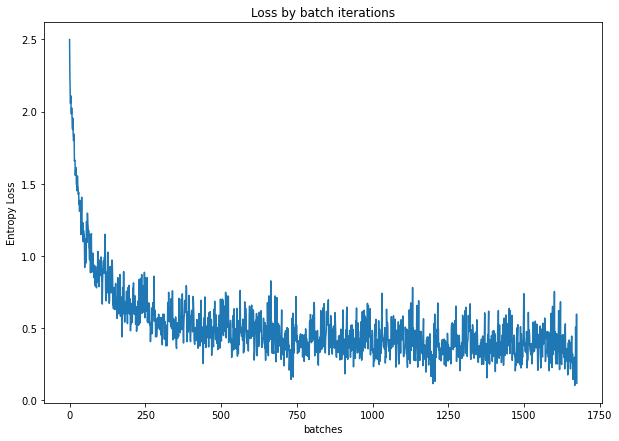

In [62]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

Some quality metrics for our linear model

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # load batches of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1)
  y_batch = y_batch

  preds = torch.argmax(x_batch @ W, dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.904


Result, we now see that every variable or tensor is provided with its own `grad` and `grad_fn`. This part showed we can directly manipulate with them. Also it is very inconvinient, but sometimes we should be able to access such flexibility.

Of course PyTorch has higher level of operations between weights and grads, than we saw above. Next part introduces high level of modeling and training neural networks. 


## Model

PyTorch is flexible framework to build any kind of neural network

Here is a table of comparison:

```
| API             | Flexibility | Convenience |,
|-----------------|-------------|-------------|,
| Barebone        | High        | Low         |,
| `nn.Module`     | High        | Medium      |,
| `nn.Sequential` | Low         | High        |
```

1. barebone is the approach where we directly manipulate with ternsors. In the example above we had the objective function directly expressid by weights. If we develop this method into classes we would get this level of API. **On this level we code modules by ourselves**

2. [`nn.Module`](https://pytorch.org/docs/stable/nn.html) is the parent class for many PyTorch introduced modules. There are plenty of them. They are pretty enough to use them out-of-the-box with required parameters. Mostly we use:

- `nn.Linear`
- `nn.Softmax`, `nn.LogSoftmax`
- `nn.ReLU`, `nn.ELU`, `nn.LeakyReLU`
- `nn.Tanh`, `nn.Sigmoid`
- `nn.LSTM`, `nn.GRU`
- `nn.Conv1d`, `nn.Conv2d`
- `nn.MaxPool1d`, `nn.AdaptiveMaxPool1d` and others pooling
- `nn.BatchNorm1d`, `nn.BatchNorm2d`
- `nn.Dropout`
- losses: `nn.CrossEntropyLoss`, `nn.NLLLoss`, `nn.MSELoss`
- etc

3. `nn.Sequential` is no more than sequence of different modules based on `nn.Module`. They are initiatiated by a list of modules, where output from one module goes as input for next in sequence.


Let's **develop a simple sequential** to classify MNIST using **two linear layers** model.

In [66]:
import torch.nn as nn
from torchinfo import summary

In [67]:
model = nn.Sequential(
  nn.Linear(features, 64),
  nn.ReLU(),
  nn.Linear(64, classes)
)

# It is the same as:
#
# model = nn.Sequential()
# model.add_module('0', nn.Linear(features, 64))
# model.add_module('1', nn.Linear(64, classes))

model.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=64, bias=True)
  (1): ReLU()
  (2): Linear(in_features=64, out_features=10, bias=True)
)

We can check if everything is fine with hidden layers by `torchsummary.summary`. It needs the shape of input data to produce visualisation of model

In [68]:
summary(model,(features,))

Layer (type:depth-idx)                   Output Shape              Param #
Sequential                               --                        --
├─Linear: 1-1                            [64]                      50,240
├─ReLU: 1-2                              [64]                      --
├─Linear: 1-3                            [10]                      650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
Total mult-adds (M): 3.22
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.20
Estimated Total Size (MB): 0.21

## Train

As we know, most important thing to do in solving problem are **3 things**:

1. Model
2. Objective (loss function)
3. Optimizing (objective w.r.t. model parameters)

Good, everything we must do when using PyTorch is **define these 3 things**:

1. Model: from `nn.Module` API
2. Loss: again, `nn.Module` or [`nn.functional`](https://pytorch.org/docs/stable/nn.functional.html) API
3. Optimizer: based on [`torch.optim.Optimizer`](https://pytorch.org/docs/stable/optim.html)

In the previous tasks when it came to optimize objective we used **direct solution or gradient descent optimizations**

Of course, there are plenty upgrades of gradient descent. It can use **adaptive step value**, **previous step gradients** and others. PyTorch also provides some classes for gradient optimizations. They are initializing with parameters they should tune for better loss value and during descent they do the step in gradient-based descent method.

Here is the most used optimizers, based on which descent algorithm is used:

- `torch.optim.Adam` uses both second and first momentum of gradient, very popular for its speed of convergence, simplicity. [paper](https://arxiv.org/abs/1412.6980)

- `torch.optim.SGD` - good-old stochastic gradient descent. Can be used with Nesterov momentum optimization

- `torch.optim.Adagrad` - [paper](https://jmlr.org/papers/v12/duchi11a.html)

- `torch.optim.RMSprop` - introduced in [slides](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)



First define the last 2 things: criterion and optimizer

In [25]:
criterion = nn.CrossEntropyLoss()      # (logsoftmax + negative likelihood) in its core, applied to logits

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

Finally, we are heading to **train loop**!

Previously we iterated over epochs and batches (this is called train loop). So, let's do it here

In [26]:
epochs = 3
history = []

In [27]:
for i in range(epochs):
    for x_batch, y_batch in train_loader:
    # 1. load batches of data correctly
    x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
    y_batch = y_batch.to(device)

    # 2. compute scores with .forward or .__call__
    logits = model(x_batch)

    # 3. compute loss
    loss = criterion(logits, y_batch)
    history.append(loss.item())

    # 4. calc gradients
    optimizer.zero_grad()
    loss.backward()

    # 5. step of gradient descent
    optimizer.step()

  print(f'{i+1},\t loss: {history[-1]}')

1,	 loss: 0.0872824490070343
2,	 loss: 0.058971796184778214
3,	 loss: 0.054159536957740784


In [75]:
y_batch

tensor([9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0,
        2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1, 9, 3, 8, 4,
        4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4, 0, 6, 1, 0,
        0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2, 4, 9, 4, 3,
        6, 4, 1, 7, 2, 6, 5, 0])

In [69]:
x_batch.shape

torch.Size([128, 784])

In [74]:
y_batch

tensor([9, 8, 6, 7, 3, 4, 6, 8, 7, 0, 4, 2, 7, 7, 5, 4, 3, 4, 2, 8, 1, 5, 1, 0,
        2, 3, 3, 5, 7, 0, 6, 8, 6, 3, 9, 9, 8, 2, 7, 7, 1, 0, 1, 7, 8, 9, 0, 1,
        2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 7, 8, 9, 7, 8, 6, 4, 1, 9, 3, 8, 4,
        4, 7, 0, 1, 9, 2, 8, 7, 8, 2, 6, 0, 6, 5, 3, 3, 3, 9, 1, 4, 0, 6, 1, 0,
        0, 6, 2, 1, 1, 7, 7, 8, 4, 6, 0, 7, 0, 3, 6, 8, 7, 1, 5, 2, 4, 9, 4, 3,
        6, 4, 1, 7, 2, 6, 5, 0])

In [73]:
logits.shape

torch.Size([128, 10])

Plot and accurracy just to check the correctness.

In [28]:
import matplotlib.pyplot as plt

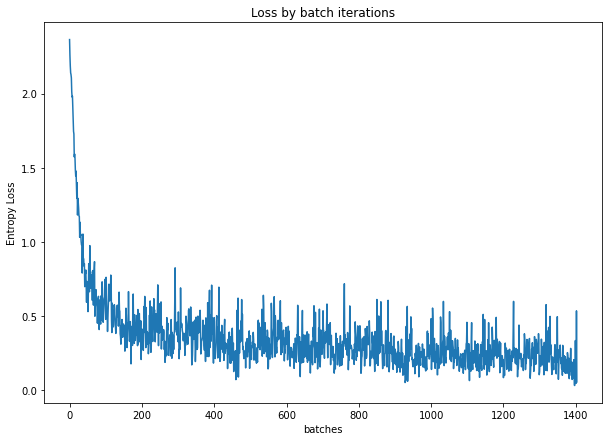

In [29]:
plt.figure(figsize=(10, 7))

plt.plot(history)

plt.title('Loss by batch iterations')
plt.ylabel('Entropy Loss')
plt.xlabel('batches')

plt.show()

Some quality metrics for our two layer model

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
acc = 0
batches = 0

for x_batch, y_batch in test_loader:
  # load batch of data correctly
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1).to(device)
  y_batch = y_batch.to(device)

  preds = torch.argmax(model(x_batch), dim=1)
  acc += (preds==y_batch).cpu().numpy().mean()

print(f'Test accuracy {acc / batches:.3}')

Test accuracy 0.94


## Summary

We have build and trained the most simple neural network. It has been done by defining:

1. `model`
2. `criterion`
1. `optimizer`

Remember the steps during train on batch:

1. load batch
2. do forward pass of model (get `scores`)
3. calculate `loss` (using criterion over `scores` and true labels of batch)
4. perform `loss.backward()` (compute gradients of loss w.r.t. parameters)
5. do optimization step (`optimizer.step()`)
* zero gradients (place it everywhere but not between 4 and 5)
* validating (after each epoch)

